In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sklearn
%matplotlib inline 
import klib
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from itertools import cycle

## Expanding Width of Notebook For Better View

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Set Max Rows and Columns Display for More Details

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading the Data

In [4]:
df = pd.read_csv('./prosperLoanData.csv')

## Basic Data Exploration

In [5]:
df.head()

ListingKey  ListingNumber ListingCreationDate CreditGrade  Term LoanStatus       ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup                 GroupKey  DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  \
0  1021339766868145413AB3B         193129             09:29.3           C    36  Completed  14/08/2009 0:00      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            CO          Other    Self-employed                       2.0                 True              True                      NaN           41:46.8                  640.0                  659.0         11/10/2001 0:00                 5.0              4.0                        12.0                      1                           24                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999              True   
1  10273602499503308B223C1        1209647             28:07.9         NaN    36    Current              NaN      0.12016        0.0920       0.0820                  0.07960         0.0249          0.05470                      6.0                     A           7.0                          2            CO   Professional         Employed                      44.0                False             False                      NaN   27/02/2014 8:28                  680.0                  699.0         18/03/1996 0:00                14.0             14.0                        29.0                     13                          389                   3.0             5.0                   0.0               0.0                      0.0                       1.0                        0.0                  3989.0                 0.21                  10266.0         29.0                                1.00                      2.0               0.18  $50,000-74,999              True   
2  0EE9337825851032864889A          81716             00:47.1          HR    36  Completed  17/12/2009 0:00      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            GA          Other    Not available                       NaN                False              True  783C3371218786870A73D20           09:10.1                  480.0                  499.0         27/07/2002 0:00                 NaN              NaN                         3.0                      0                            0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed              True   
3  0EF5356002482715299901A         658116             02

In [6]:
# Checking the dimesion of the data
df.shape

(113937, 81)

In [7]:
# Checking columns names
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
       'TradesOpenedLast6

In [8]:
# Info about the data and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

## Remove Duplicates

In [10]:
df.drop_duplicates(inplace=True)

## Dropping unncessesary columns

In [11]:
df.drop(['ListingKey','ListingNumber','BorrowerState','GroupKey','LoanKey','LoanNumber','MemberKey'],axis=1,inplace=True)

In [12]:
# Checking the null values data types
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

CreditGrade / object
ClosedDate / object
BorrowerAPR / float64
EstimatedEffectiveYield / float64
EstimatedLoss / float64
EstimatedReturn / float64
ProsperRating (numeric) / float64
ProsperRating (Alpha) / object
ProsperScore / float64
Occupation / object
EmploymentStatus / object
EmploymentStatusDuration / float64
CreditScoreRangeLower / float64
CreditScoreRangeUpper / float64
FirstRecordedCreditLine / object
CurrentCreditLines / float64
OpenCreditLines / float64
TotalCreditLinespast7years / float64
InquiriesLast6Months / float64
TotalInquiries / float64
CurrentDelinquencies / float64
AmountDelinquent / float64
DelinquenciesLast7Years / float64
PublicRecordsLast10Years / float64
PublicRecordsLast12Months / float64
RevolvingCreditBalance / float64
BankcardUtilization / float64
AvailableBankcardCredit / float64
TotalTrades / float64
TradesNeverDelinquent (percentage) / float64
TradesOpenedLast6Months / float64
DebtToIncomeRatio / float64
TotalProsperLoans / float64
TotalProsperPaymentsBi

## Changing Data types

In [13]:
# ListingCreationDate: 'Time and Date', 
# ClosedDate:'Time and Date', 
# DateCreditPulled: 'Time and Date', 
# FirstRecordedCreditLine: 'Time and Date', 
# LoanOriginationDate: 'Time and Date'.

# Converting the above column into date and time
def convert_date_time_cols(df, cols):
    for col in cols:
        # Convert the column to datetime datatype
        df[col] = pd.to_datetime(df[col], errors='coerce')

        # For rows where the column contains date and time, keep the original column as datetime datatype
        df[col] = df[col].where(df[col].dt.time != pd.Timestamp.min.time(), df[col].dt.date)

    return df

In [14]:
convert_date_time_cols(df, ['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate'])

ListingCreationDate CreditGrade  Term              LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)               Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup    DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  TotalProsperLoans  \
0      2023-03-24 09:29:18           C    36               Completed 2009-08-14      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0                    Other    Self-employed                       2.0                 True              True                 NaT                  640.0                  659.0              2001-11-10                 5.0              4.0                        12.0                      1                           24                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999              True          3083.333333                NaN   
1                      NaT         NaN    36                 Current        NaT      0.12016        0.0920       0.0820                  0.07960         0.0249          0.05470                      6.0                     A           7.0                          2             Professional         Employed                      44.0                False             False 2014-02-27 08:28:00                  680.0                  699.0              1996-03-18                14.0             14.0                        29.0                     13                          389                   3.0             5.0                   0.0               0.0                      0.0                       1.0                        0.0                  3989.0                 0.21                  10266.0         29.0                                1.00                      2.0               0.18  $50,000-74,999              True          6125.000000                NaN   
2      2023-03-24 00:47:06          HR    36               Completed 2009-12-17      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0                    Other    Not available                       NaN                False              True 2023-03-24 09:10:06                  480.0                  499.0              2002-07-27                 NaN              NaN                         3.0                      0                            0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed              True          2083.333333                NaN   
3      2023-03-24 02:35:00         NaN    36                 Current        NaT      0.12528        0.0974 

In [15]:
# Reconfirming changed datatypes
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

ListingCreationDate / datetime64[ns]
CreditGrade / object
ClosedDate / datetime64[ns]
BorrowerAPR / float64
EstimatedEffectiveYield / float64
EstimatedLoss / float64
EstimatedReturn / float64
ProsperRating (numeric) / float64
ProsperRating (Alpha) / object
ProsperScore / float64
Occupation / object
EmploymentStatus / object
EmploymentStatusDuration / float64
DateCreditPulled / datetime64[ns]
CreditScoreRangeLower / float64
CreditScoreRangeUpper / float64
FirstRecordedCreditLine / datetime64[ns]
CurrentCreditLines / float64
OpenCreditLines / float64
TotalCreditLinespast7years / float64
InquiriesLast6Months / float64
TotalInquiries / float64
CurrentDelinquencies / float64
AmountDelinquent / float64
DelinquenciesLast7Years / float64
PublicRecordsLast10Years / float64
PublicRecordsLast12Months / float64
RevolvingCreditBalance / float64
BankcardUtilization / float64
AvailableBankcardCredit / float64
TotalTrades / float64
TradesNeverDelinquent (percentage) / float64
TradesOpenedLast6Months /

## Missing Values Treatment

In [16]:
# Checking total the missing values in each column 
df.isnull().sum()

ListingCreationDate                    68512
CreditGrade                            84984
Term                                       0
LoanStatus                                 0
ClosedDate                             58857
BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ProsperScore                           29084
ListingCategory (numeric)                  0
Occupation                              3588
EmploymentStatus                        2255
EmploymentStatusDuration                7625
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
DateCreditPulled                       17457
CreditScoreRangeLower                    591
CreditScor

In [17]:
# Checking unique data types in order to fill category wise
df.dtypes.unique()

array([dtype('<M8[ns]'), dtype('O'), dtype('int64'), dtype('float64'),
       dtype('bool')], dtype=object)

## Handling the Missing Values

In [18]:
# Fill null values in numerical columns with the mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill null values in categorical columns with the mode
cat_cols = df.select_dtypes(include=['object', 'bool', 'M8[ns]' ]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [19]:
# Reconfirming eihter values have imputed or not
df.isnull().sum()

ListingCreationDate                    0
CreditGrade                            0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
DateCreditPulled                       0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
FirstRecordedCreditLine                0
CurrentCreditLin

In [20]:
# creating the categorical columns dataframe 
categorical_cols = df.select_dtypes(include = ['object', 'bool'])

In [21]:
# creating the numerical columns dataframe 
numeric_cols = df.select_dtypes(include=['int', 'float'])

## Plotting the Box Plots for Outliers Detection

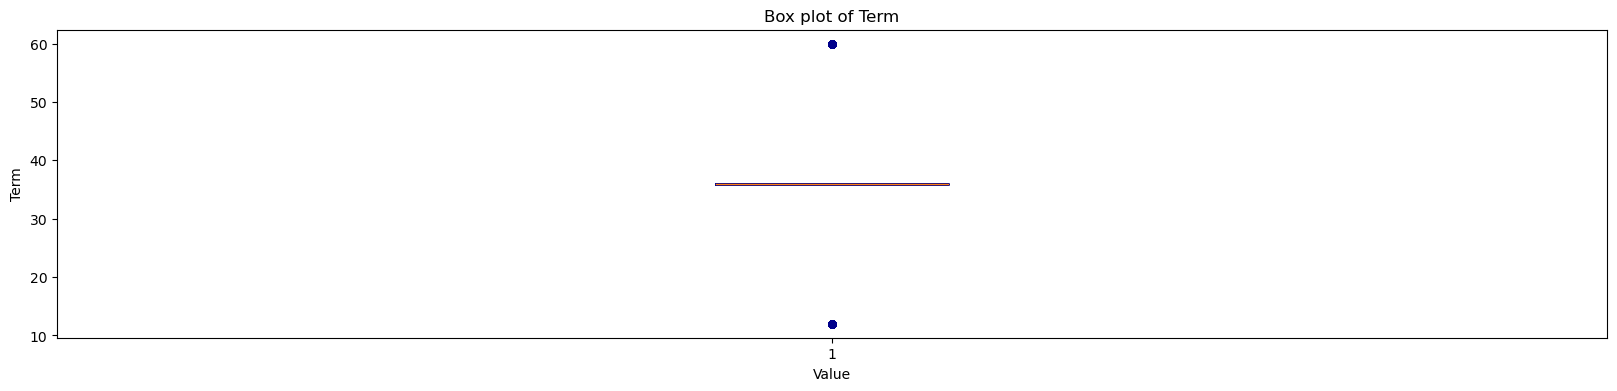

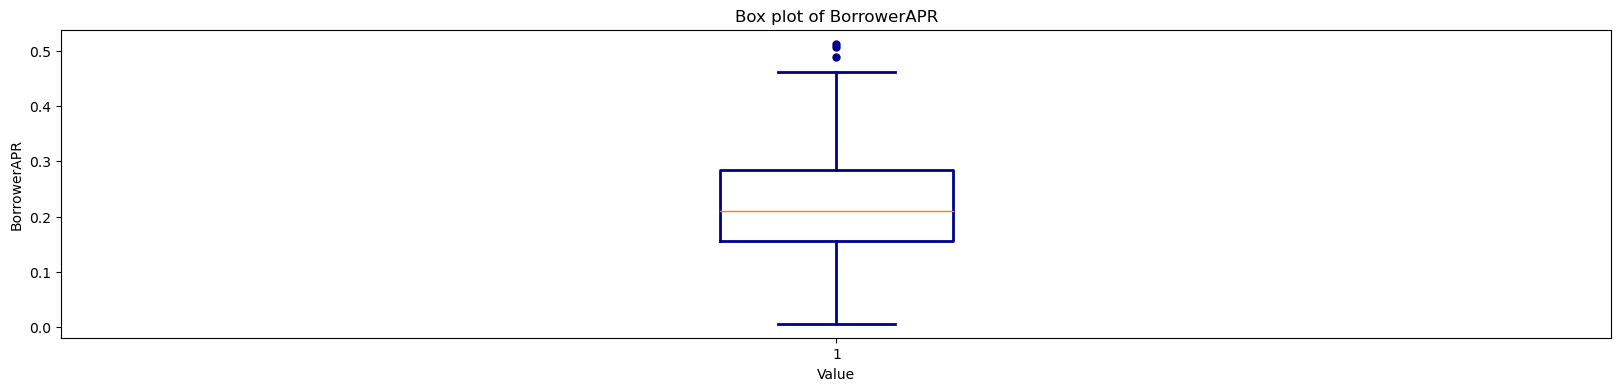

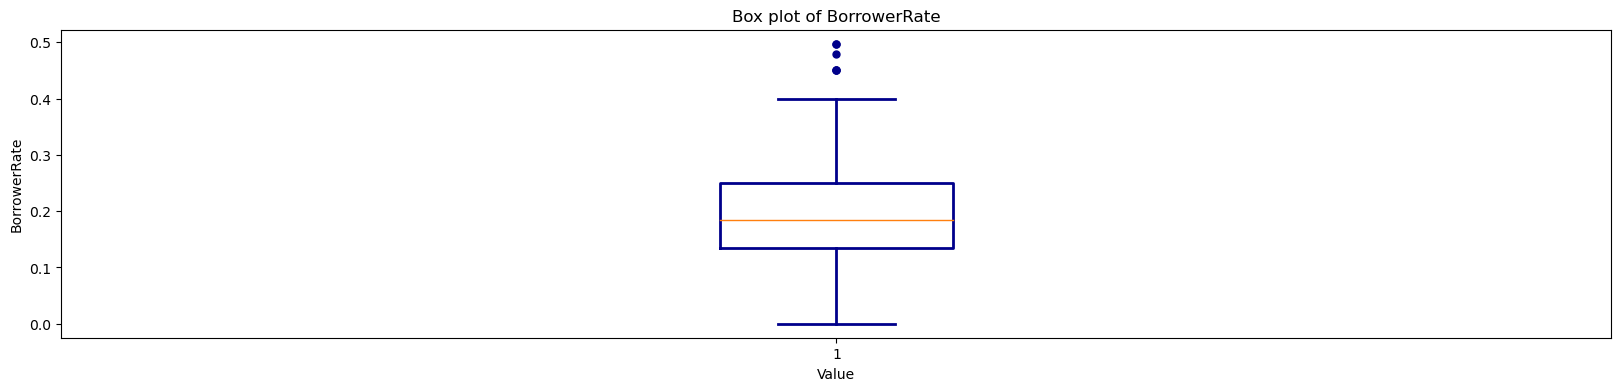

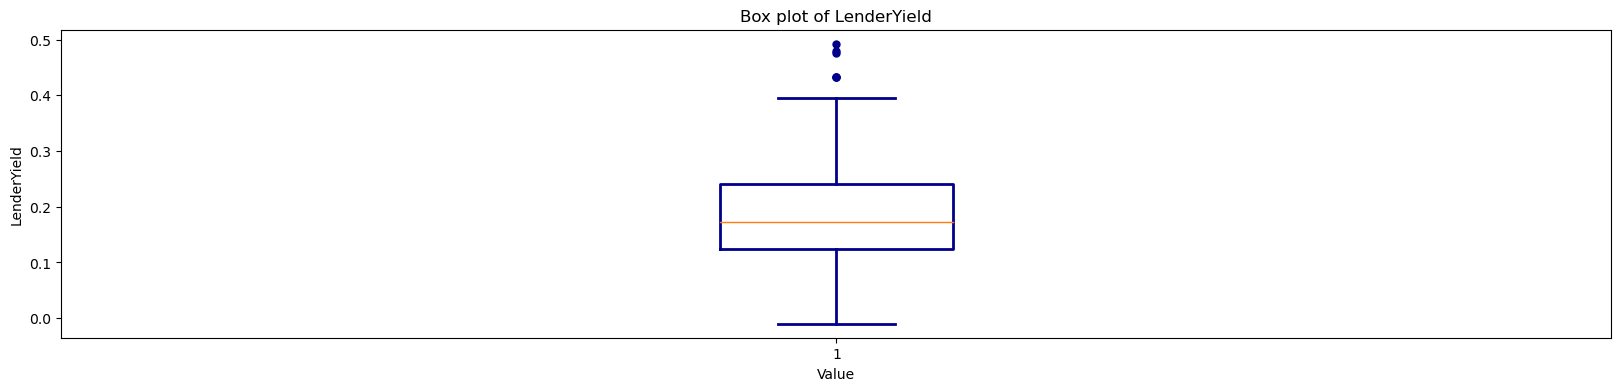

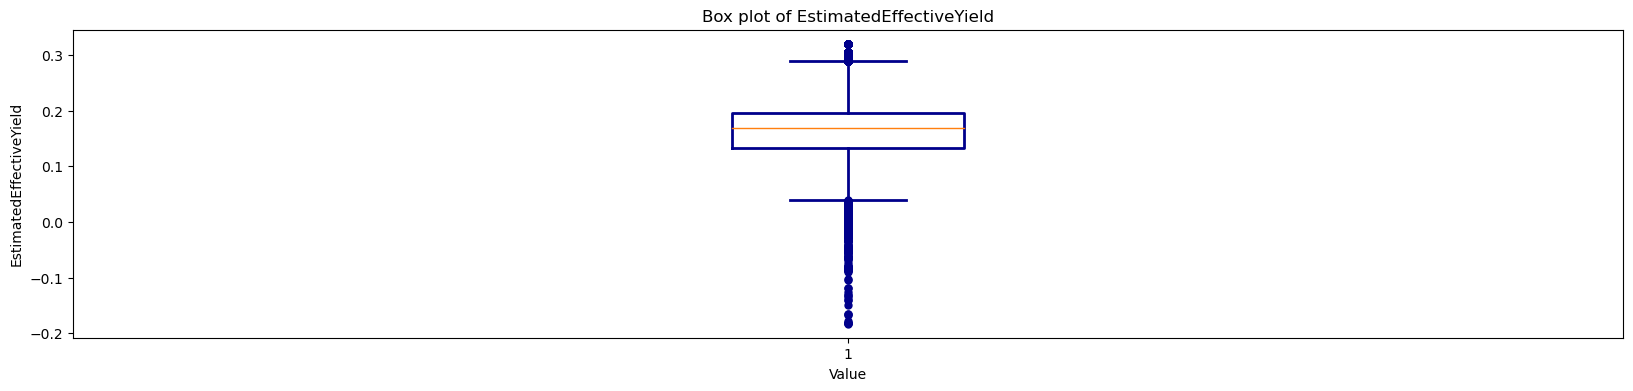

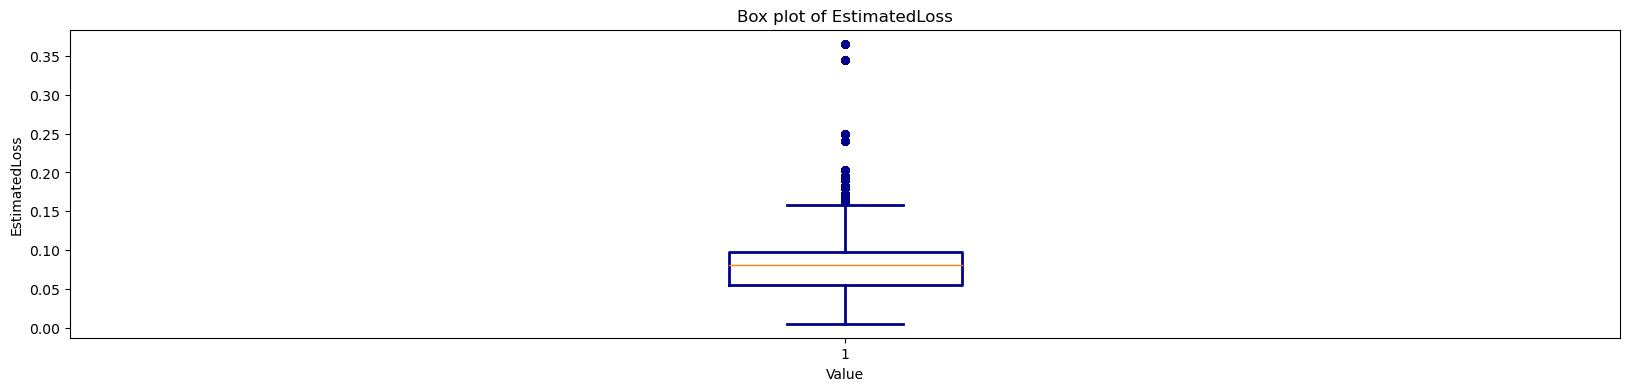

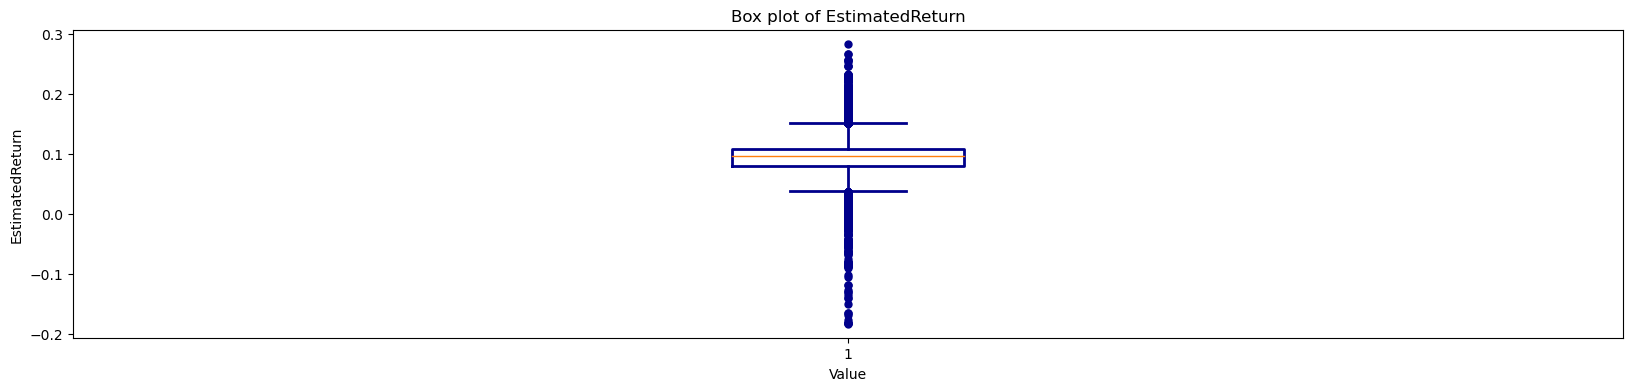

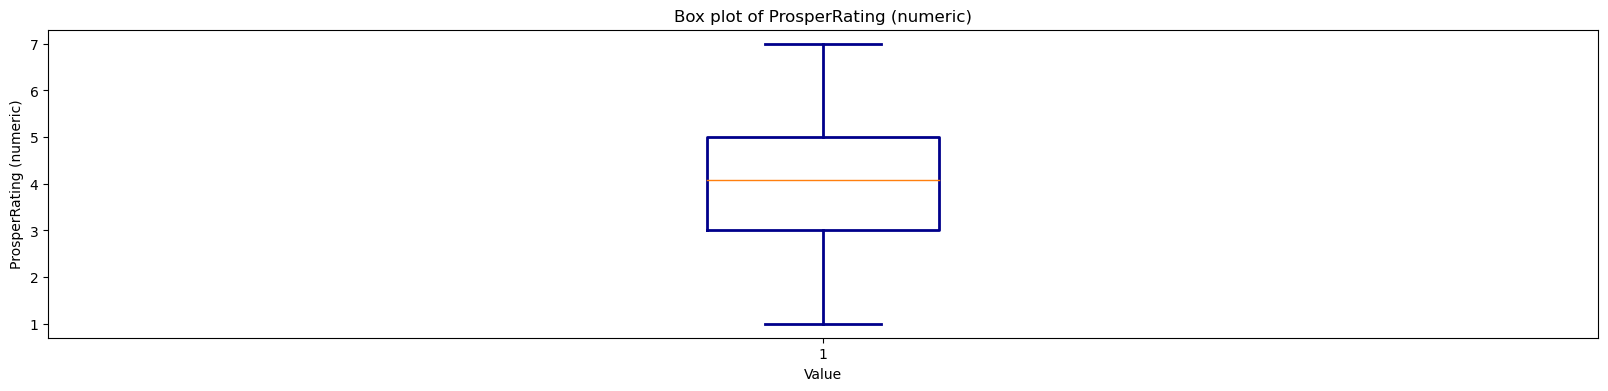

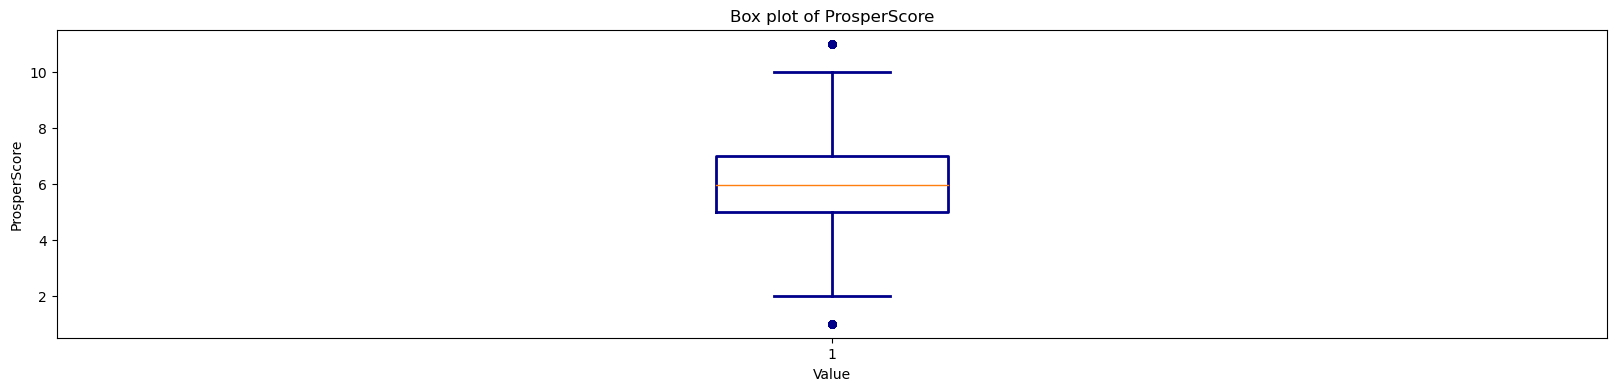

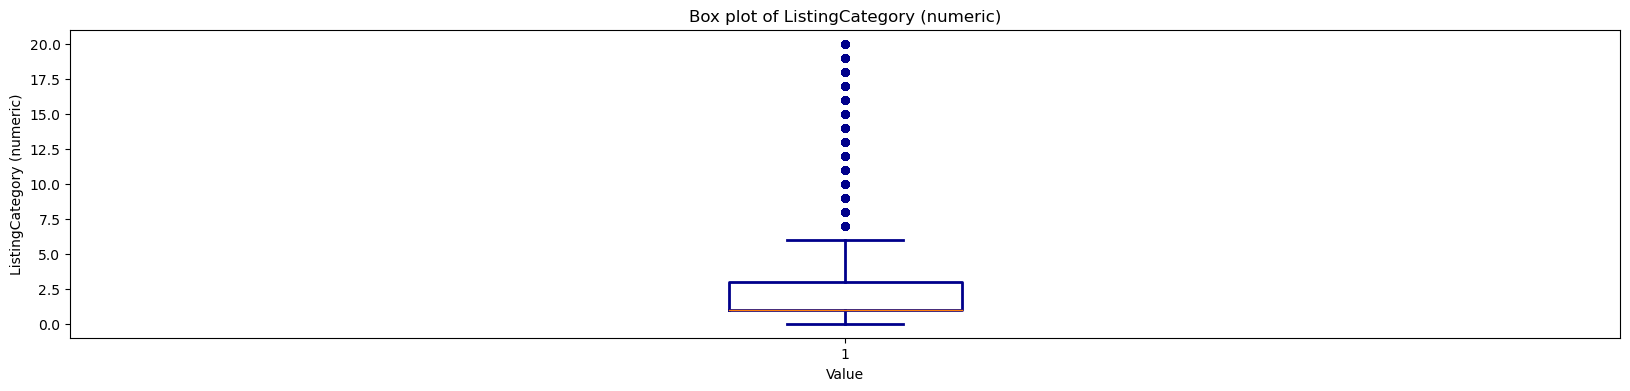

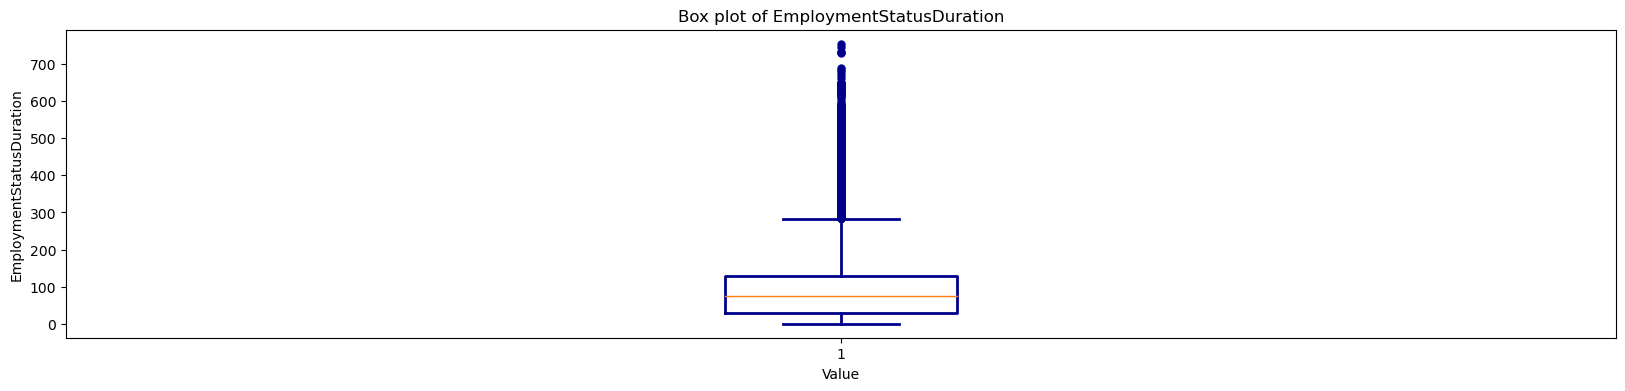

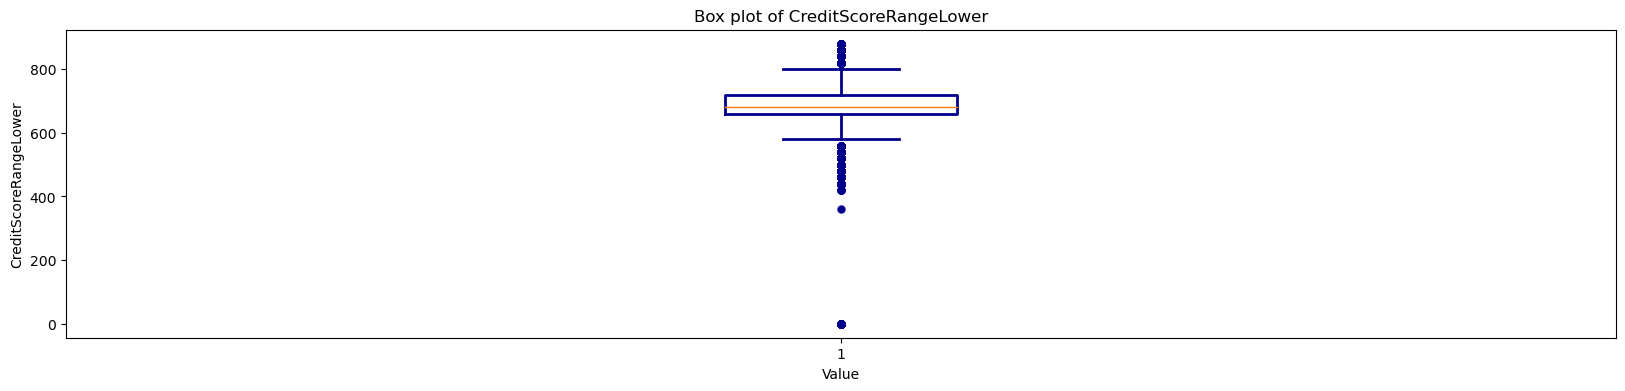

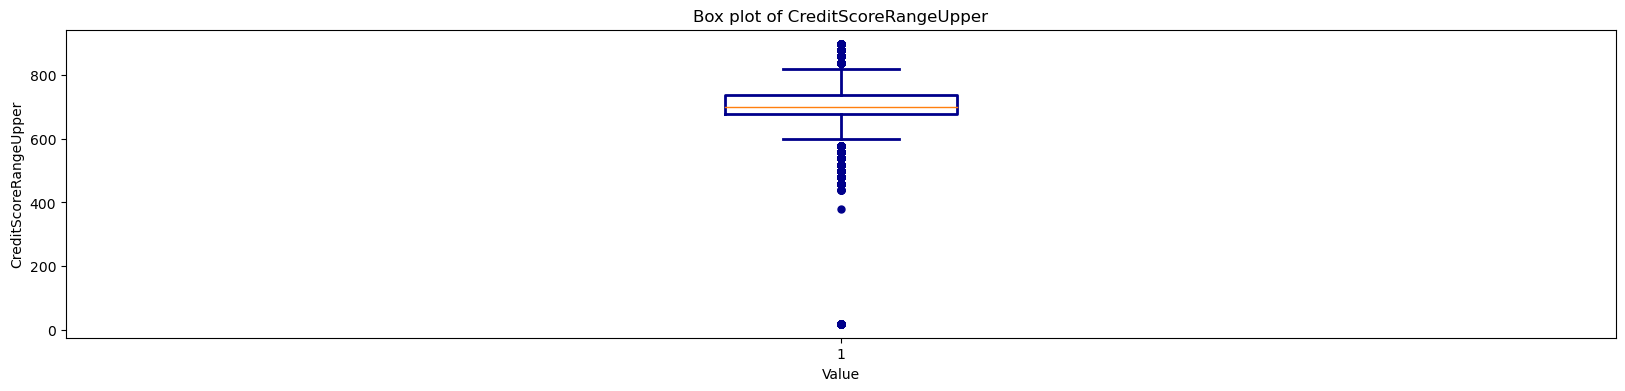

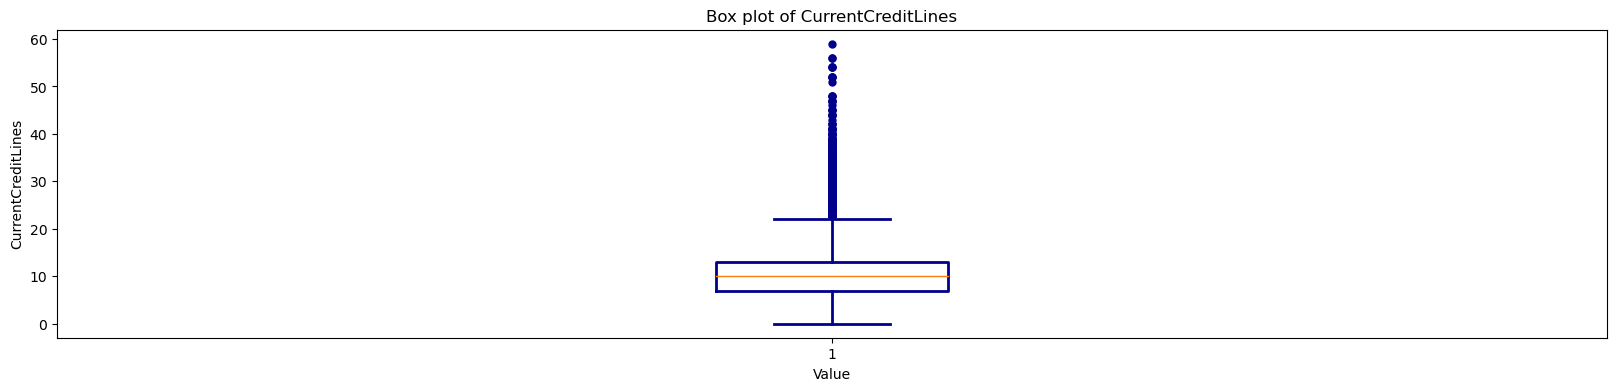

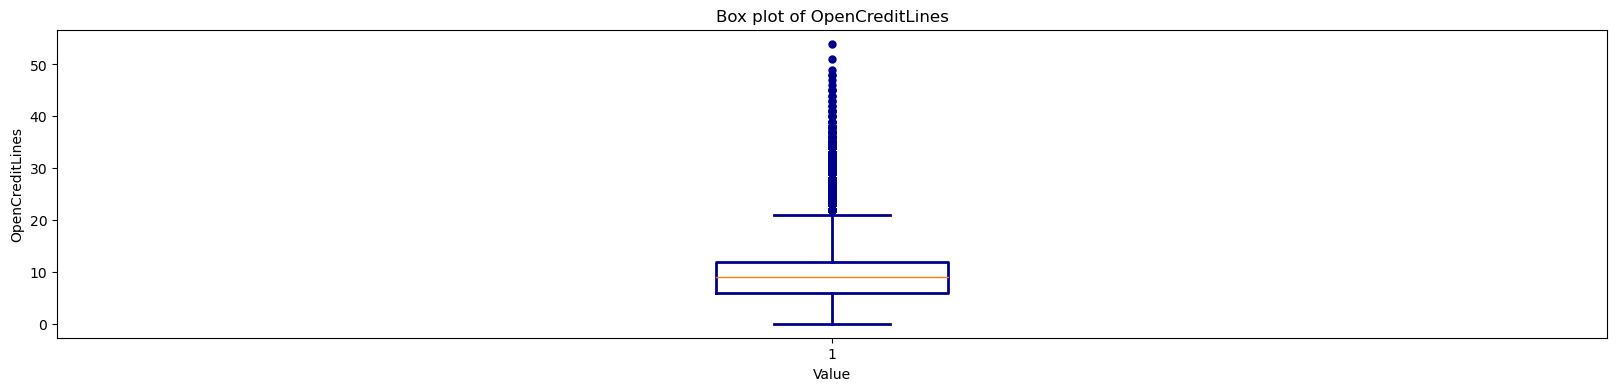

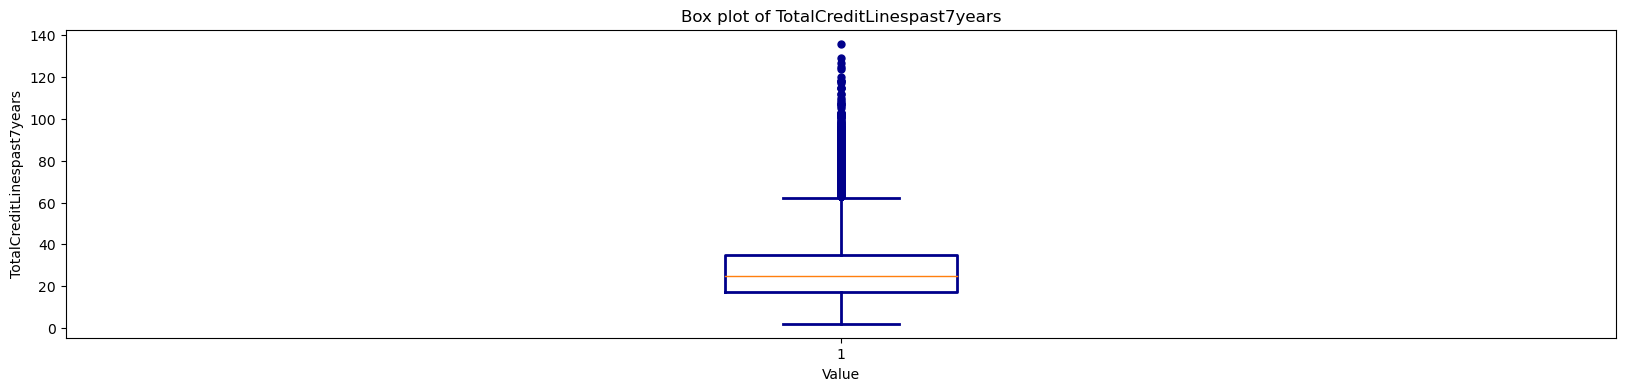

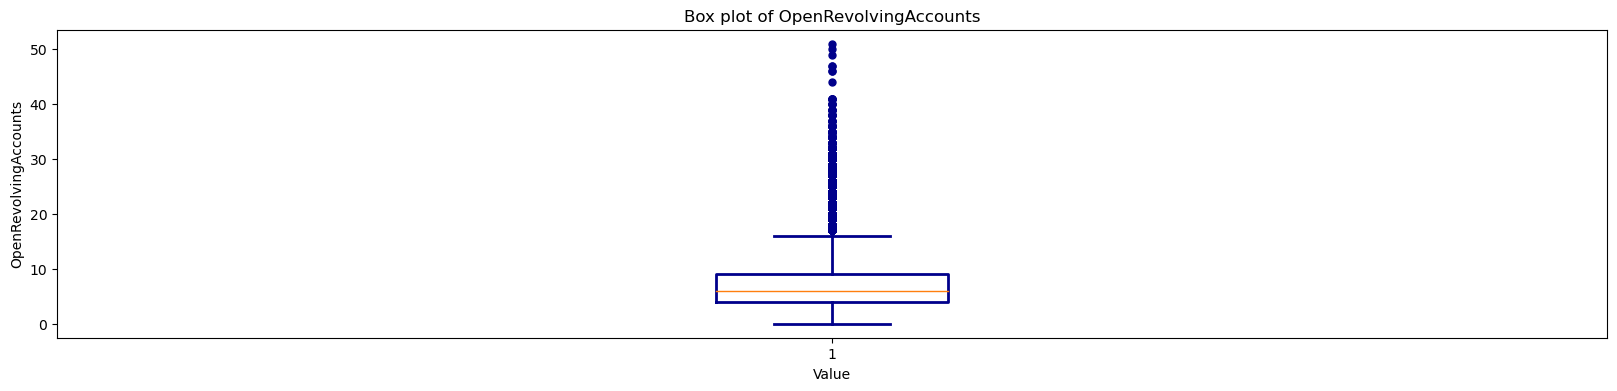

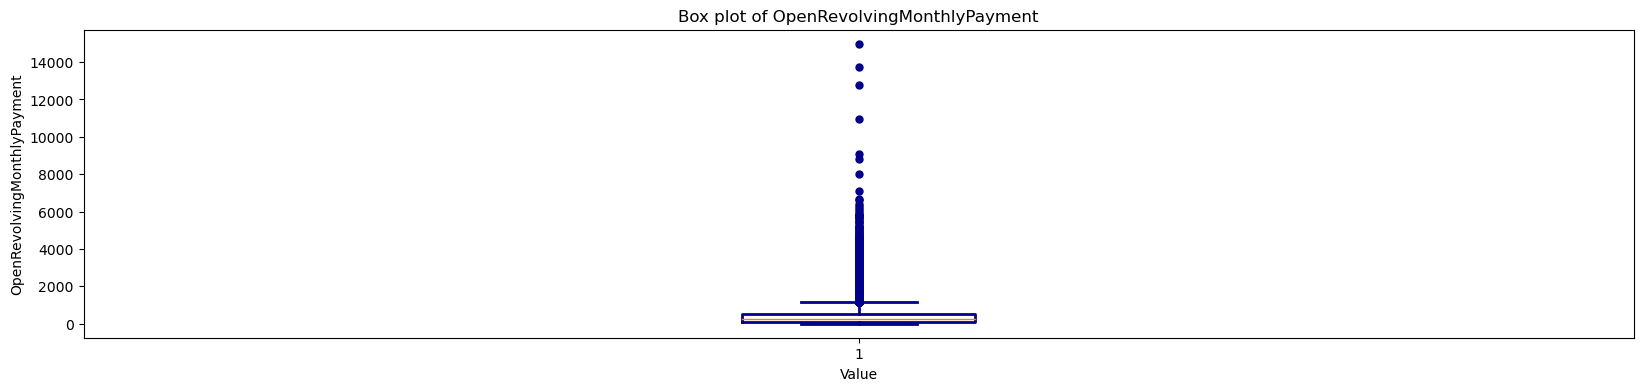

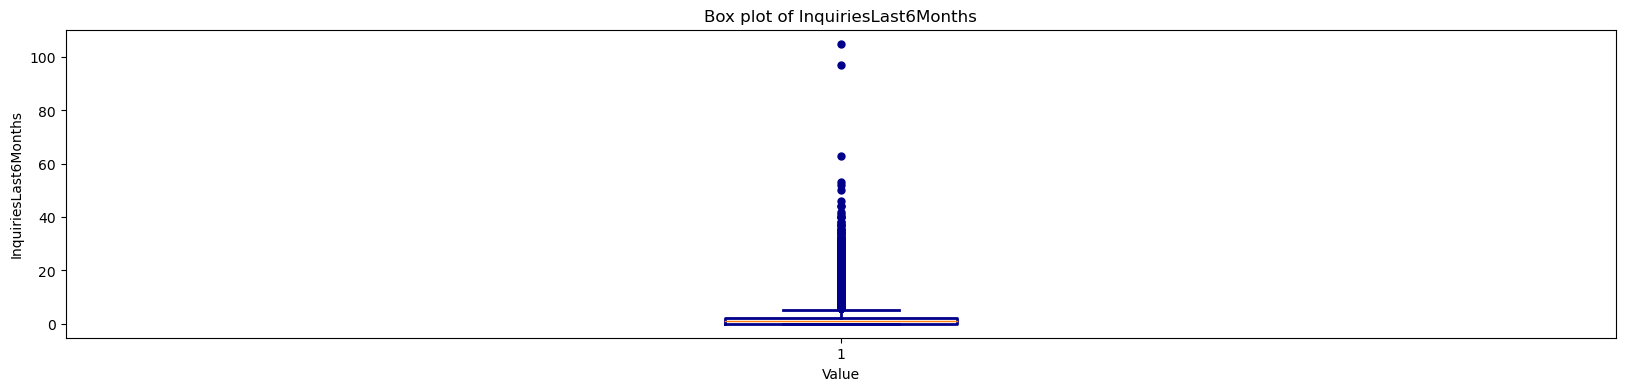

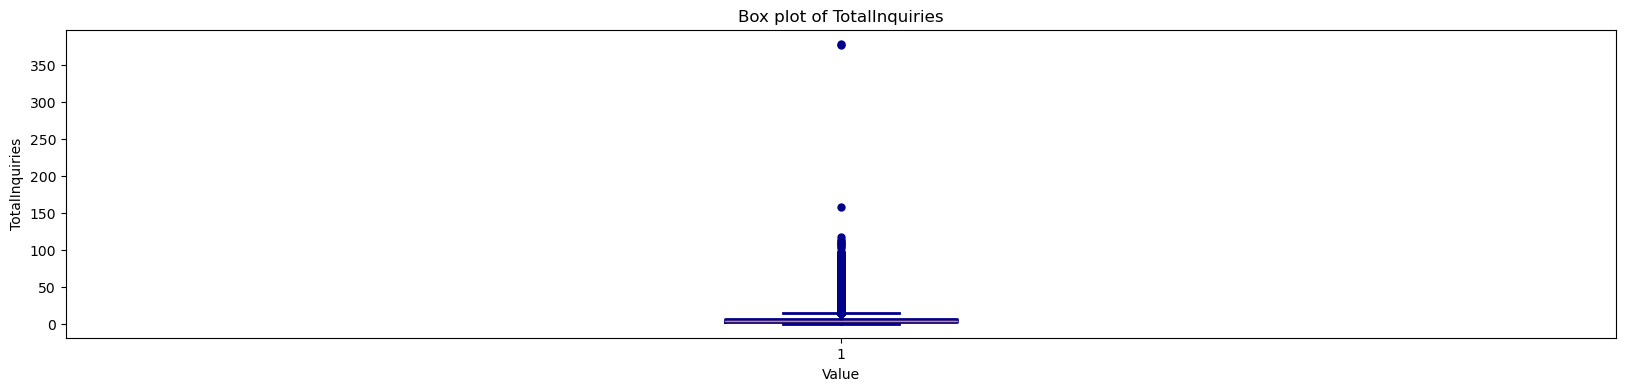

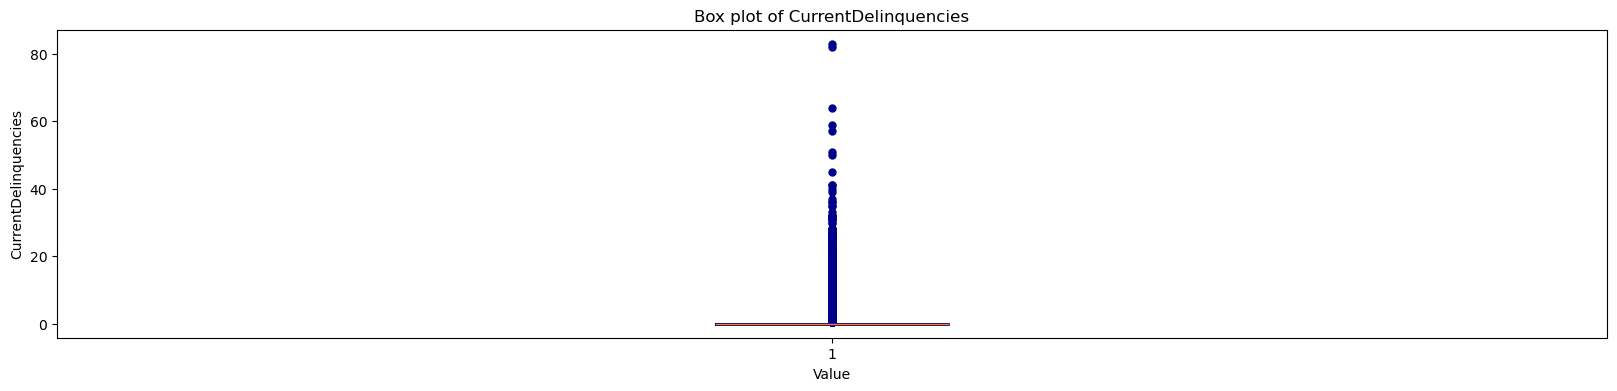

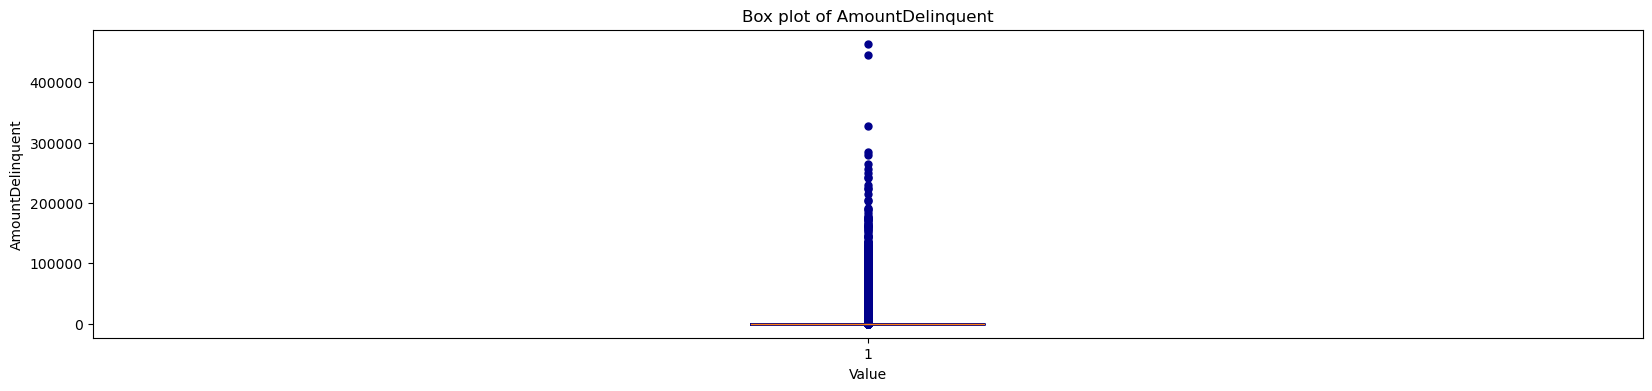

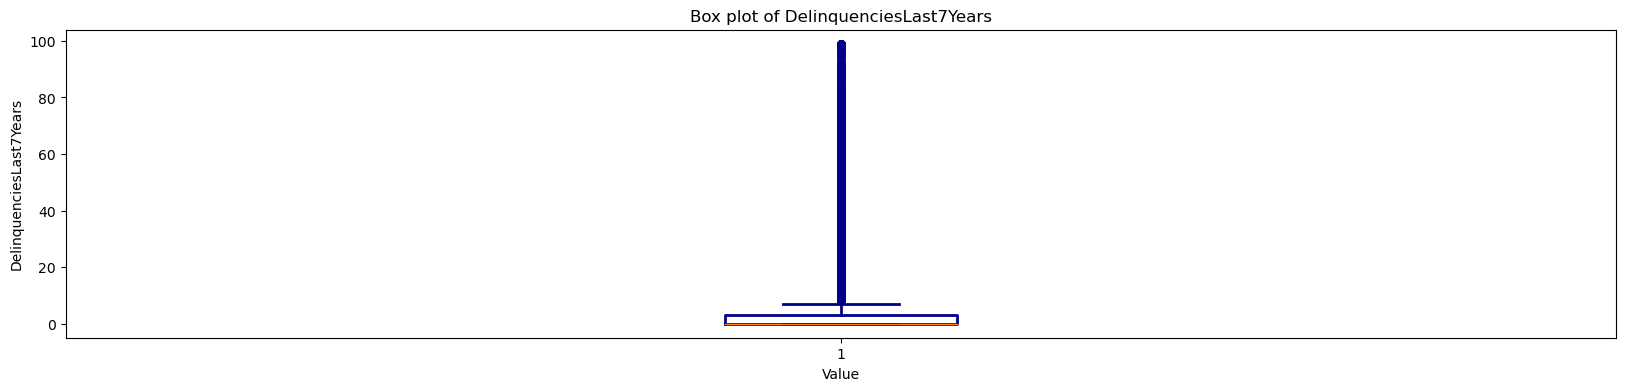

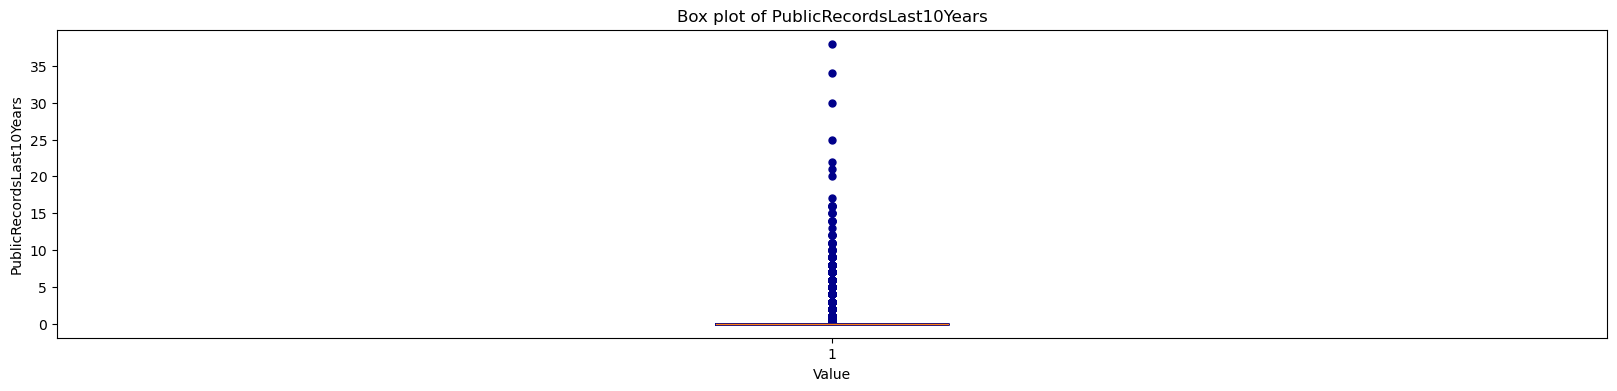

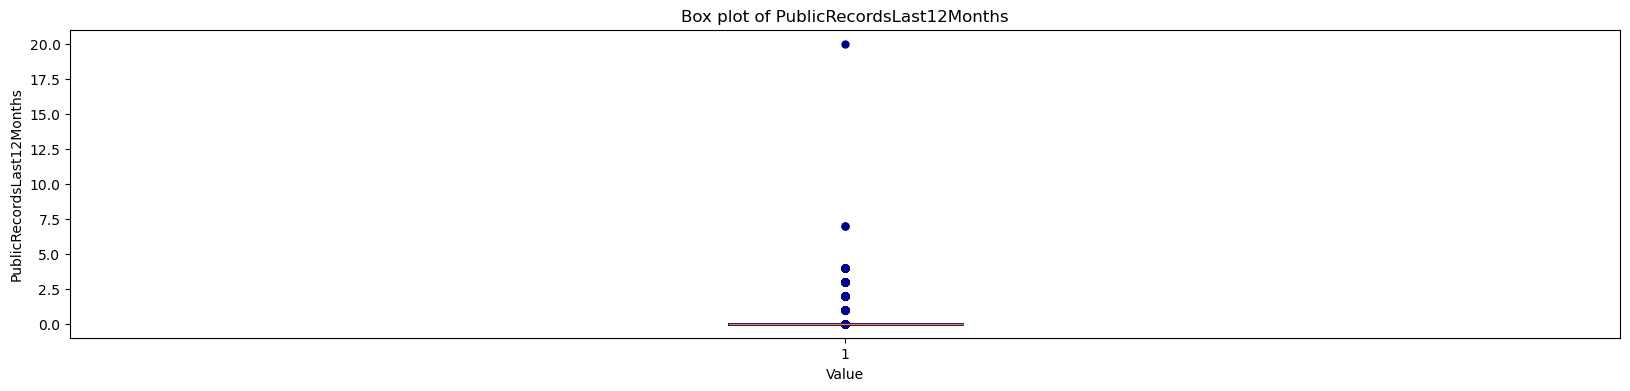

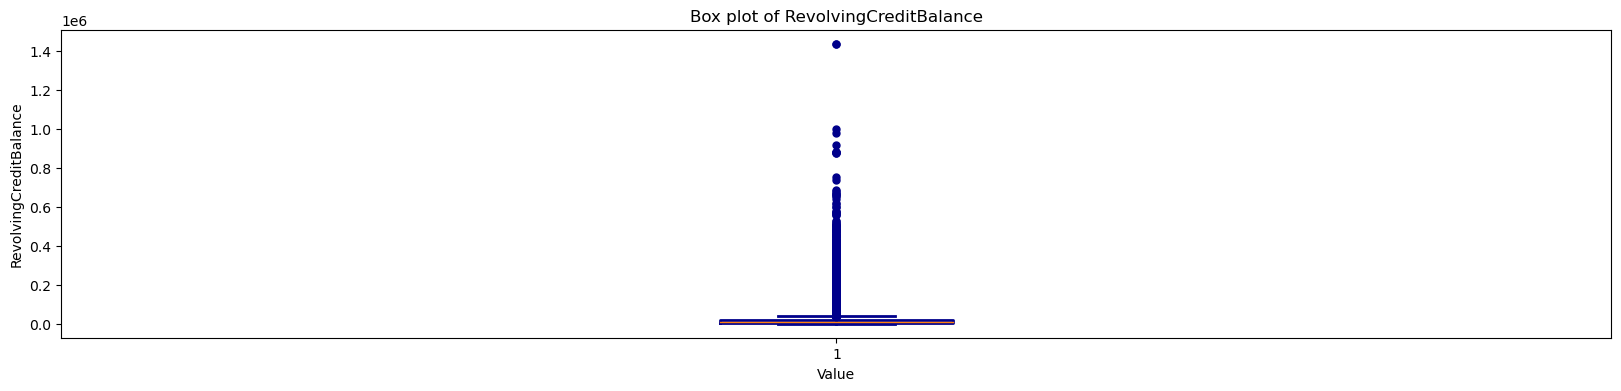

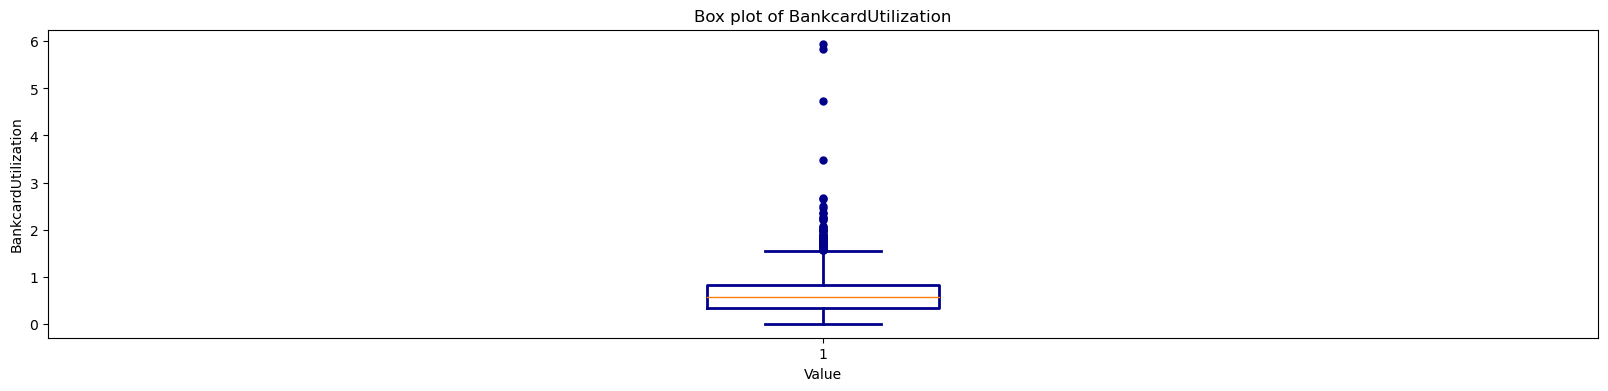

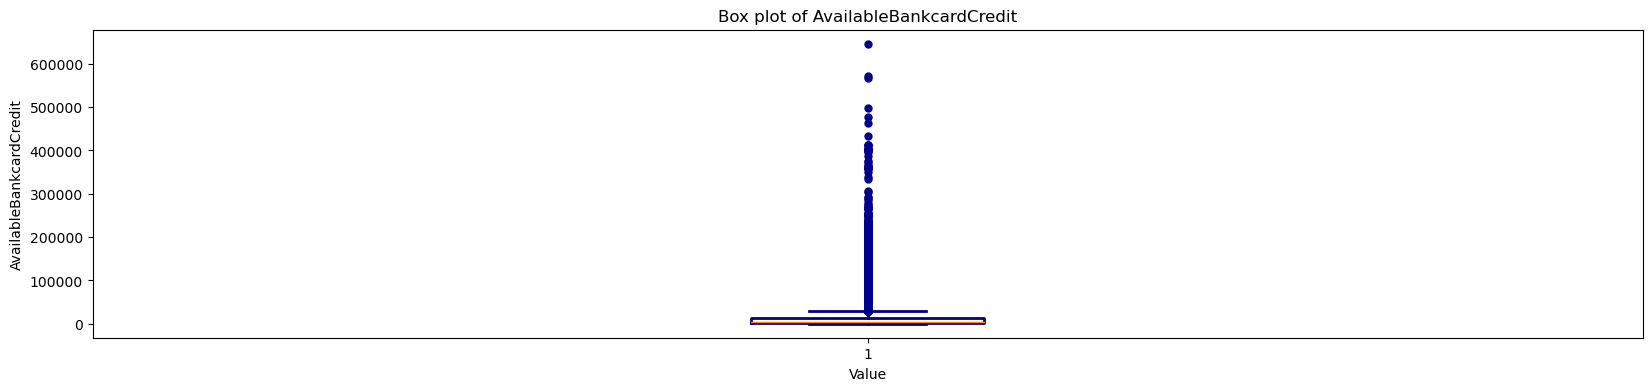

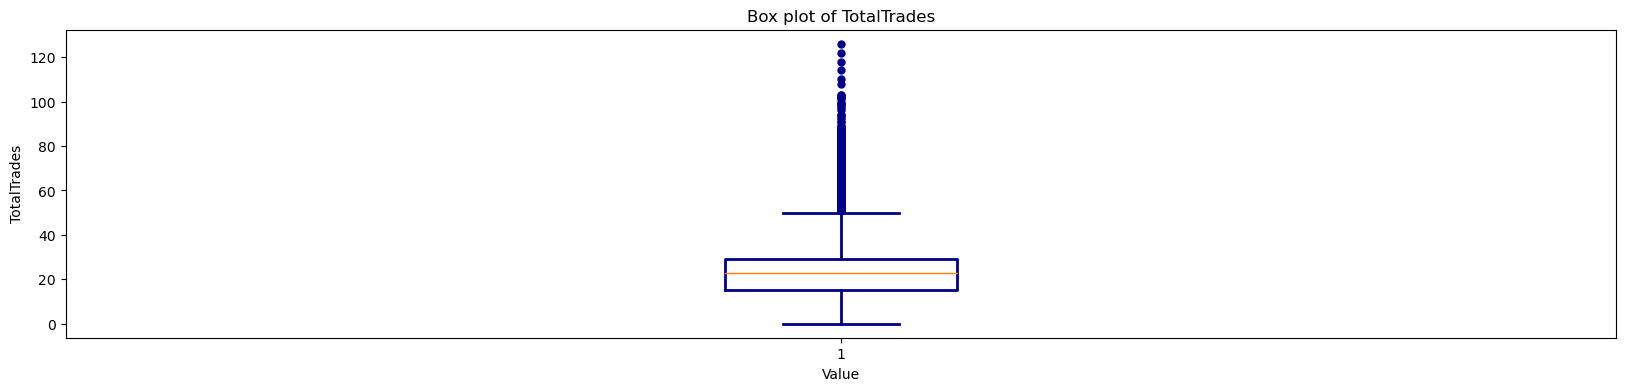

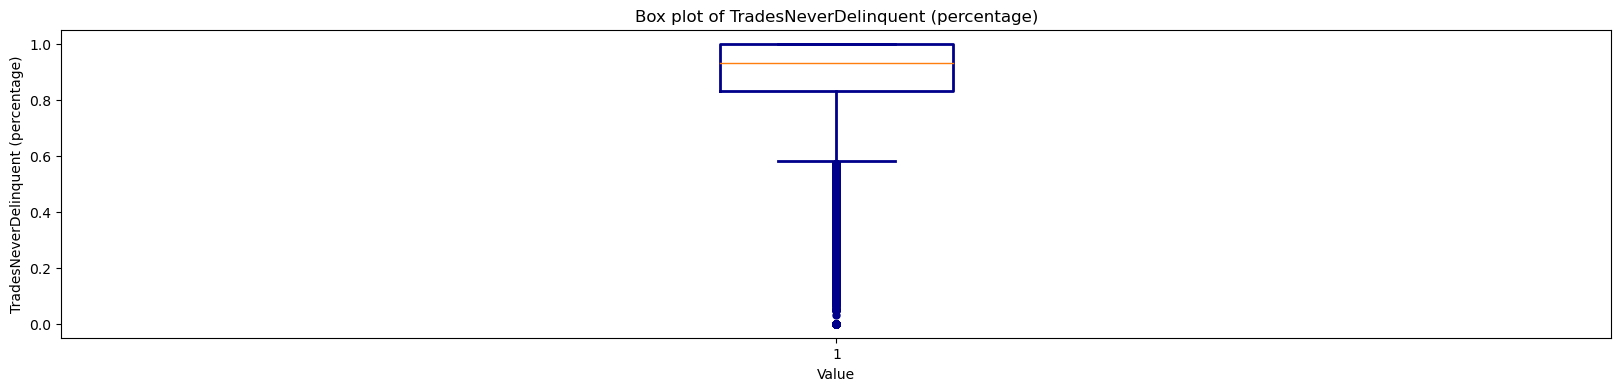

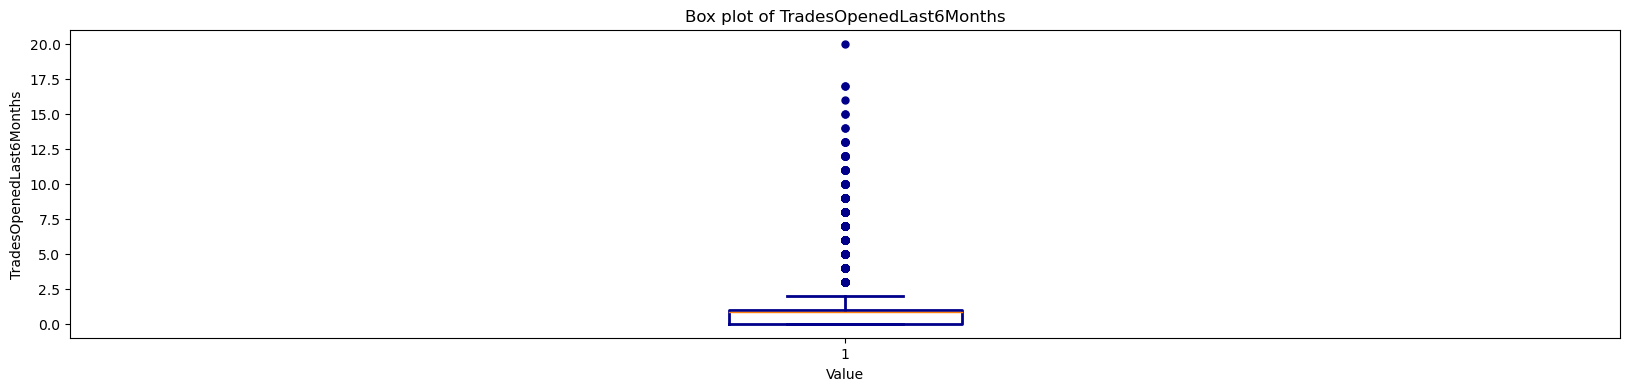

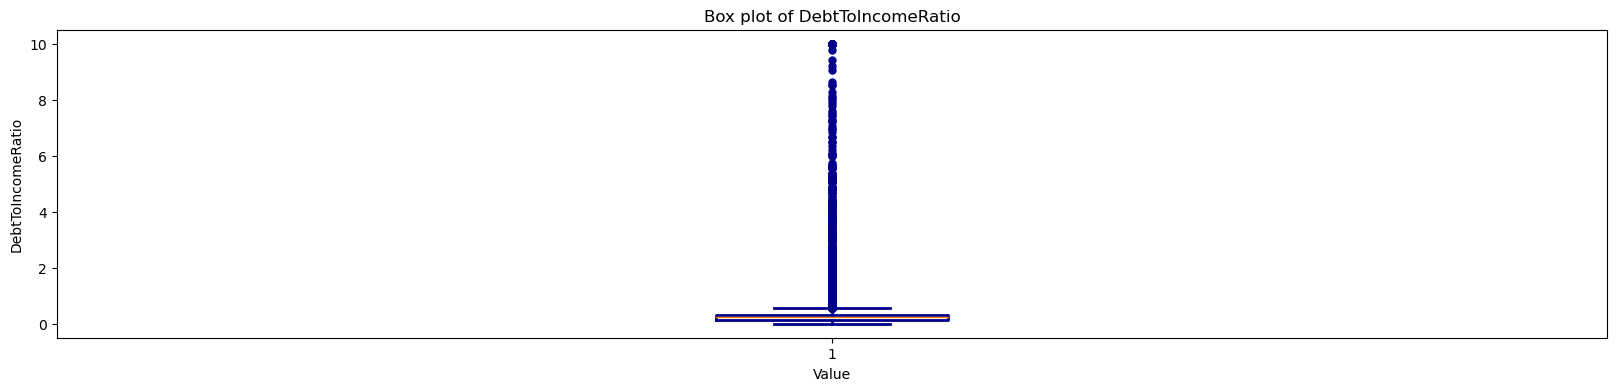

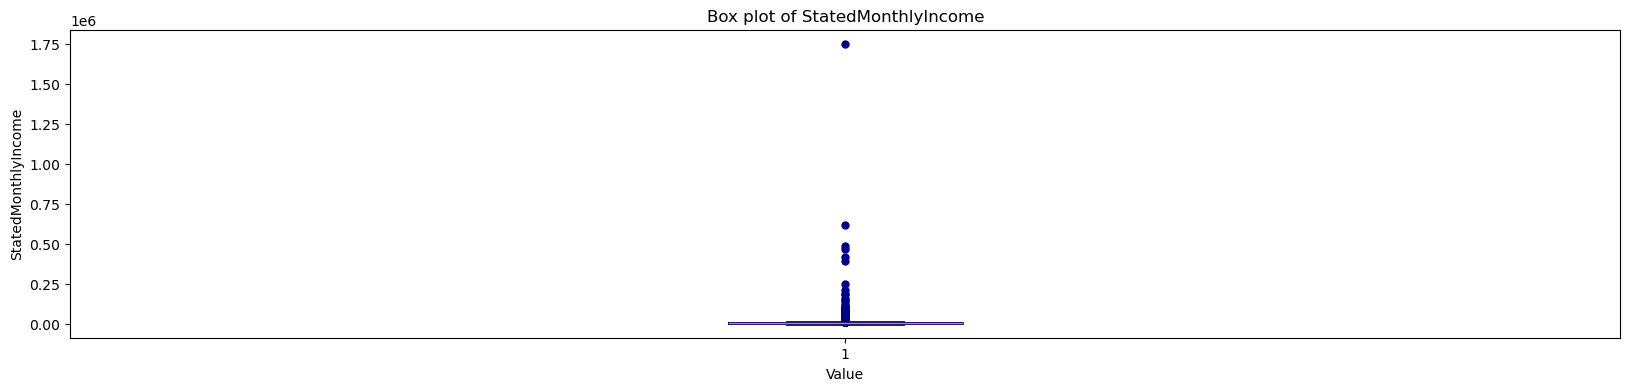

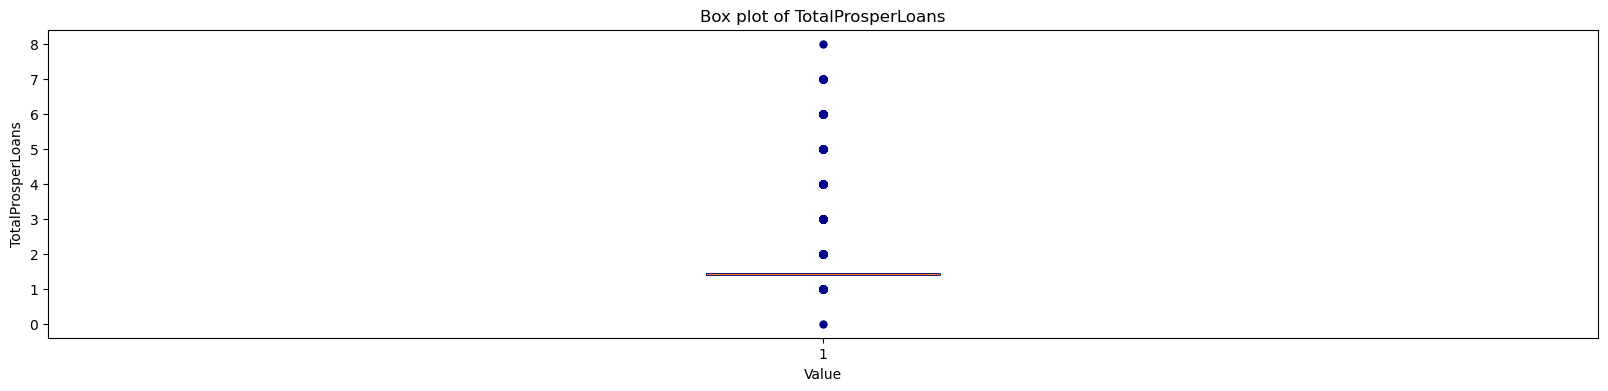

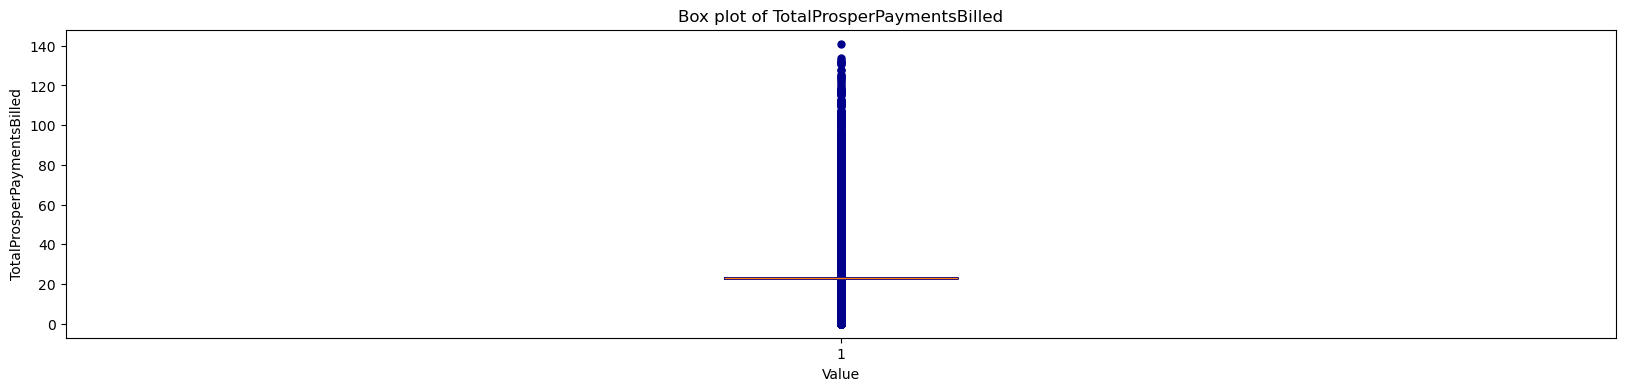

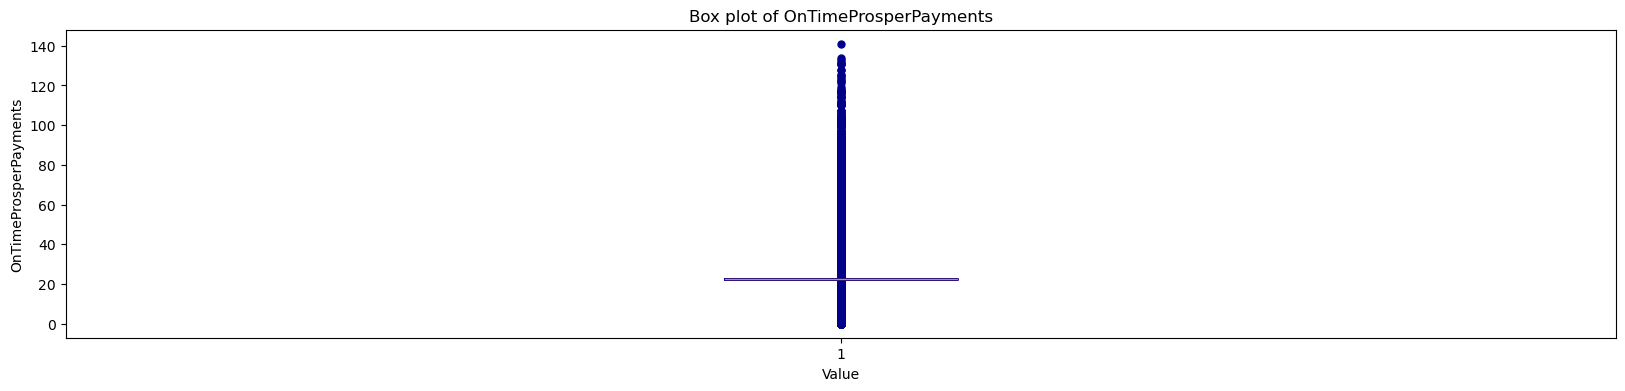

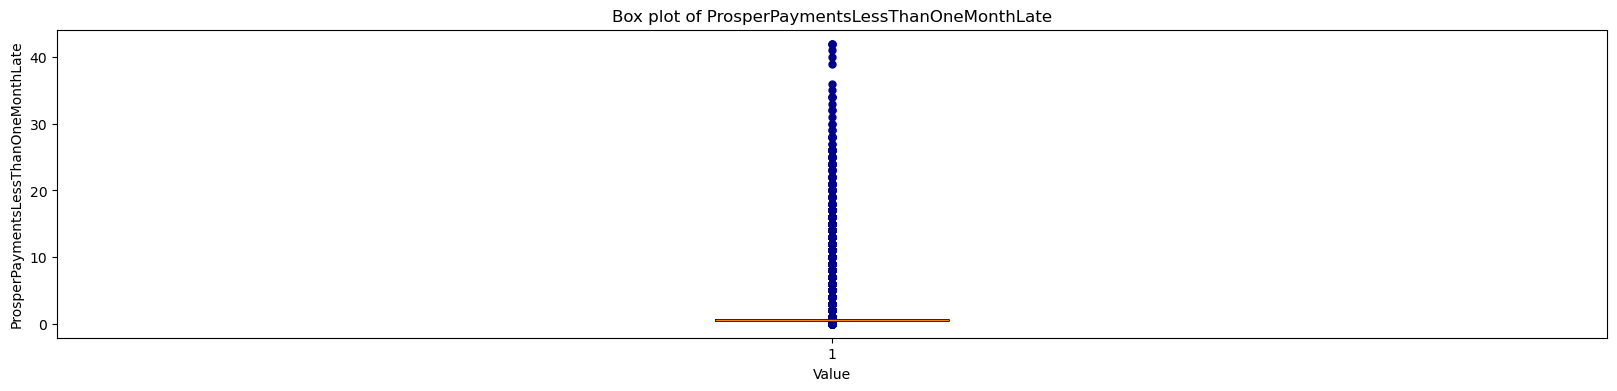

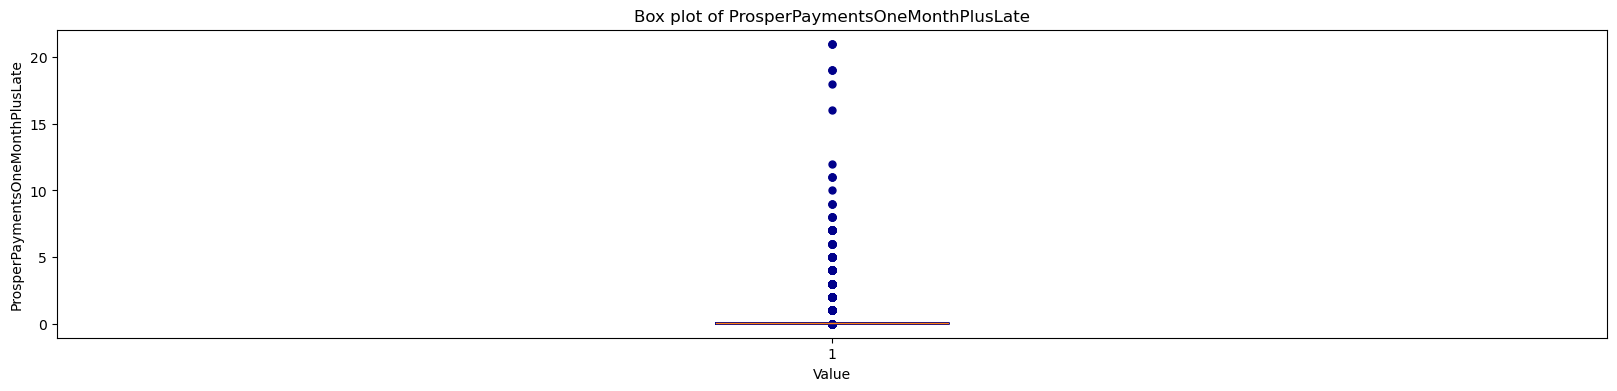

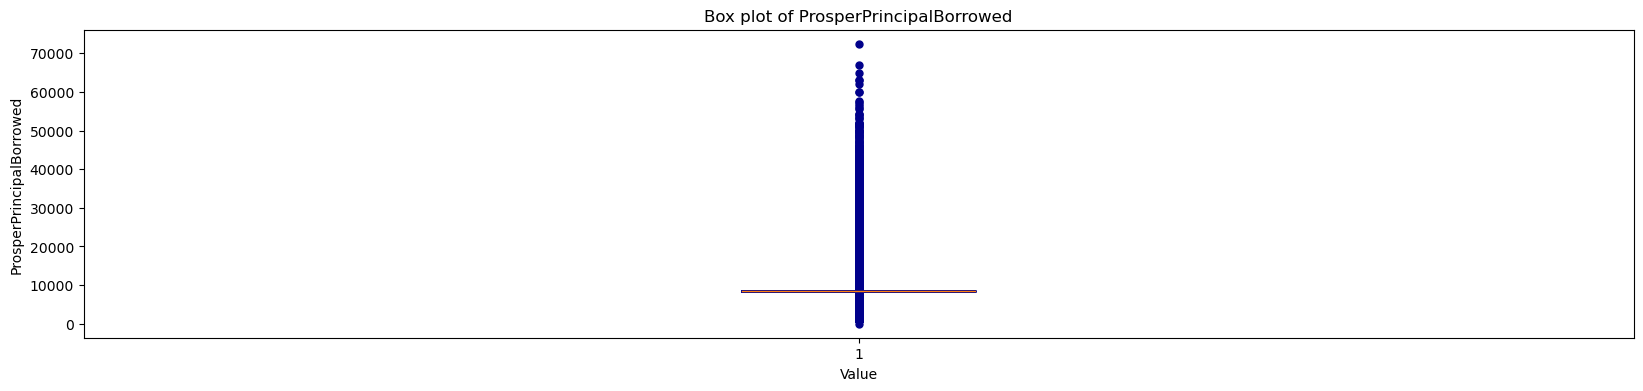

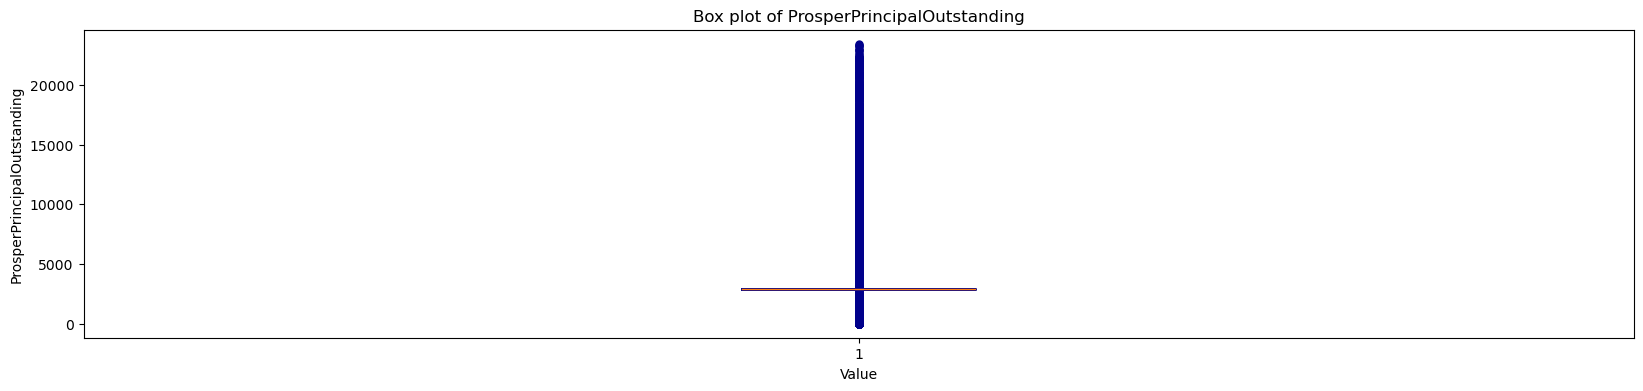

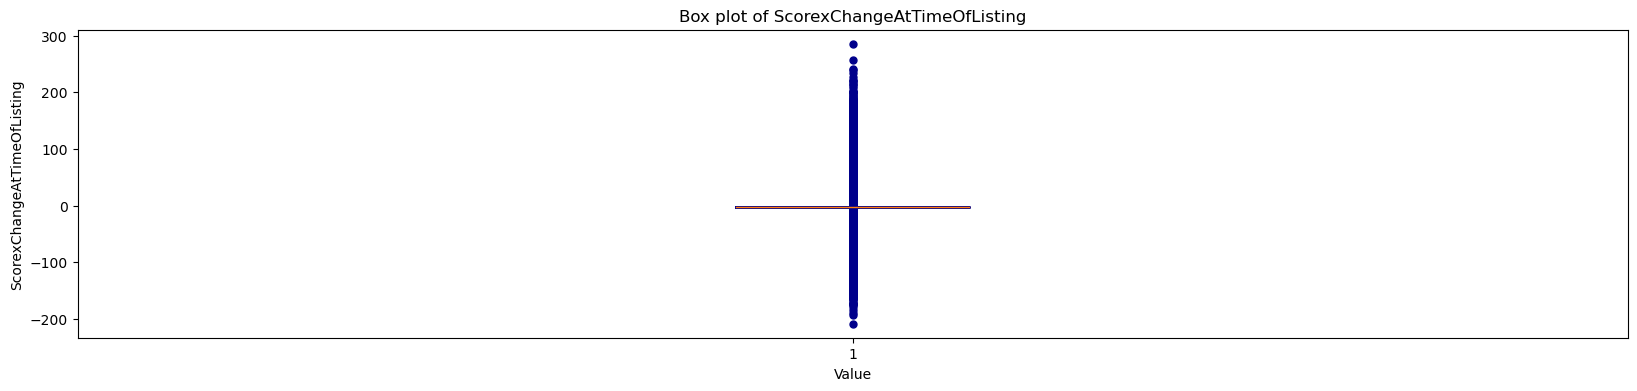

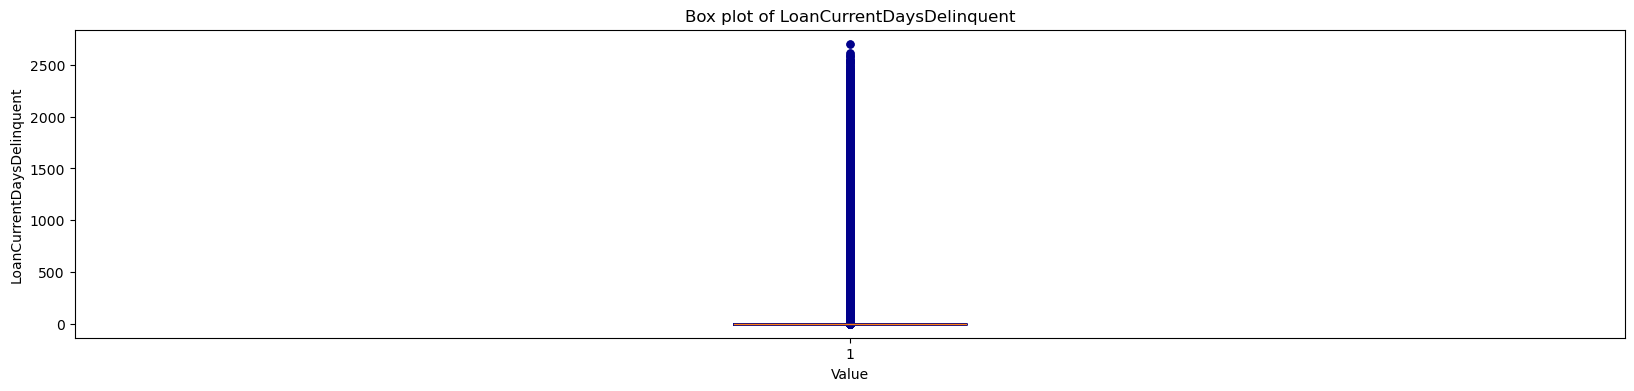

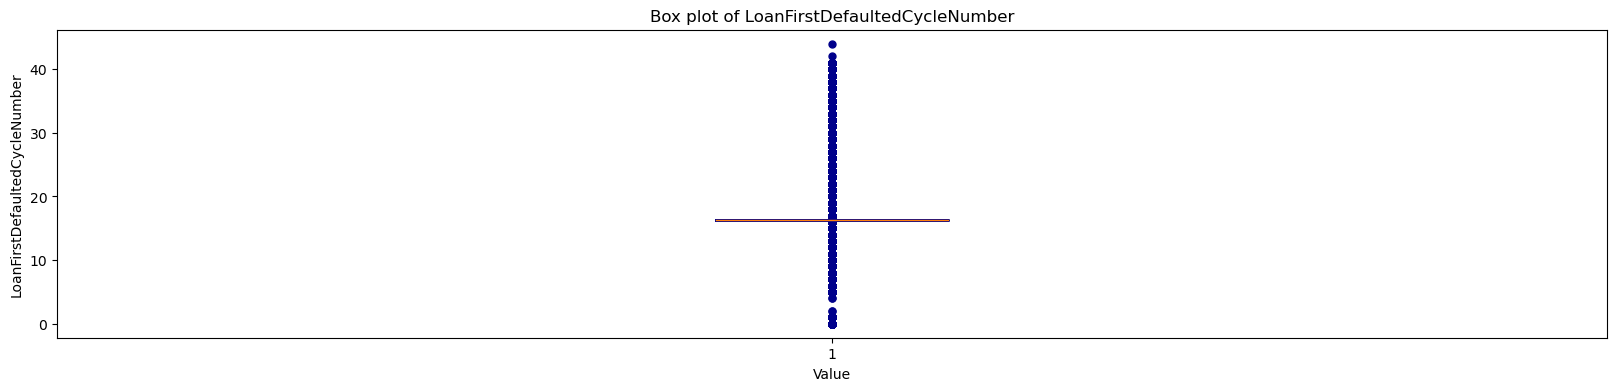

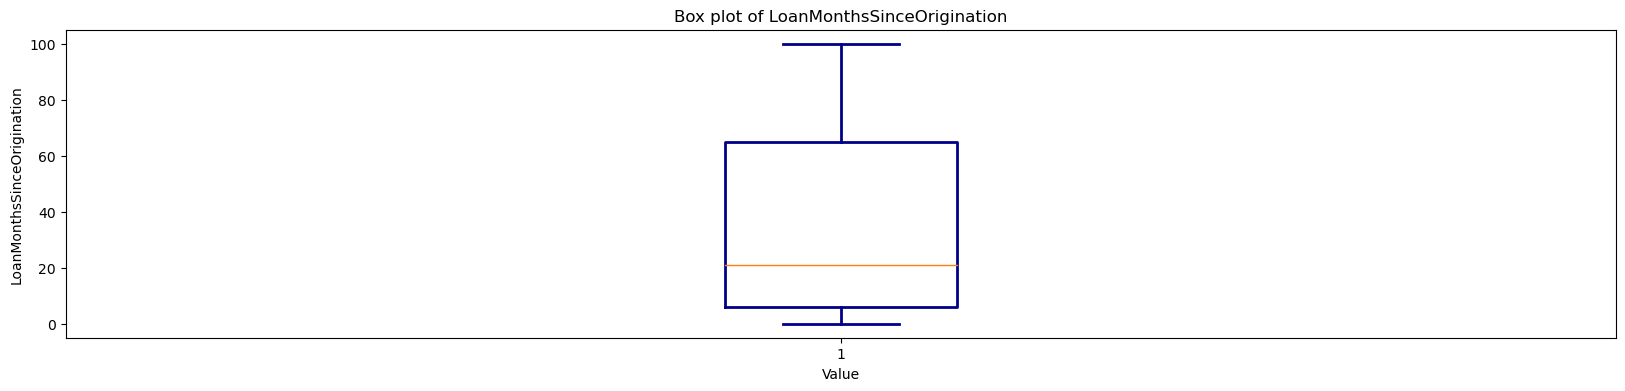

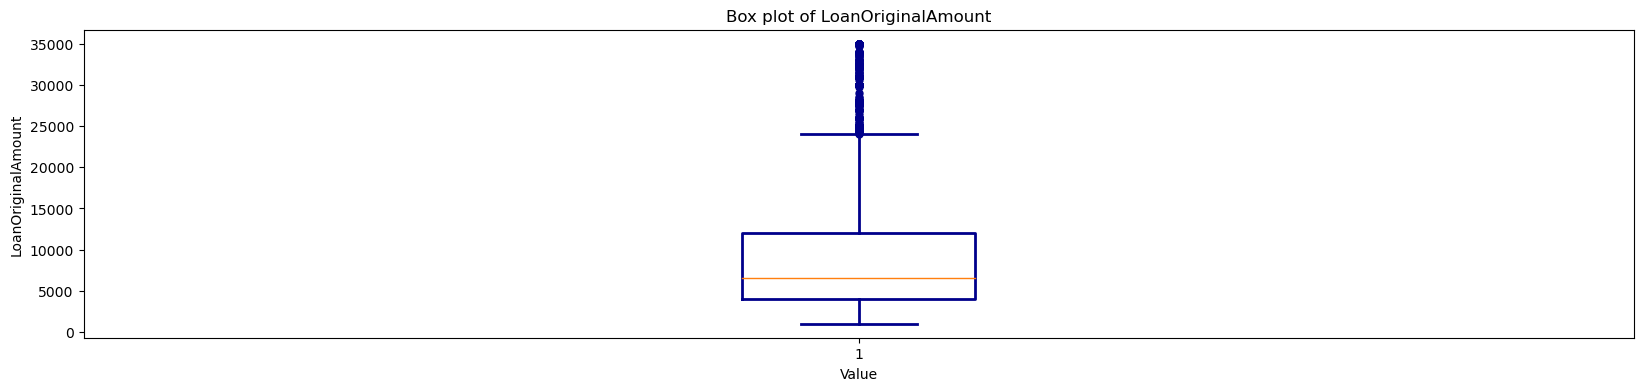

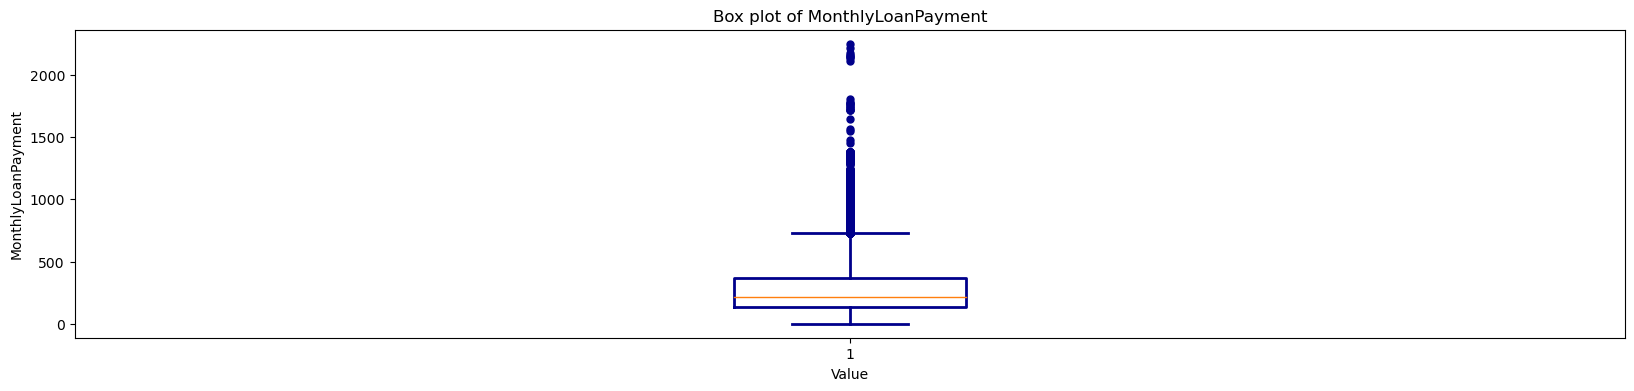

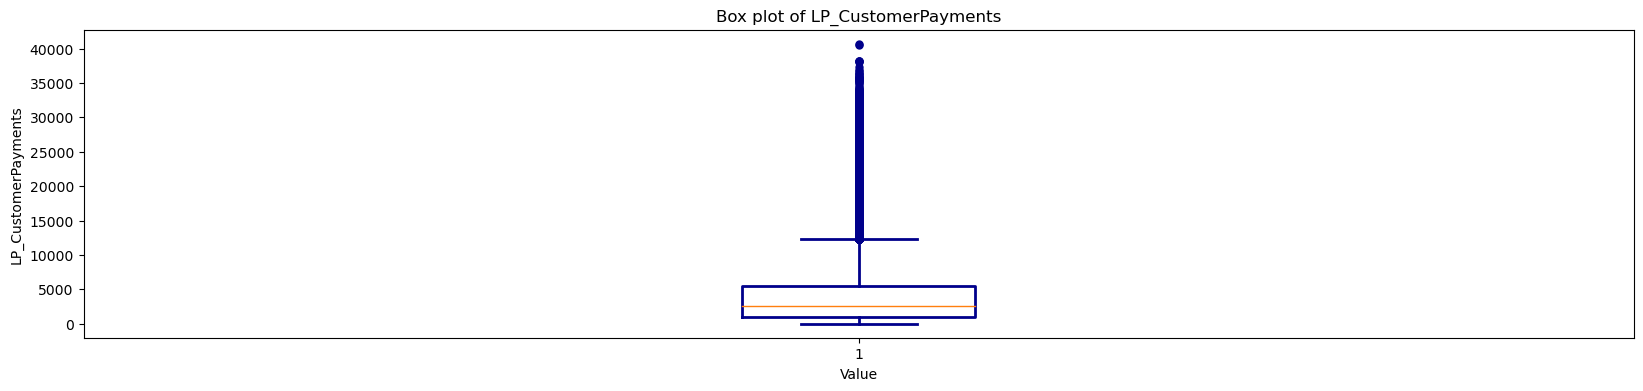

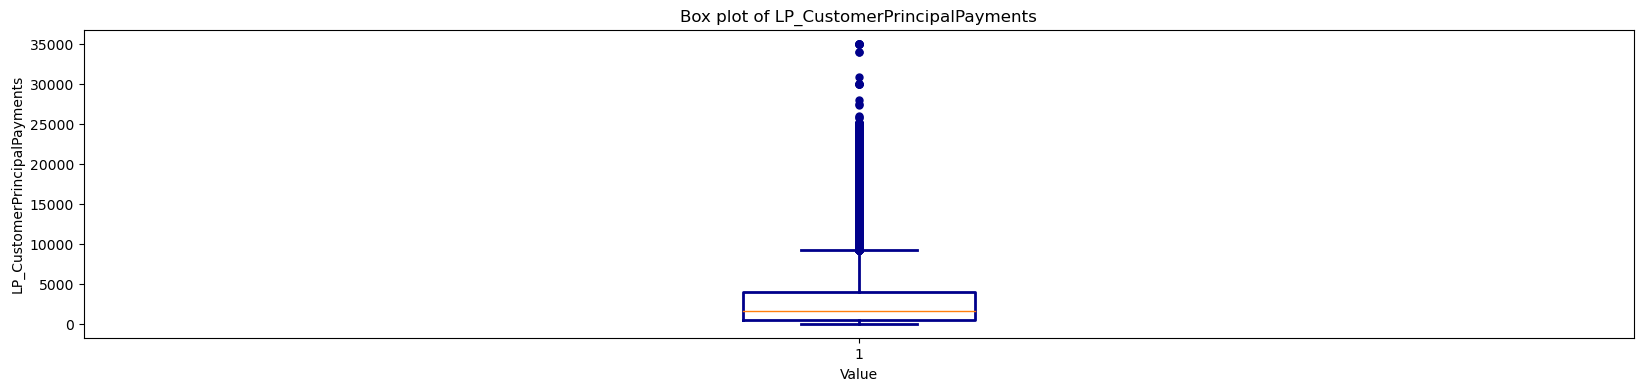

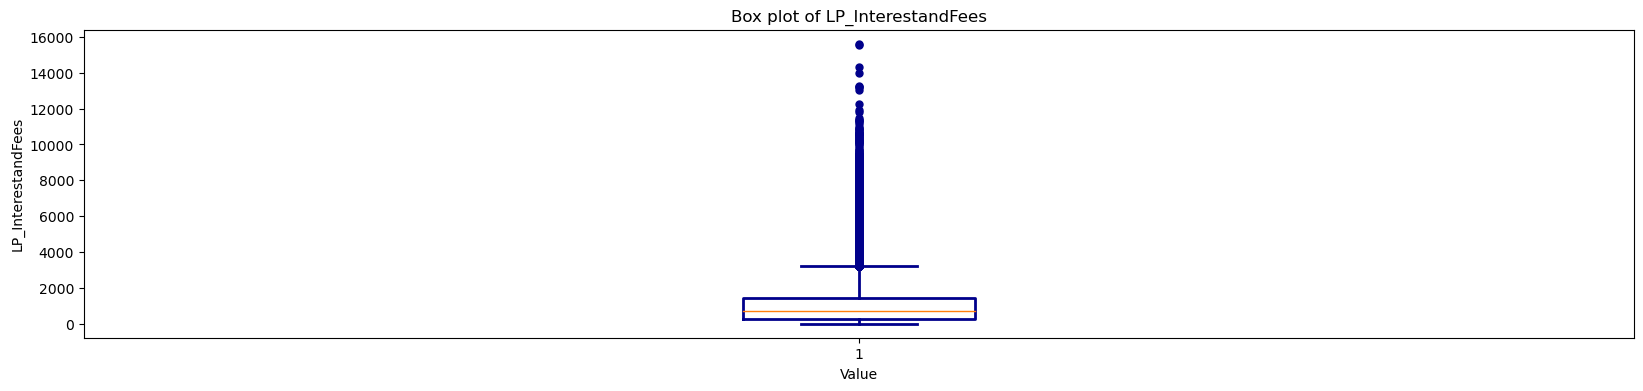

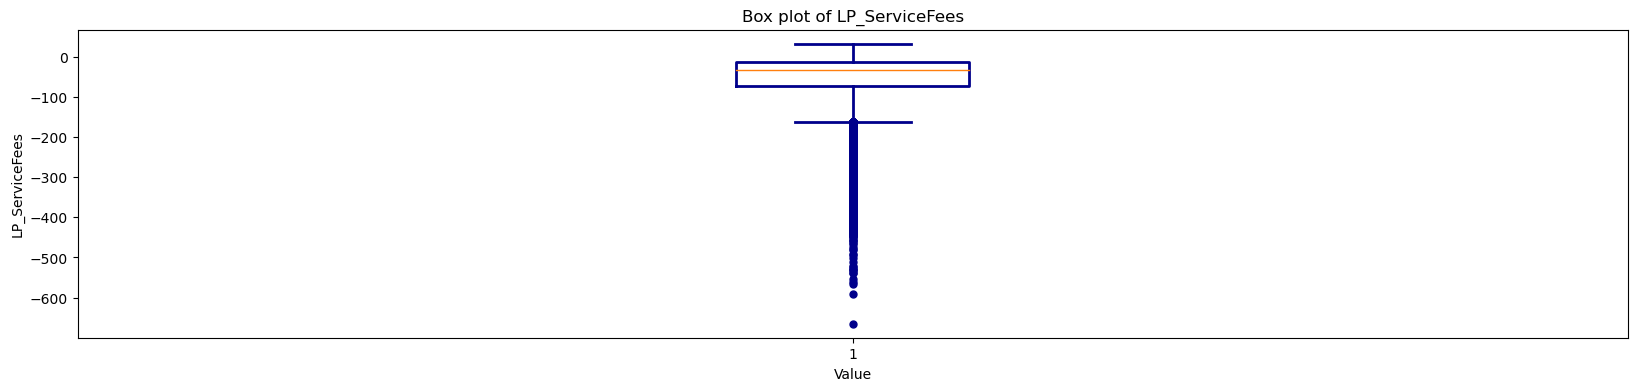

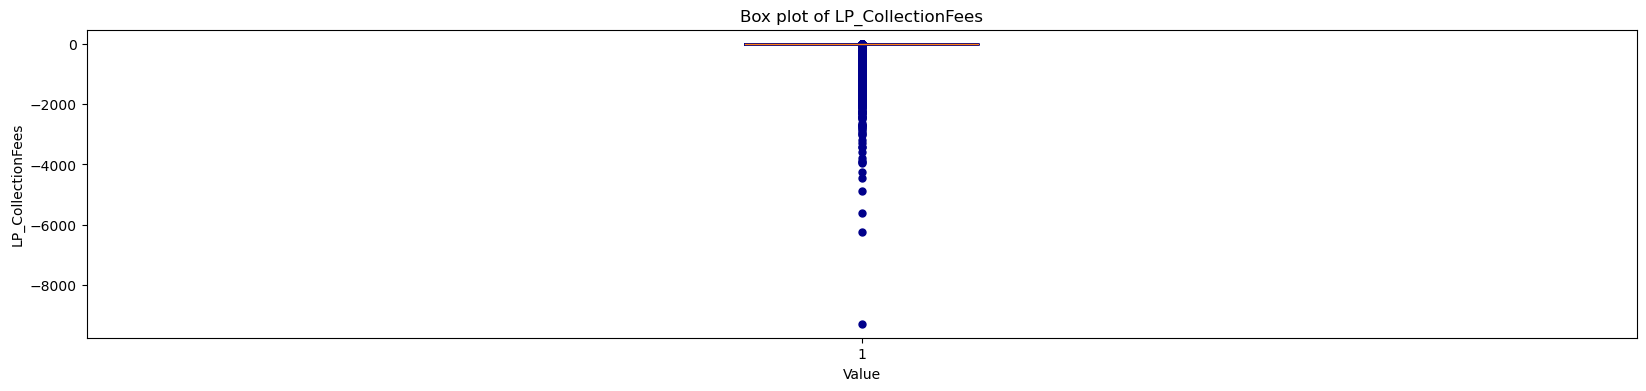

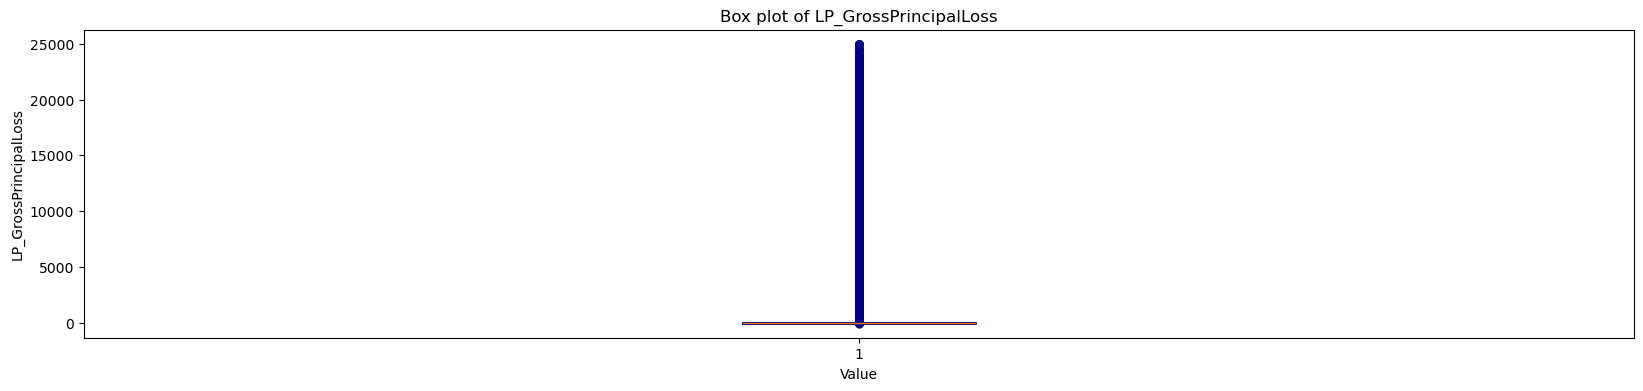

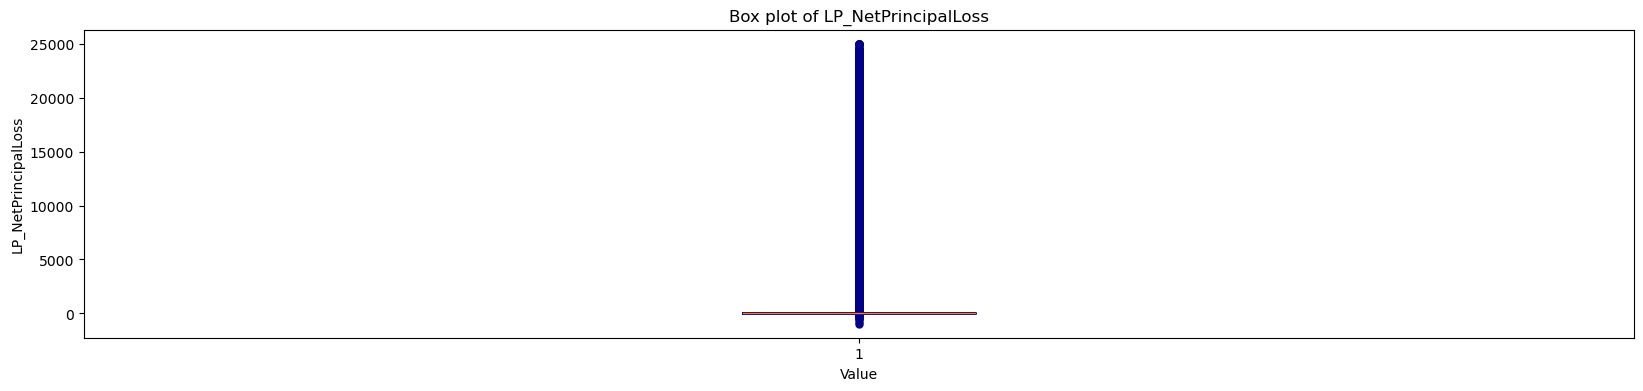

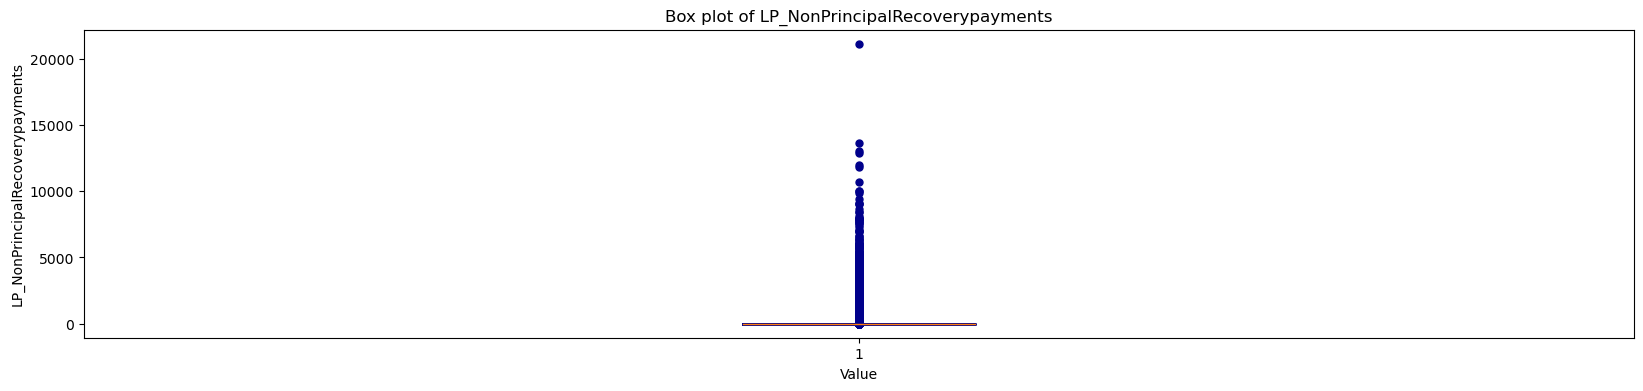

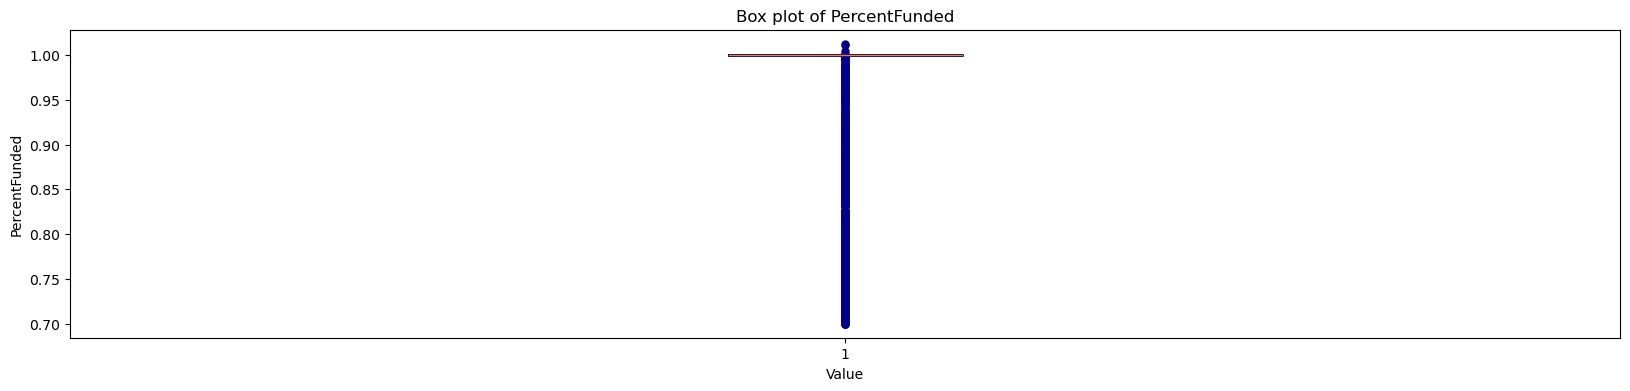

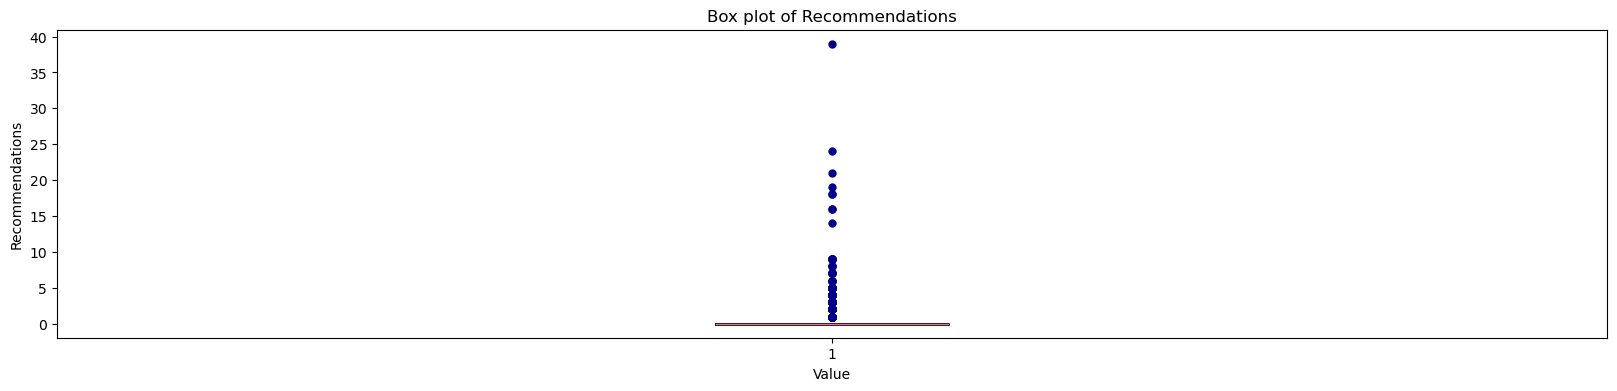

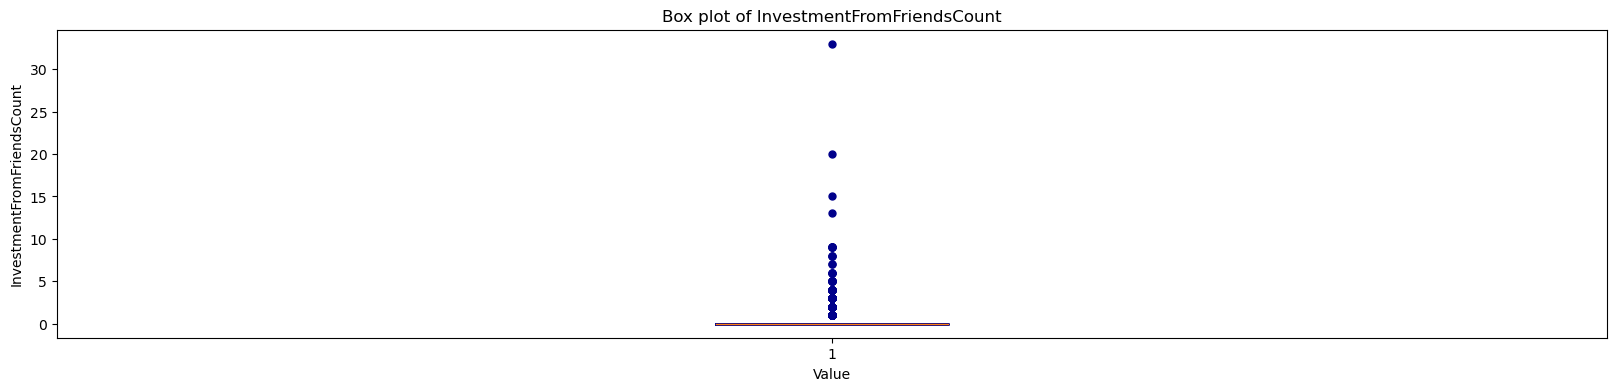

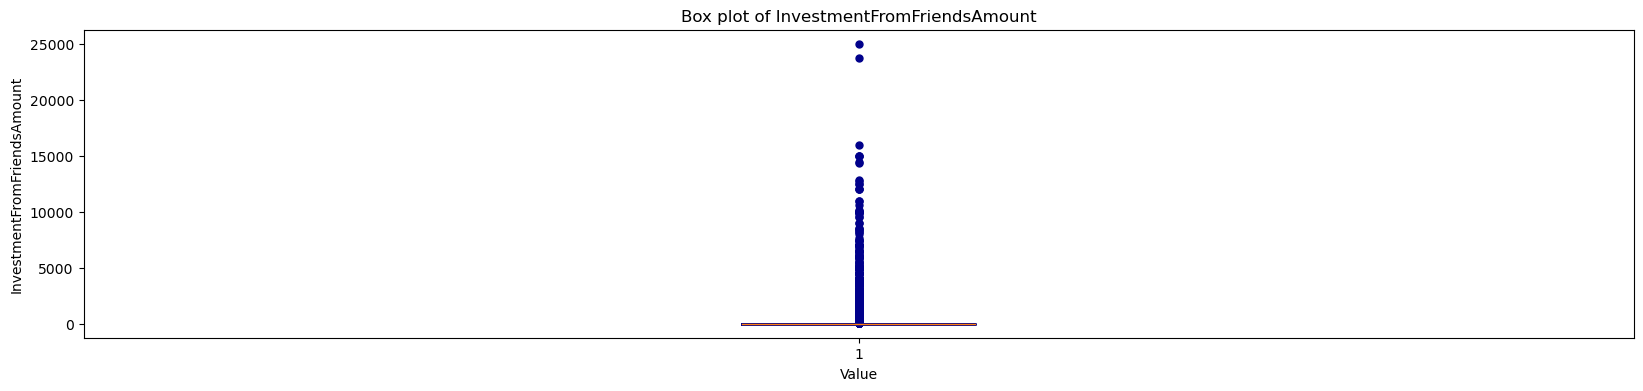

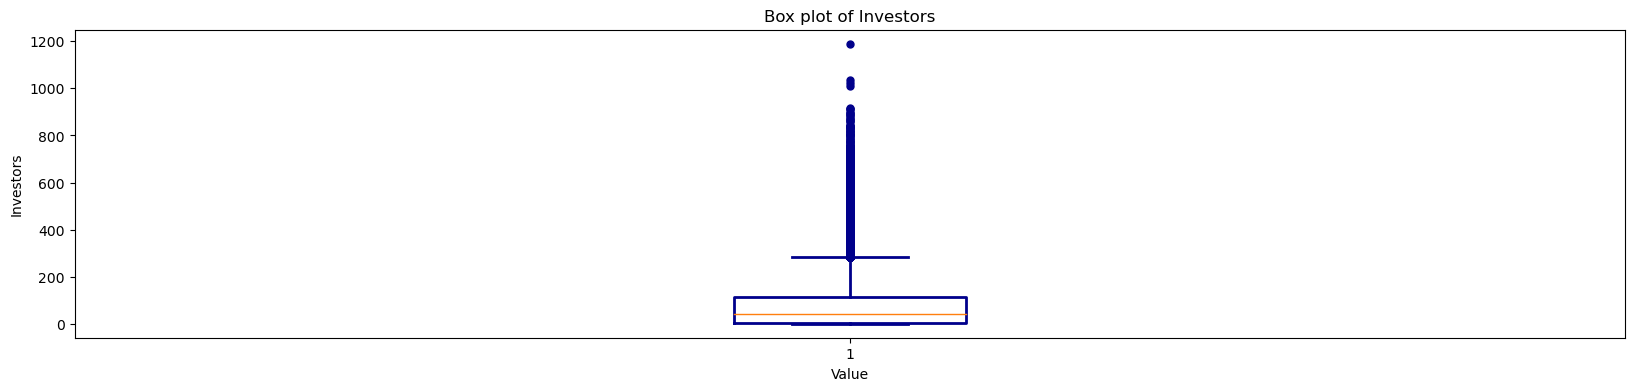

In [22]:
# create a custom design for box plots
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
whiskerprops = dict(linestyle='-', linewidth=2, color='darkblue')
capprops = dict(linestyle='-', linewidth=2, color='darkblue')
flierprops = dict(marker='o', markersize=5, markerfacecolor='darkblue', markeredgecolor='darkblue')

# create a box plot for each numeric column
for column in numeric_cols:
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.boxplot(numeric_cols[column], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel(column)
    plt.show()

In [23]:
# Removing Outliers in above columns
def remove_outlier (col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return col[(col >= lower_range ) & (col <= upper_range)]

In [24]:
cleaned_cols = df[num_cols].apply(remove_outlier)

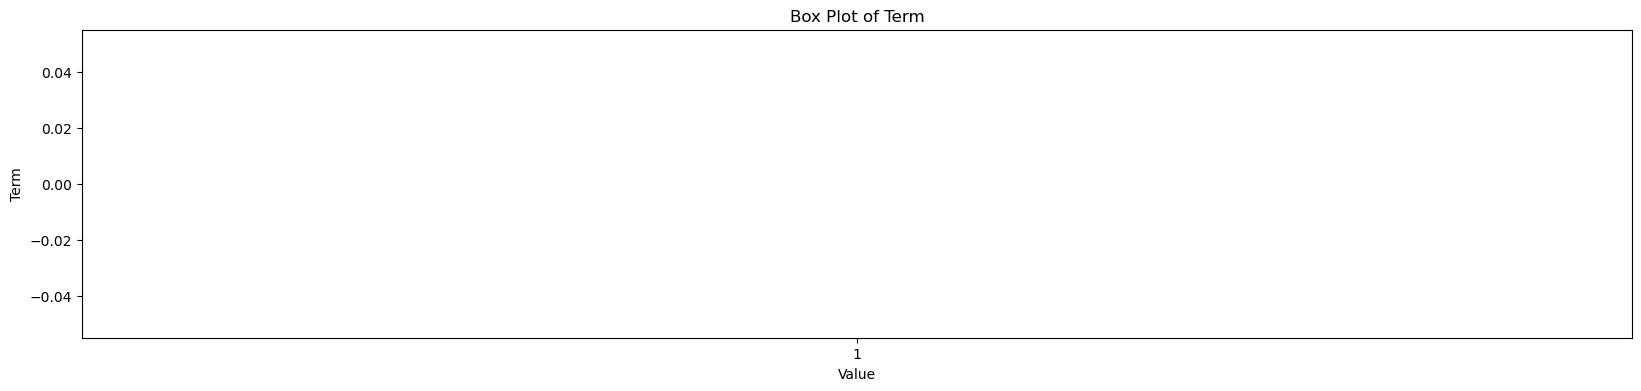

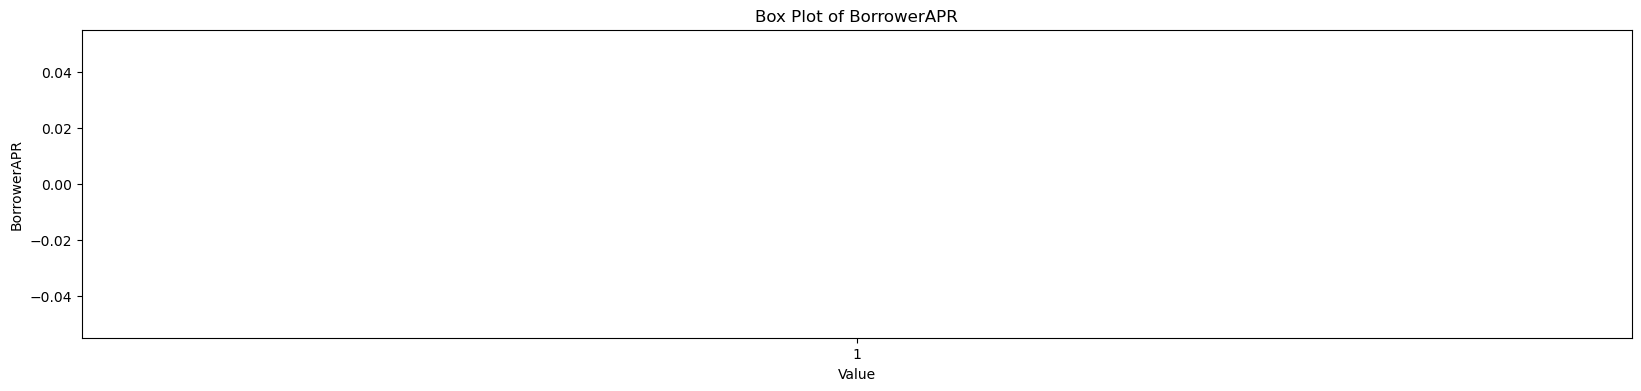

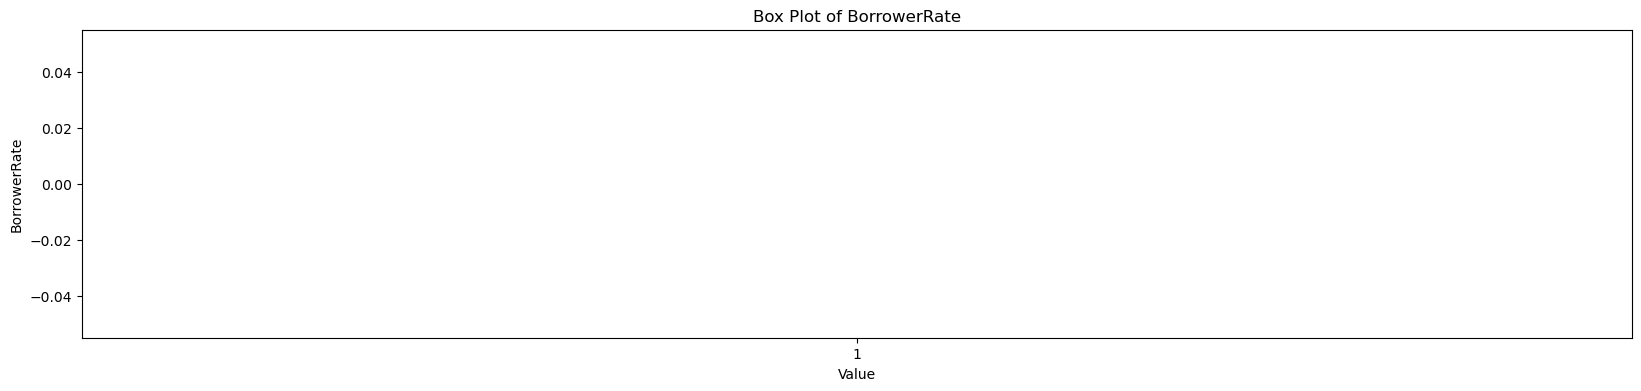

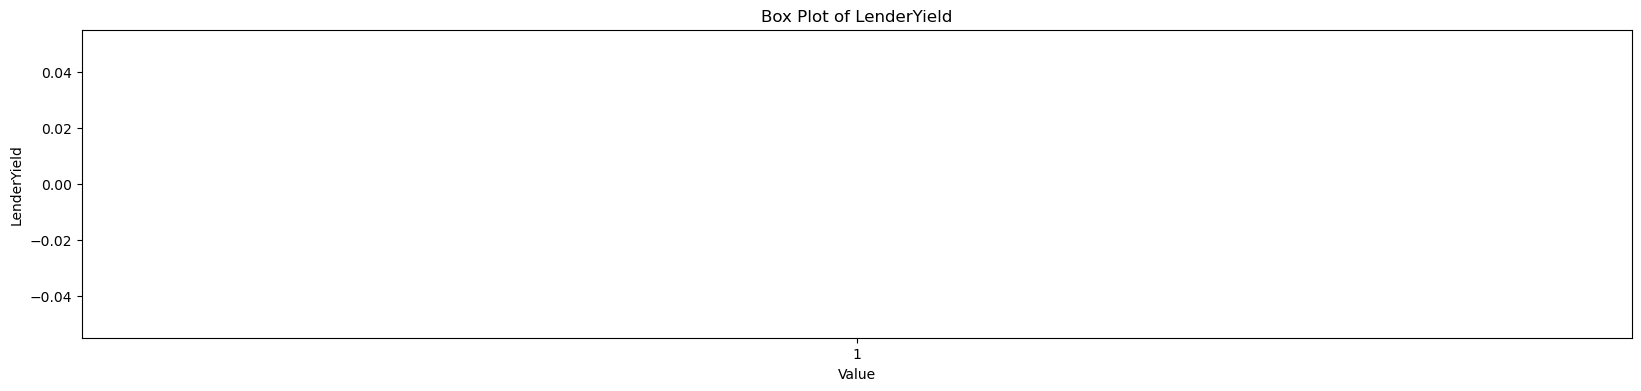

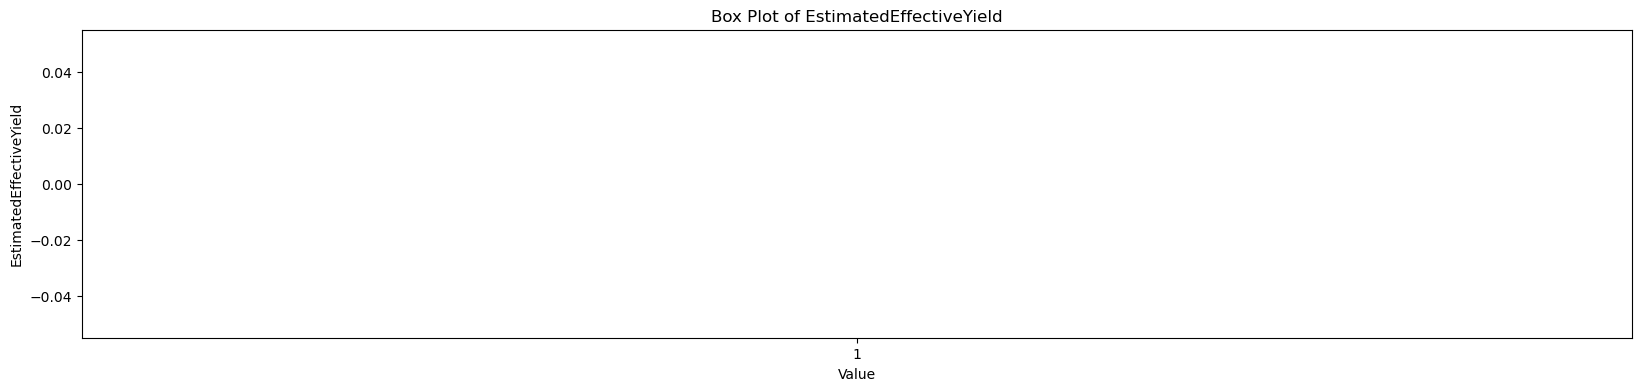

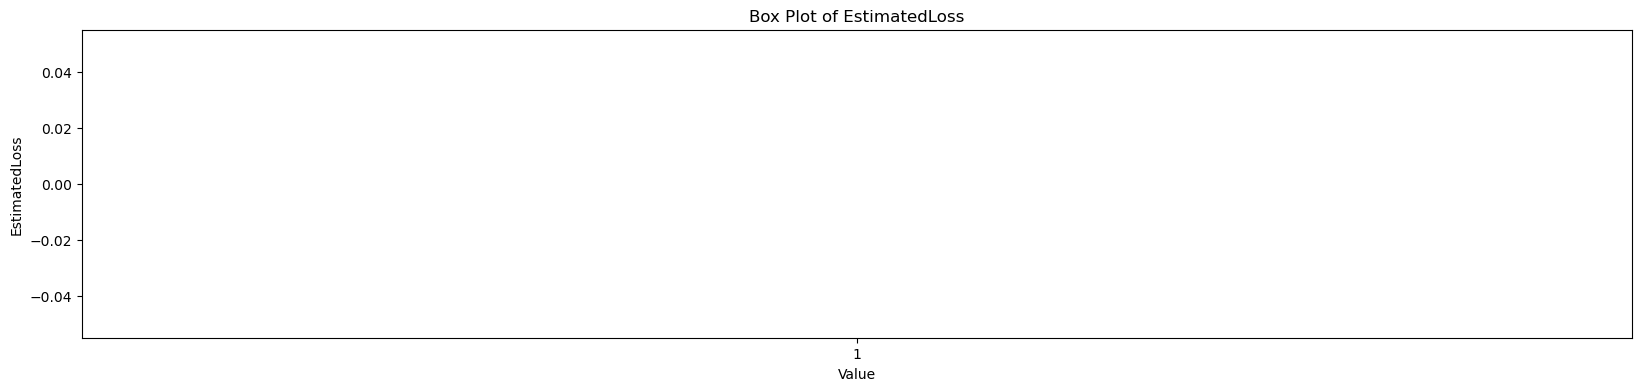

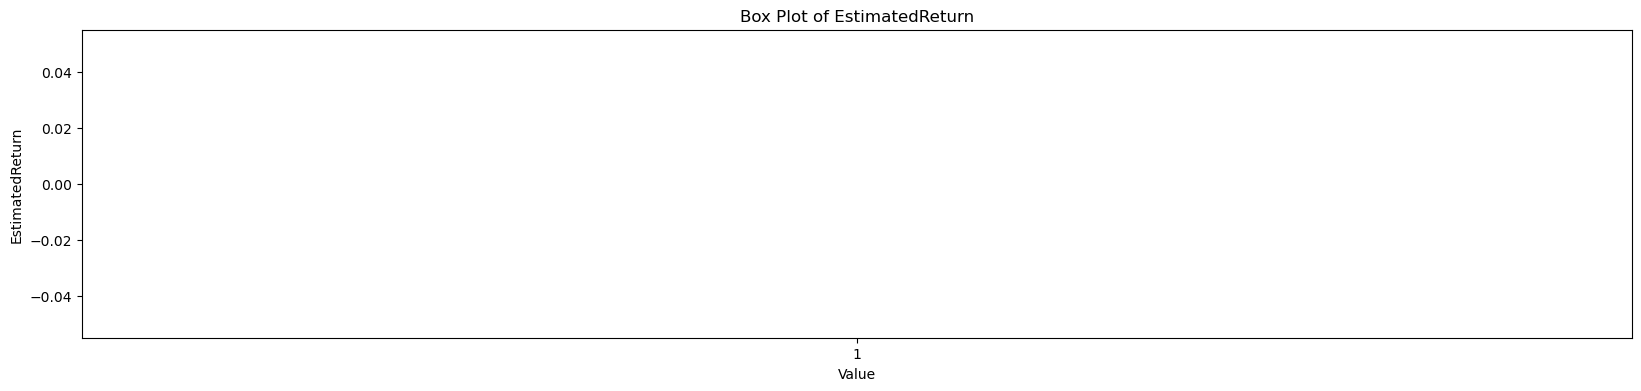

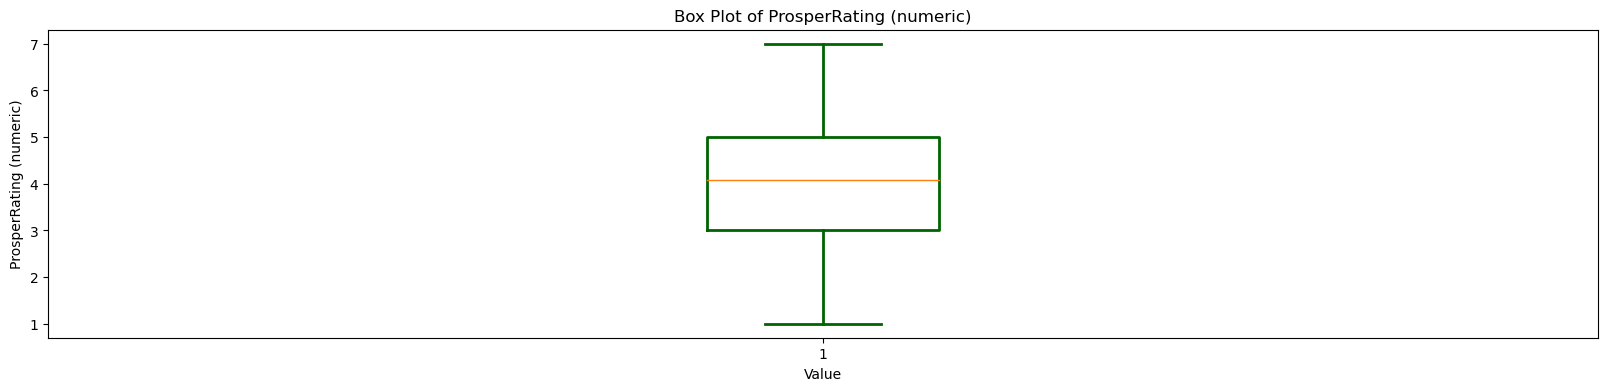

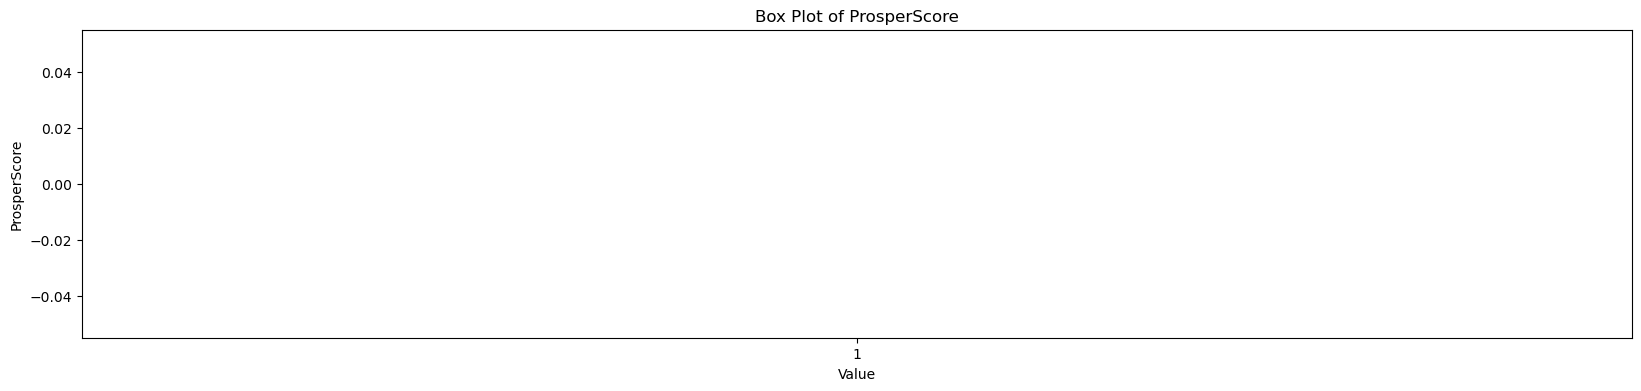

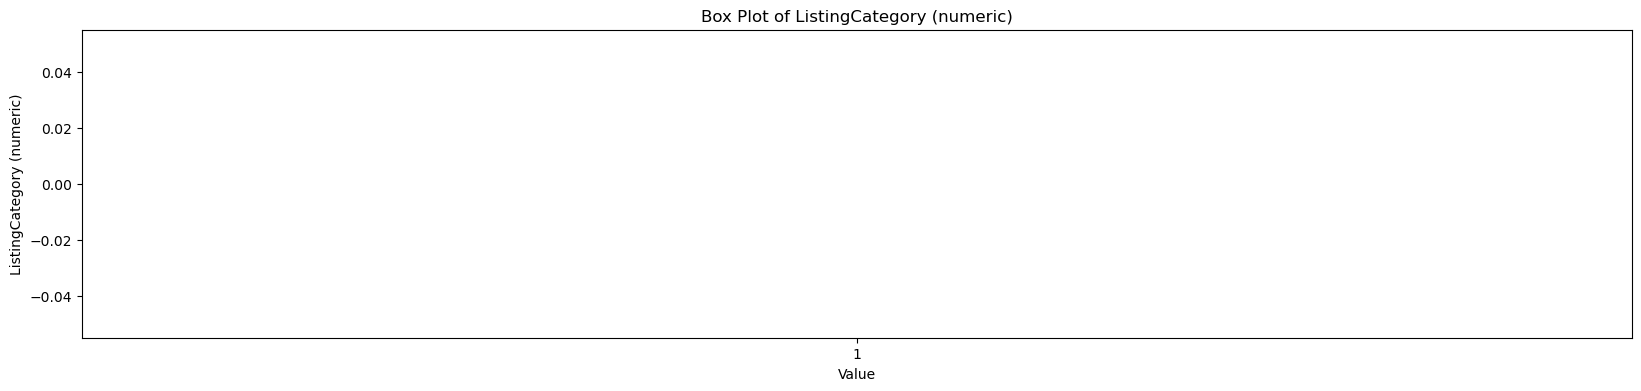

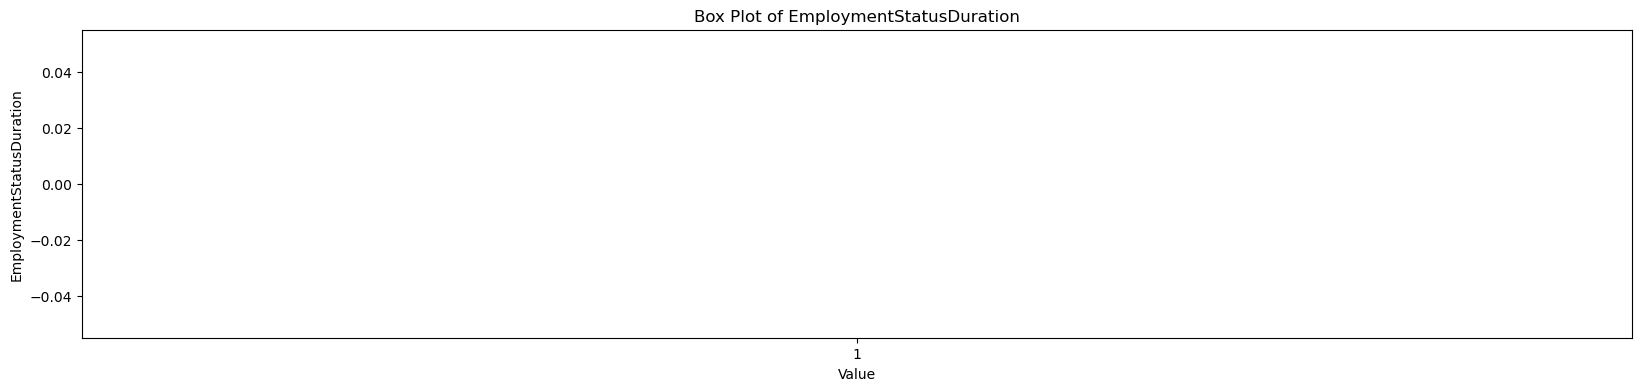

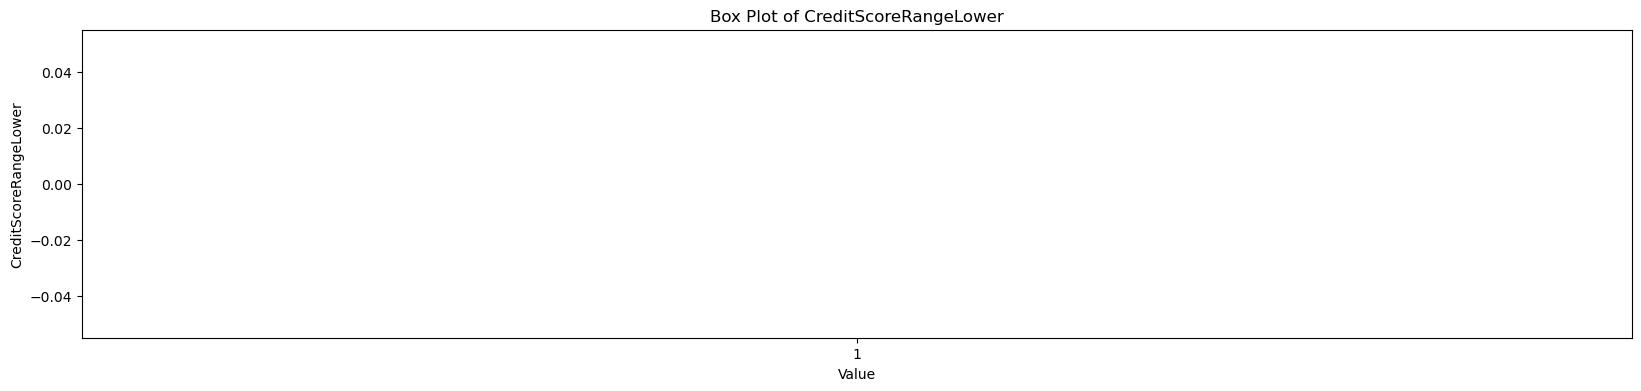

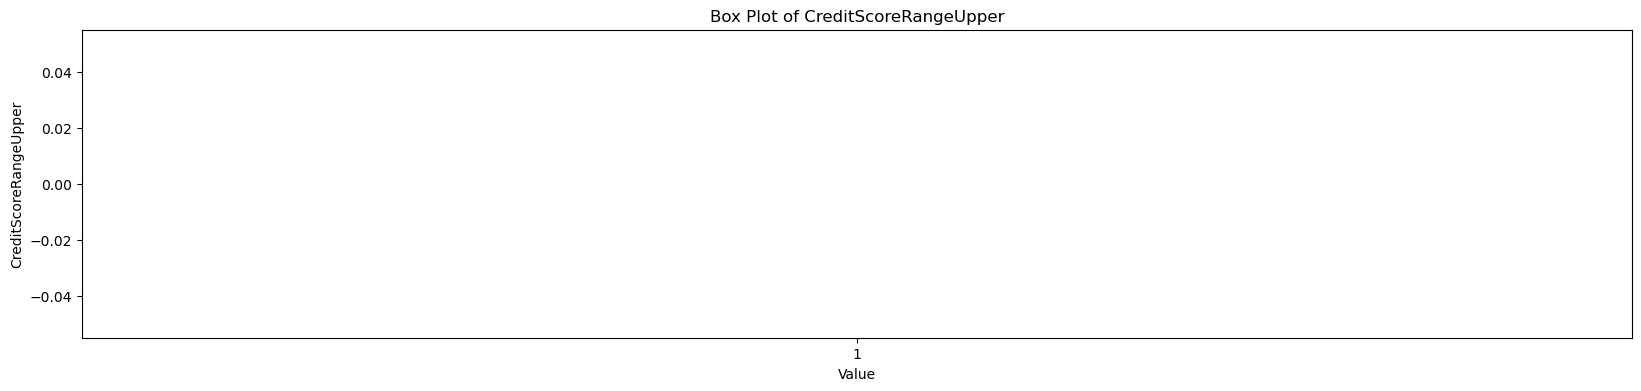

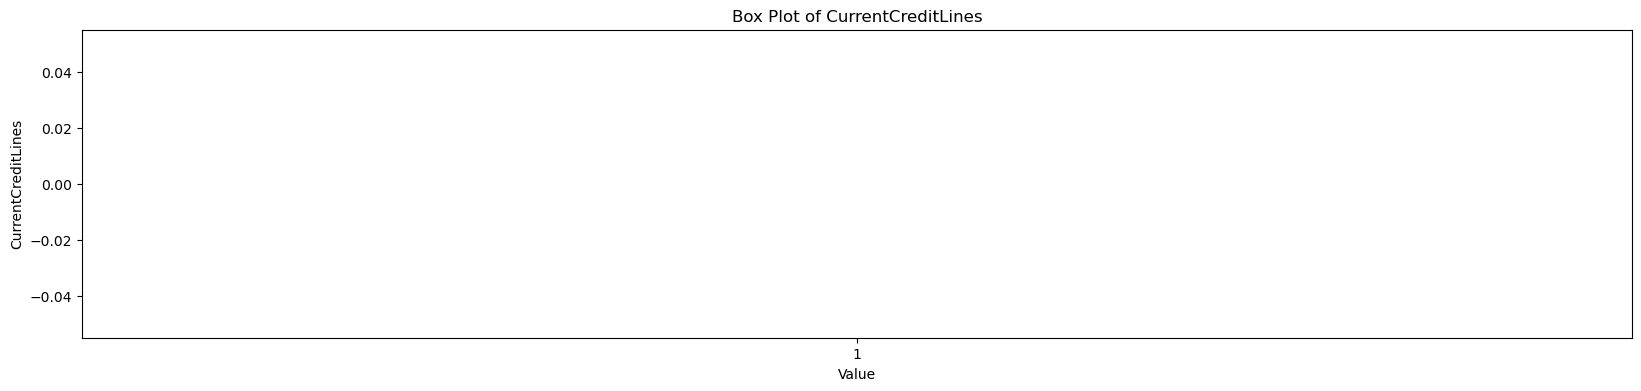

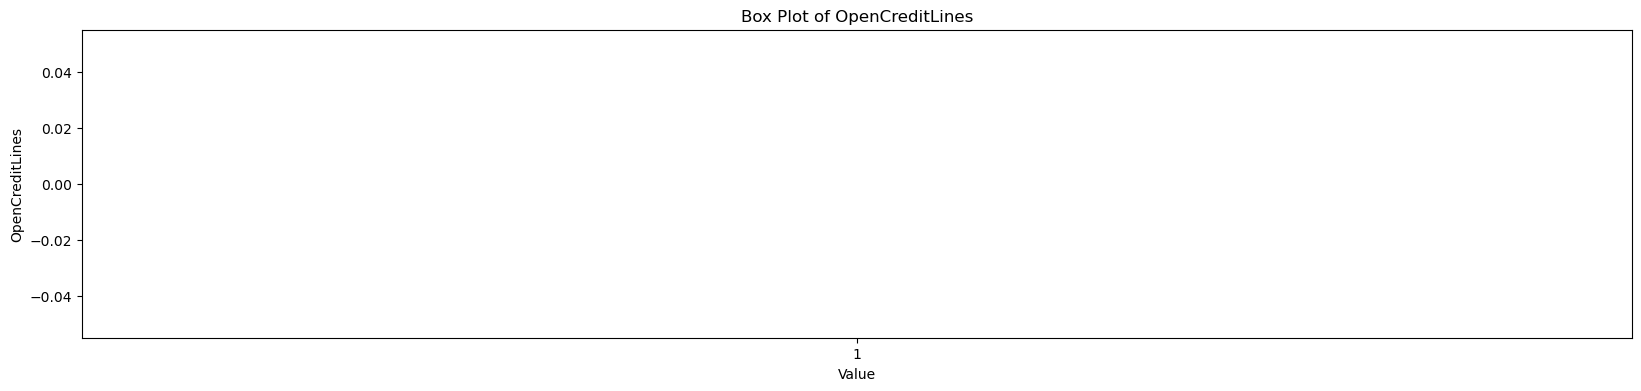

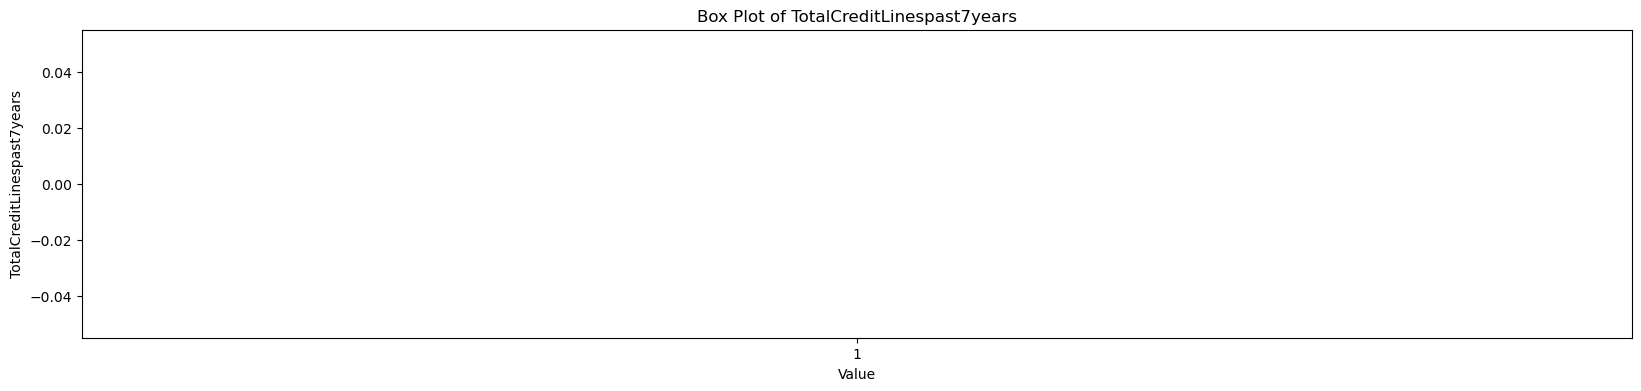

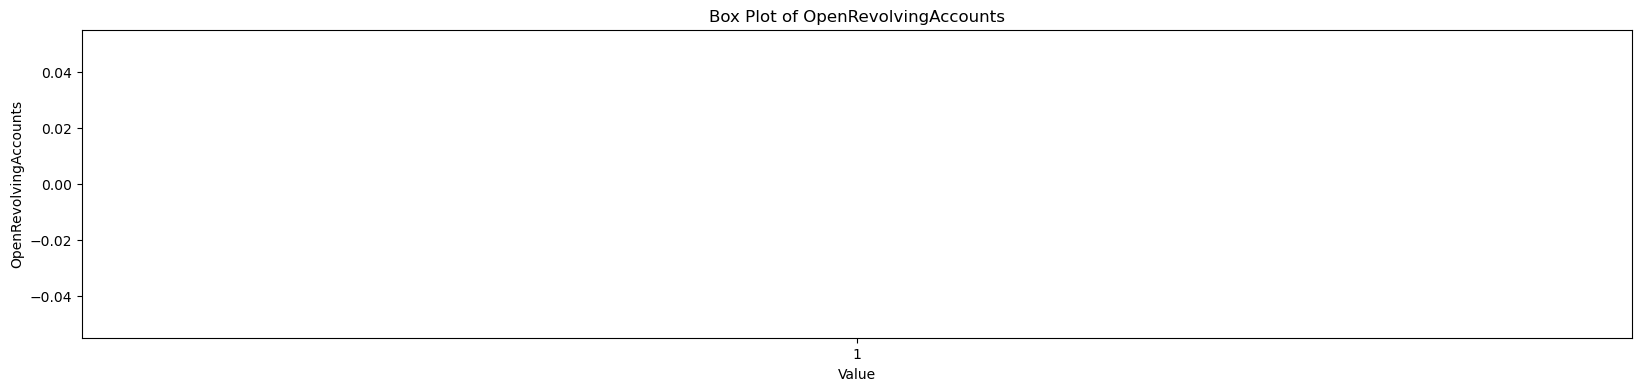

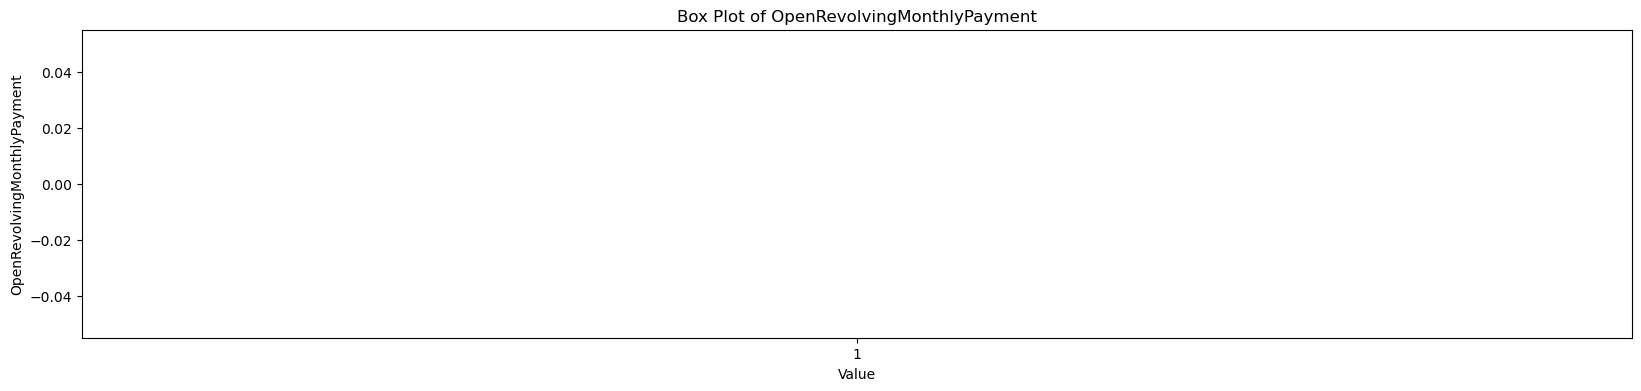

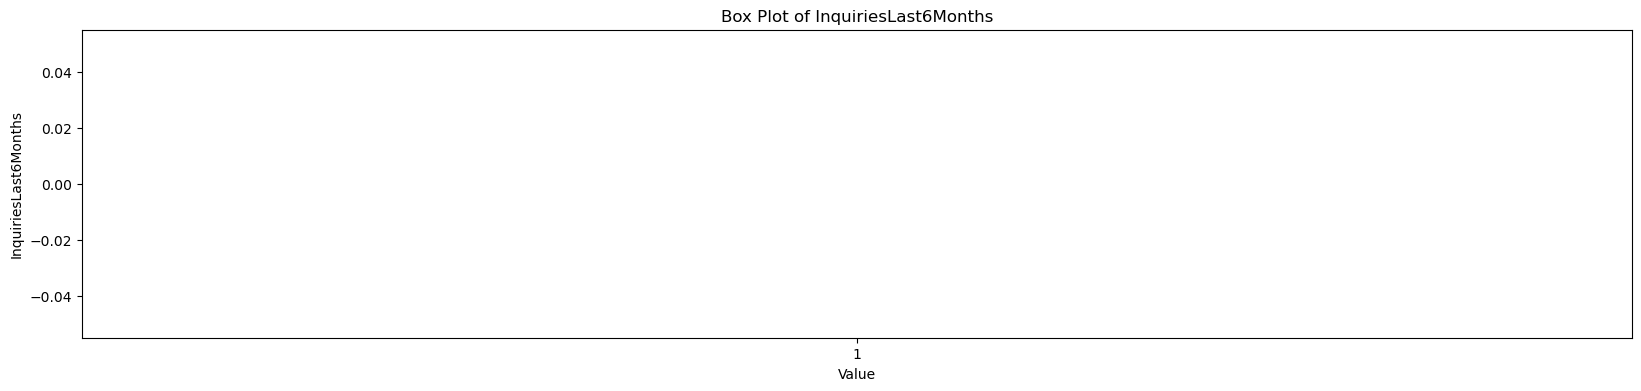

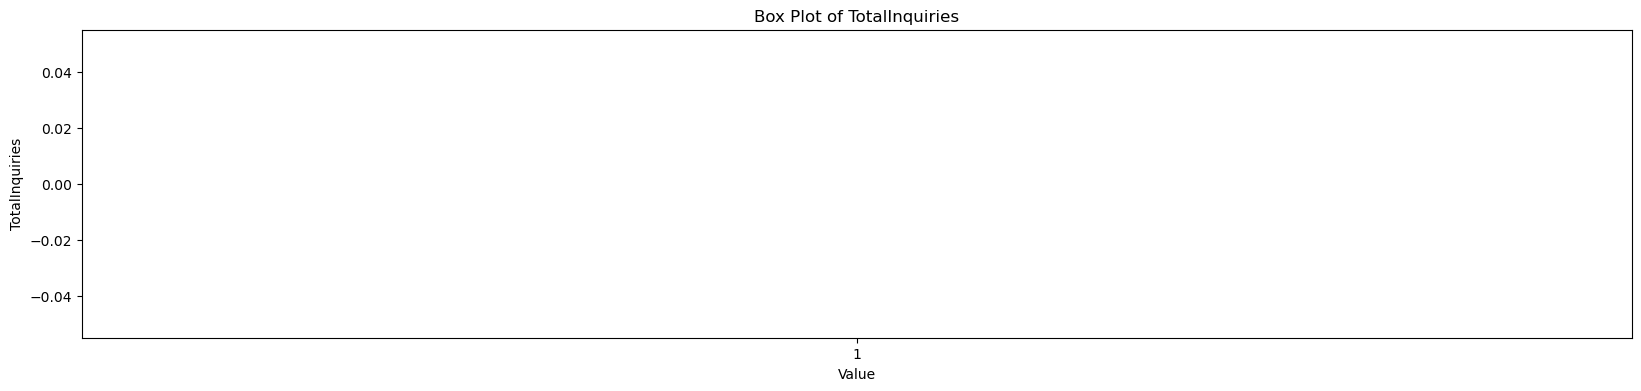

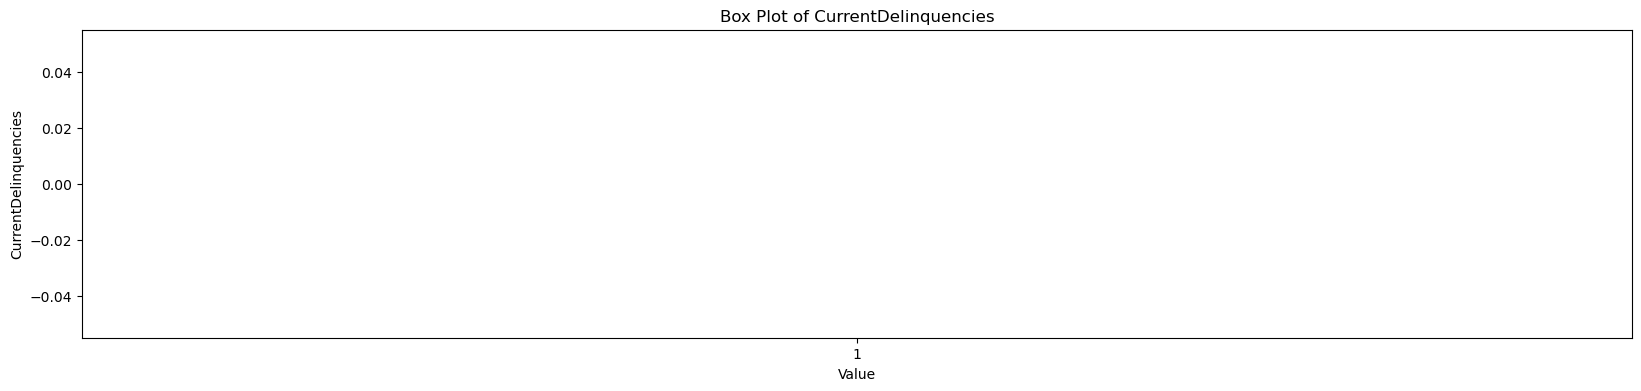

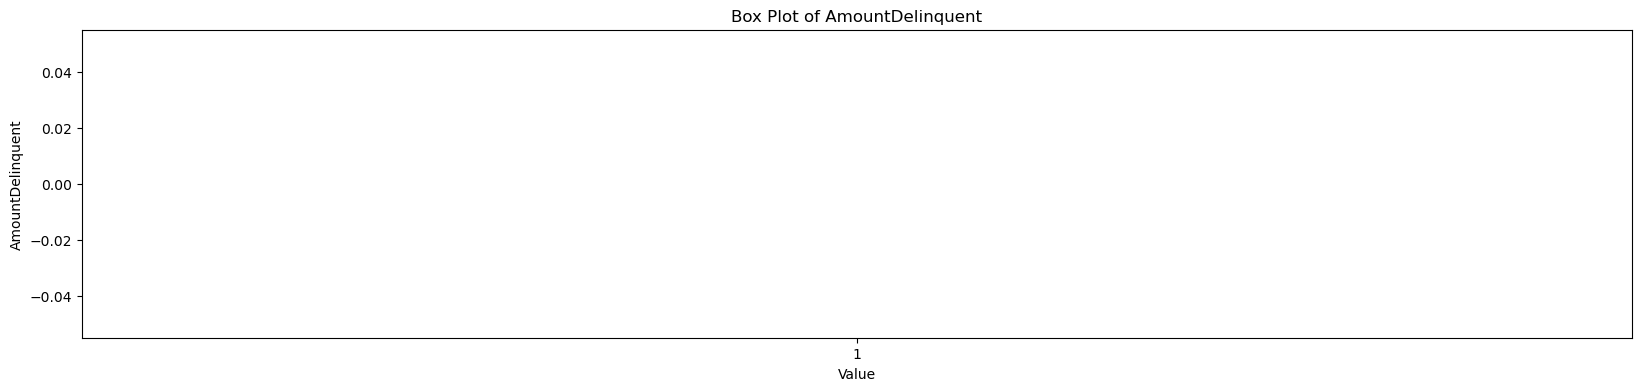

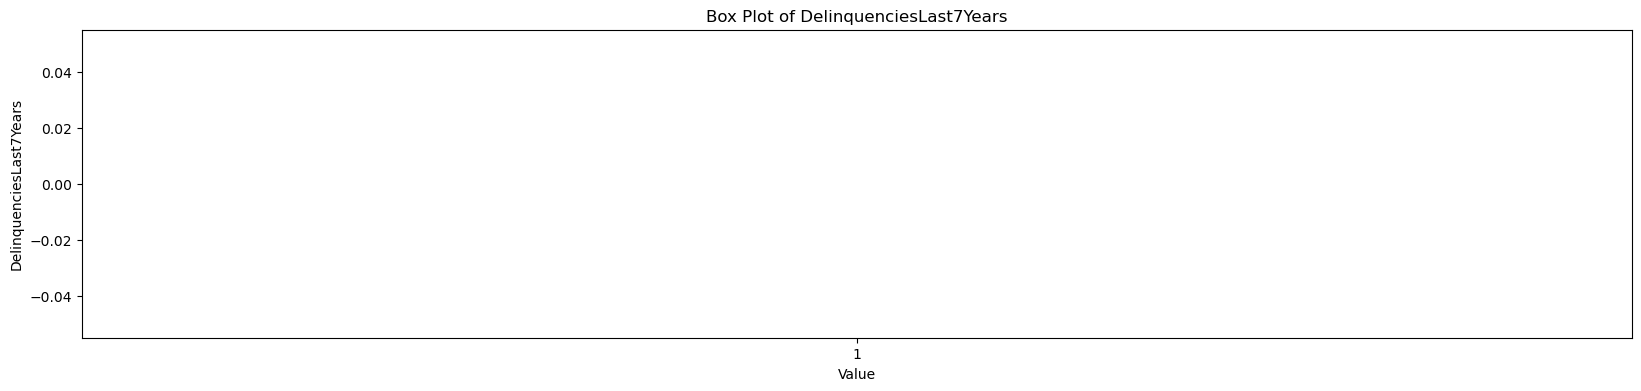

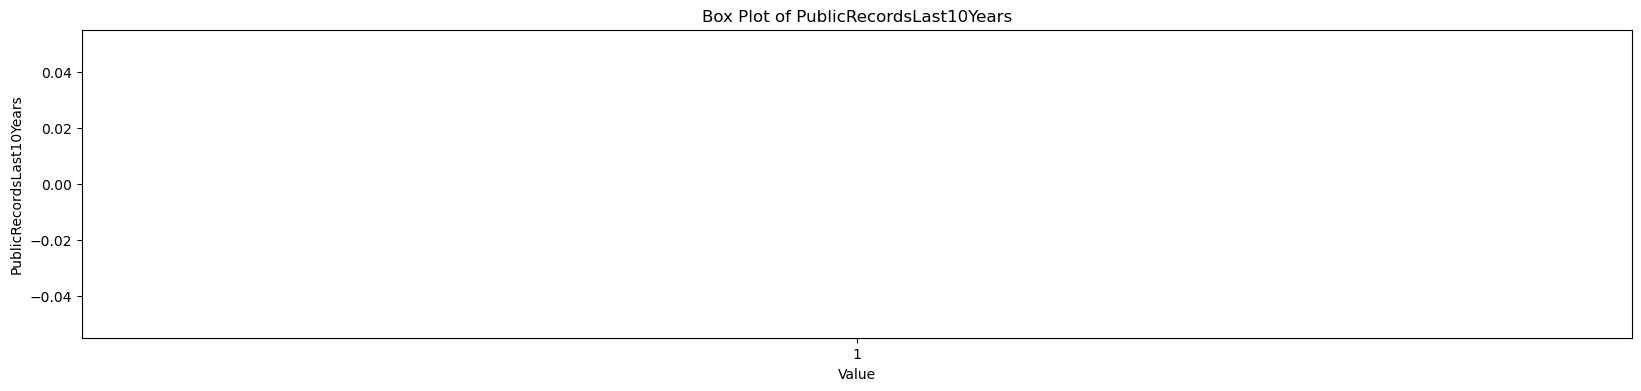

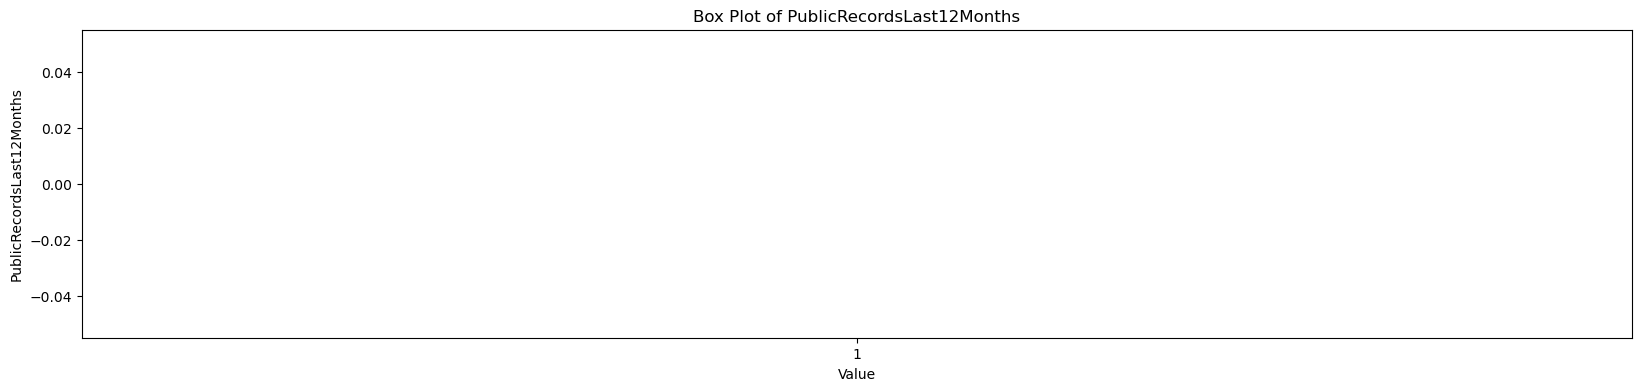

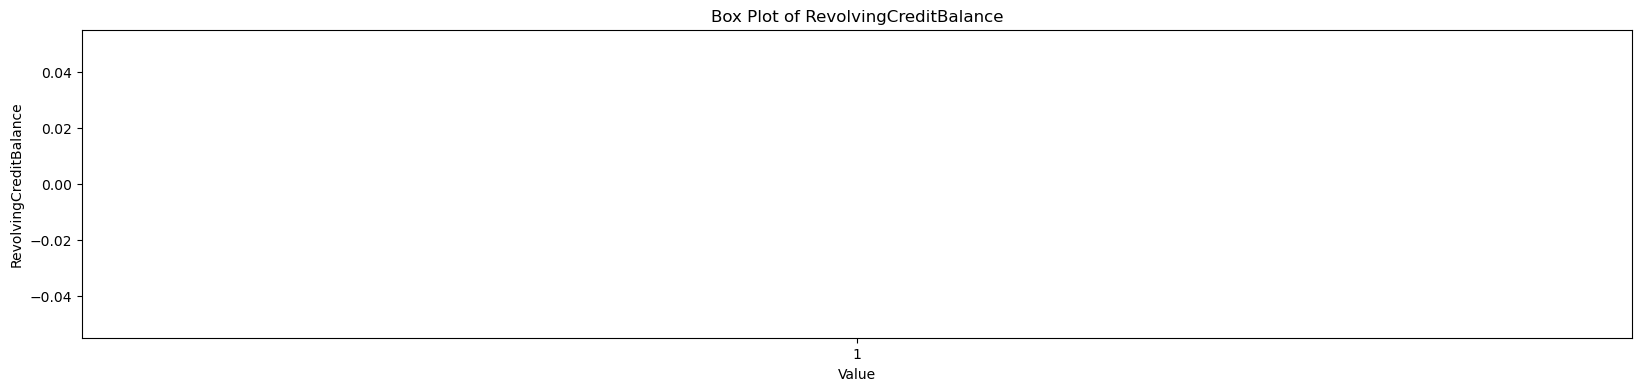

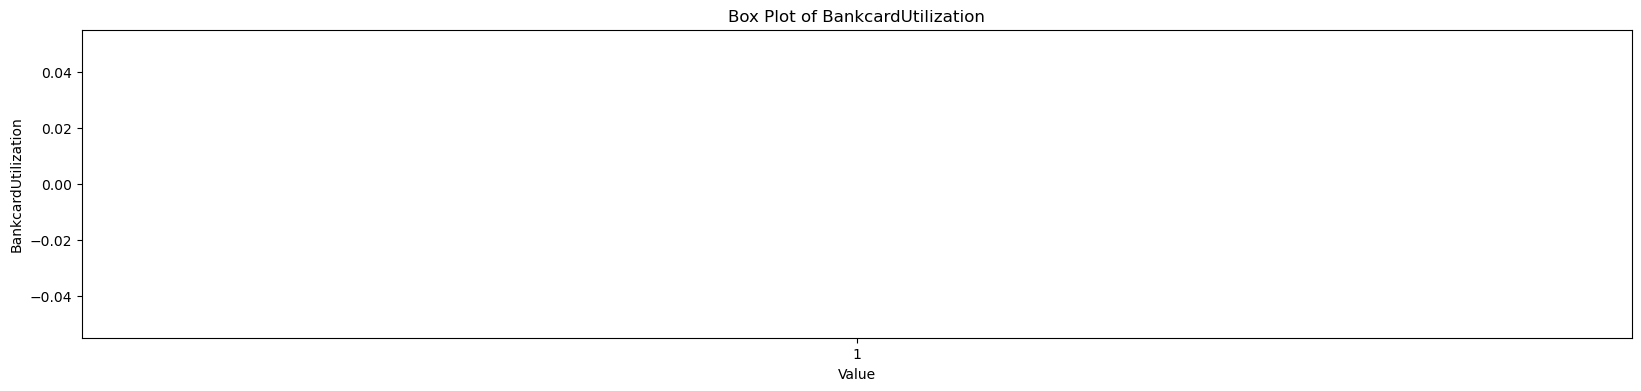

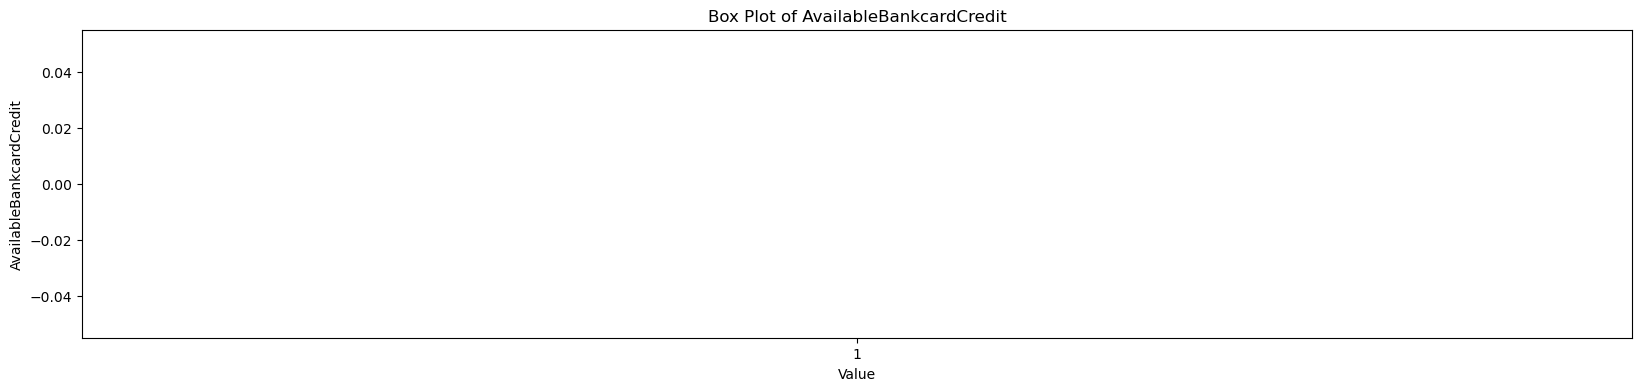

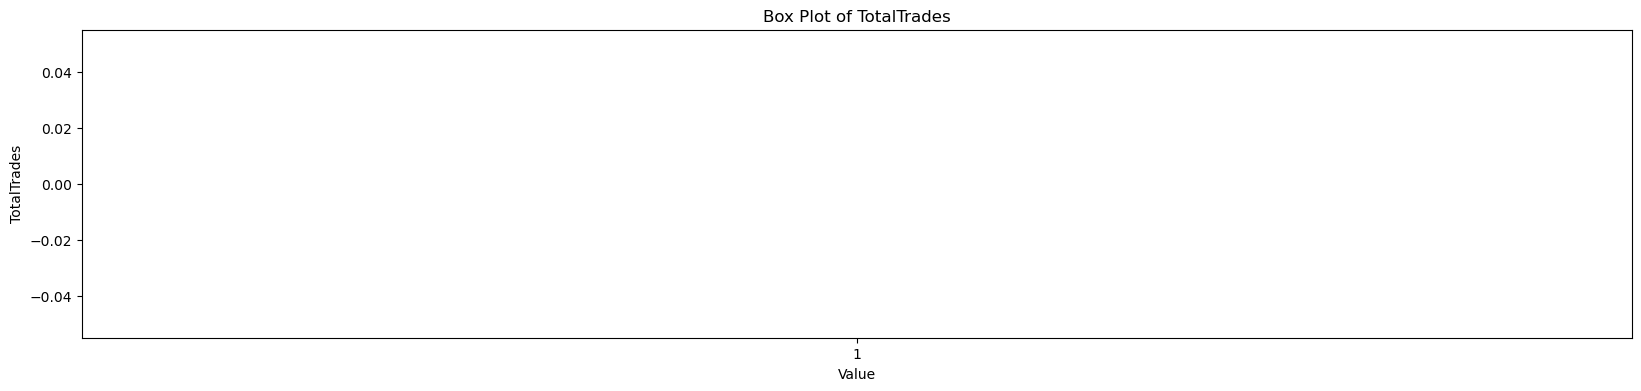

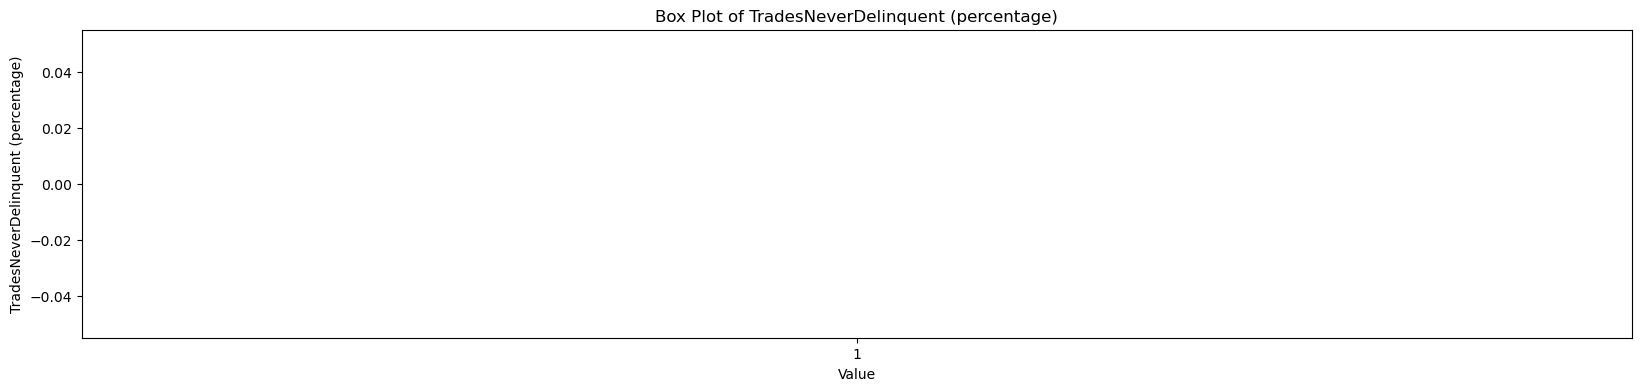

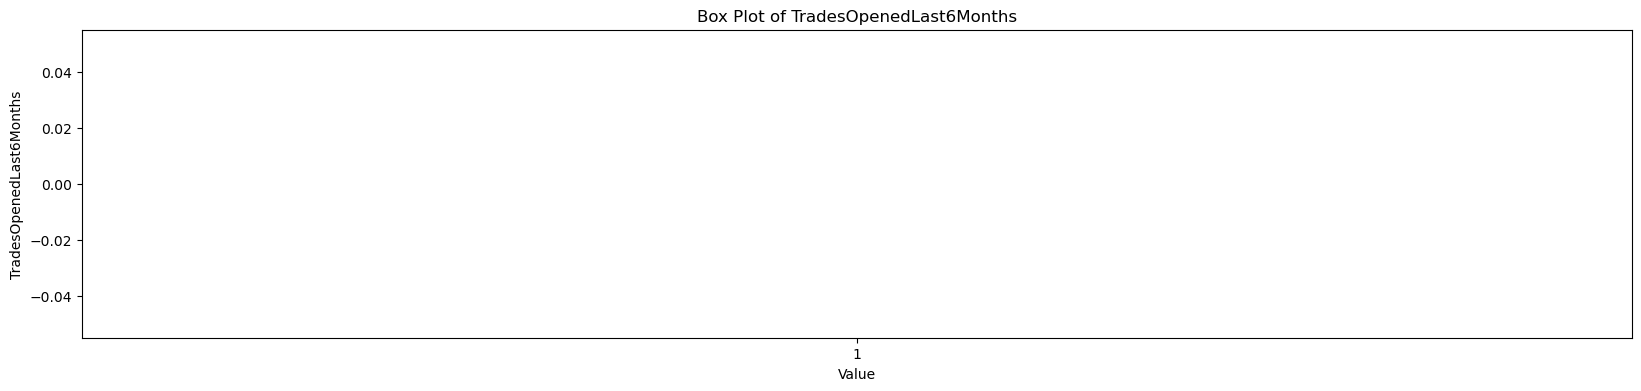

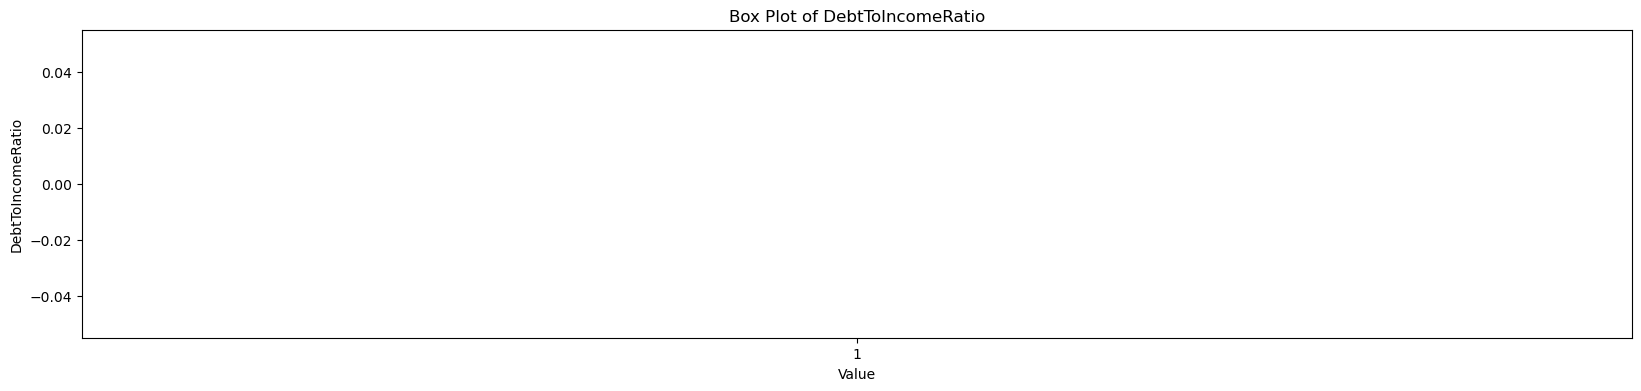

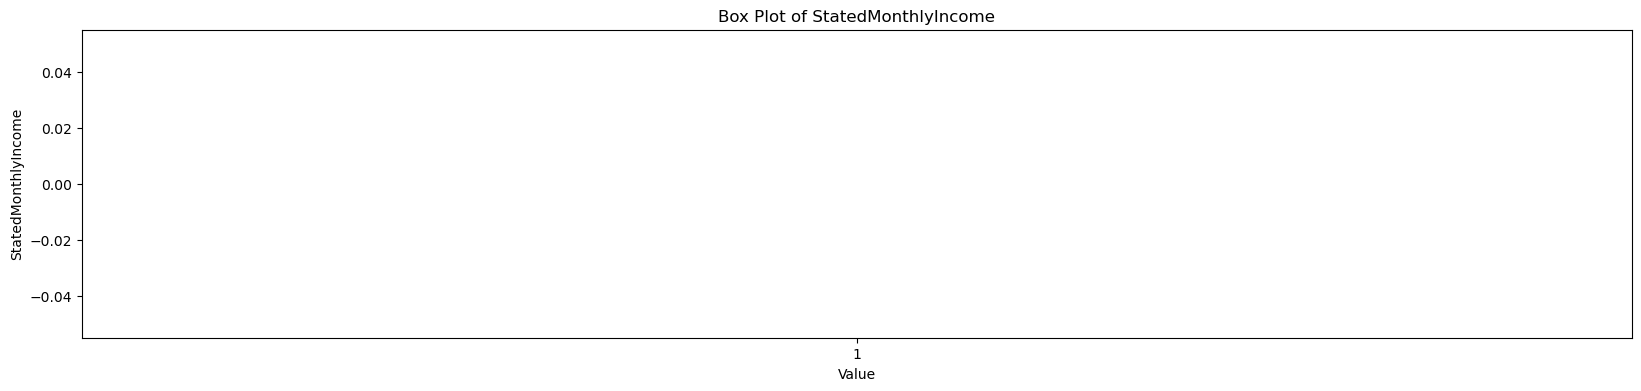

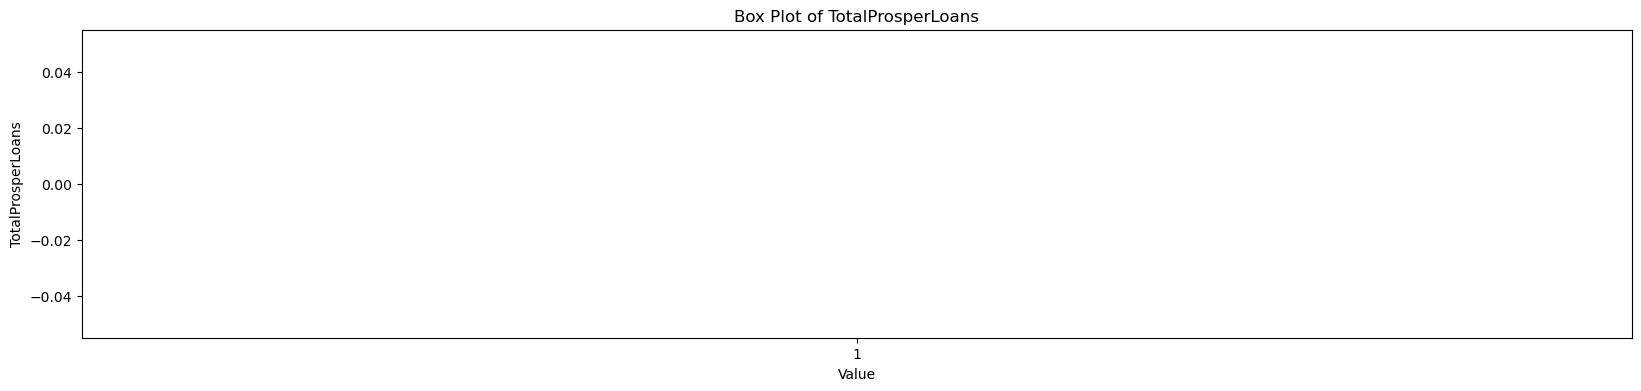

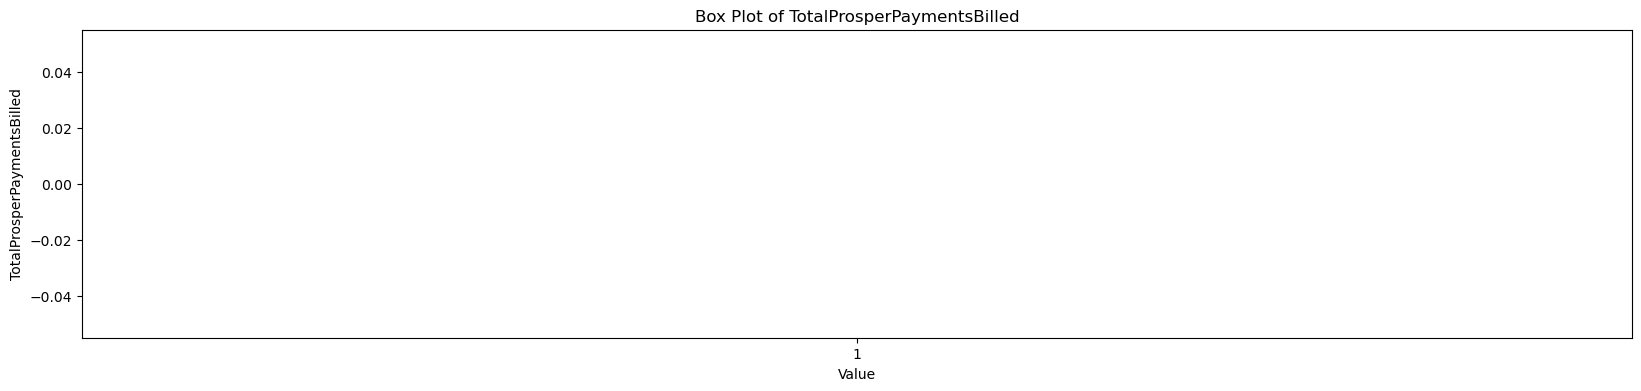

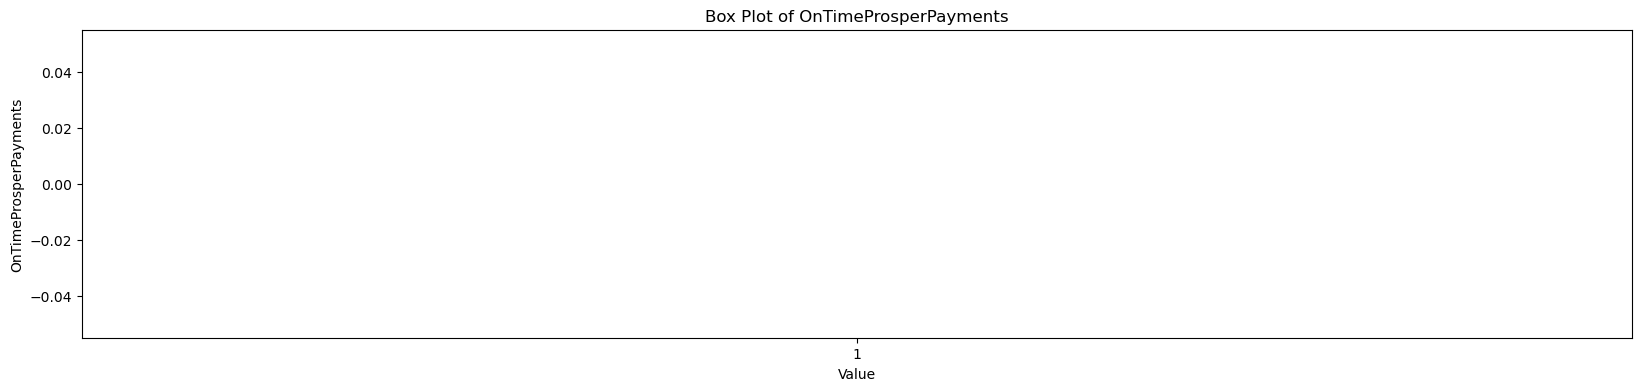

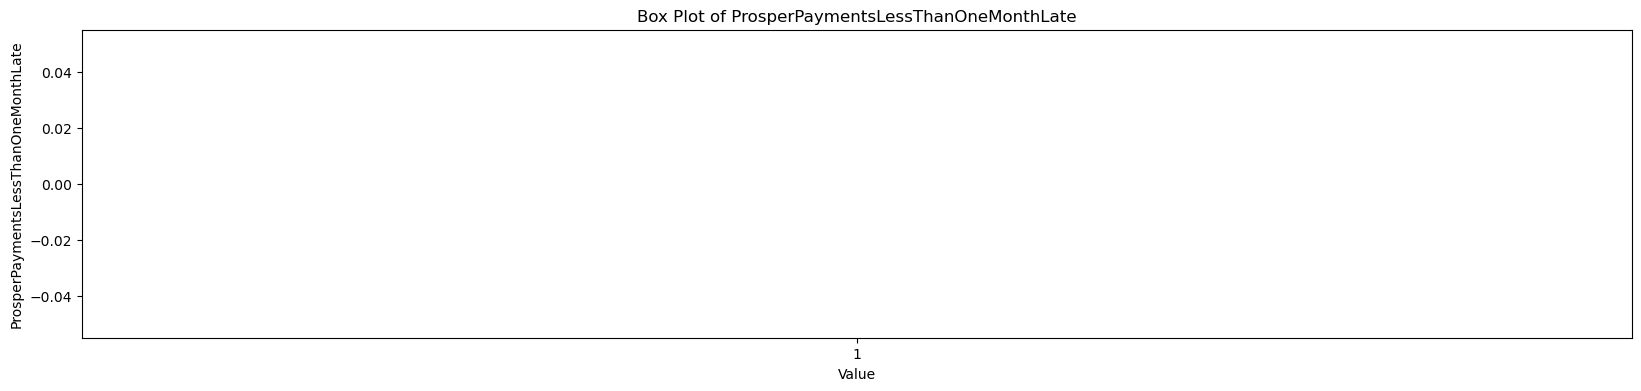

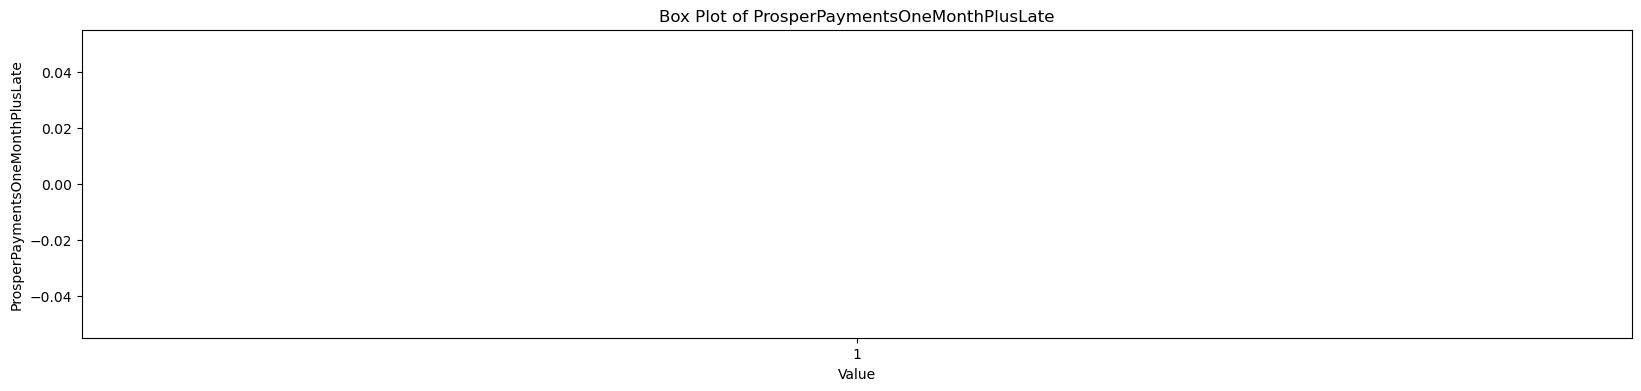

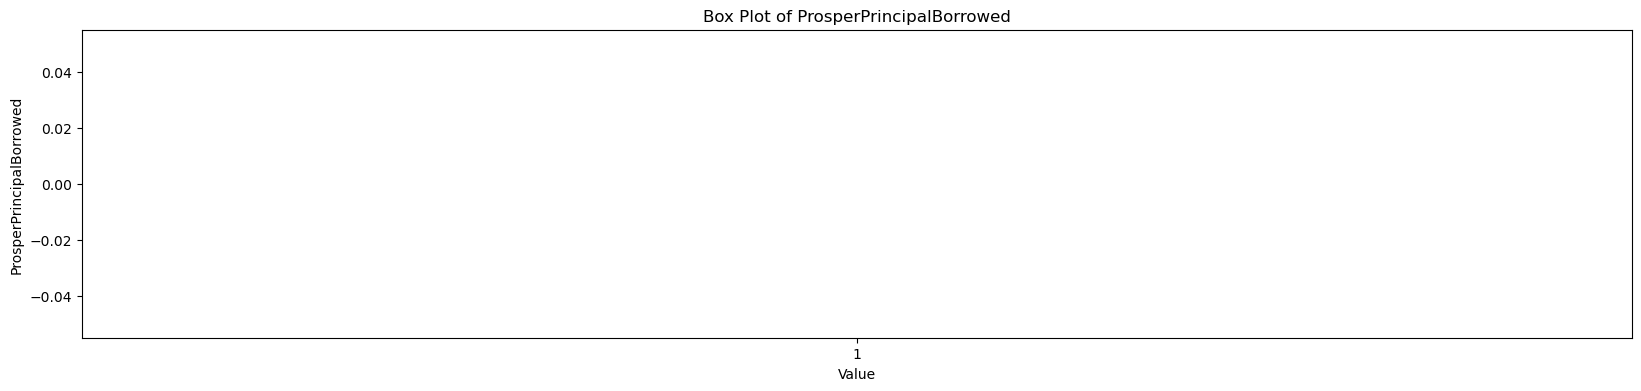

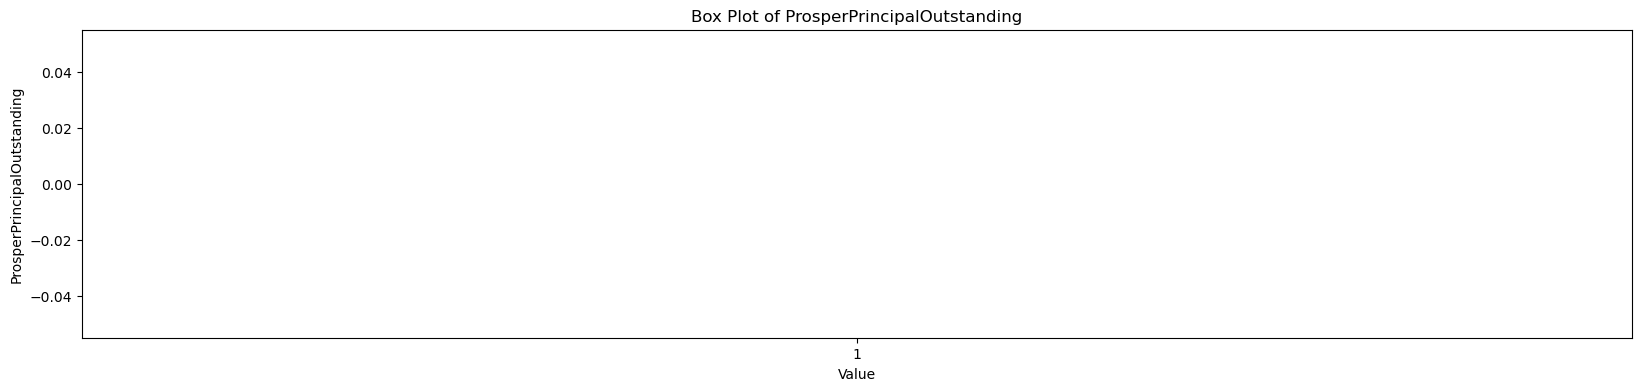

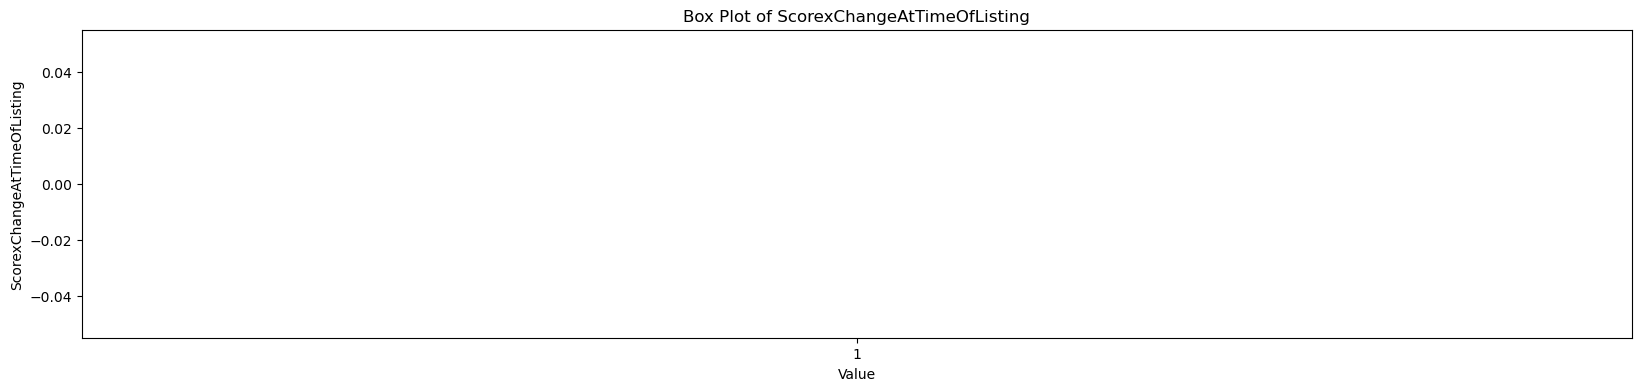

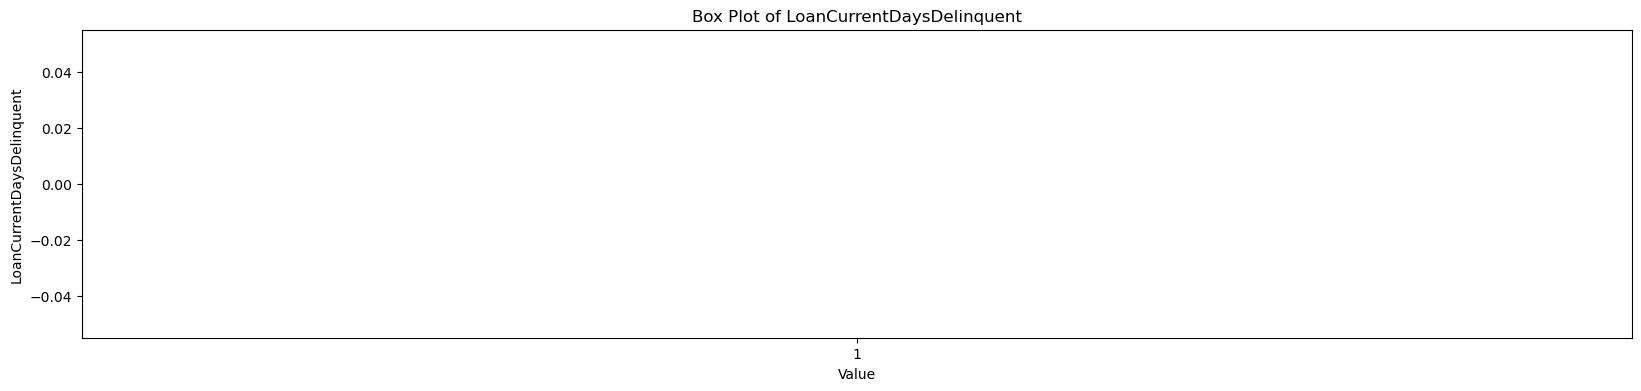

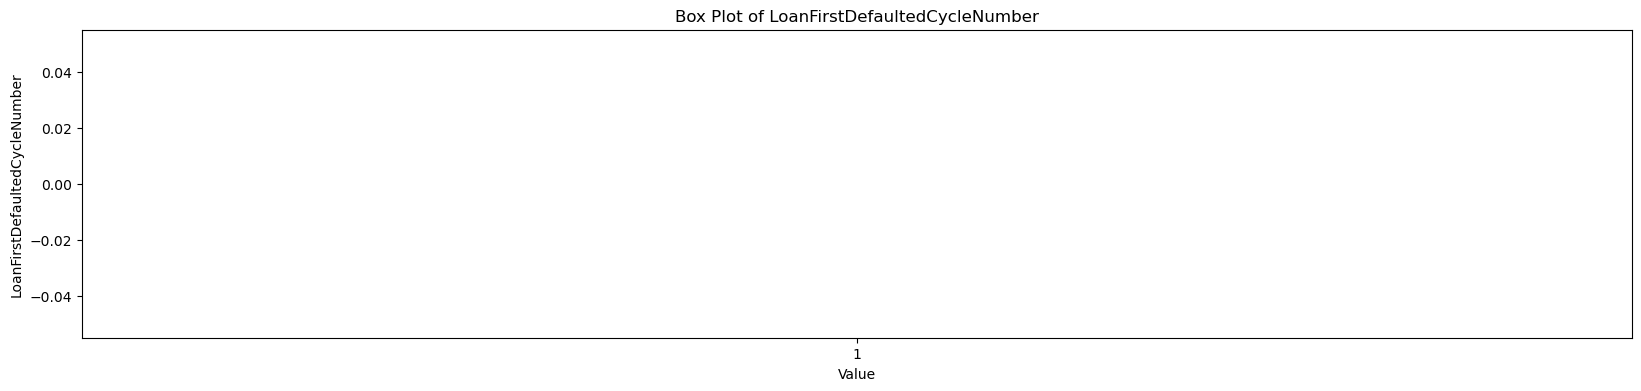

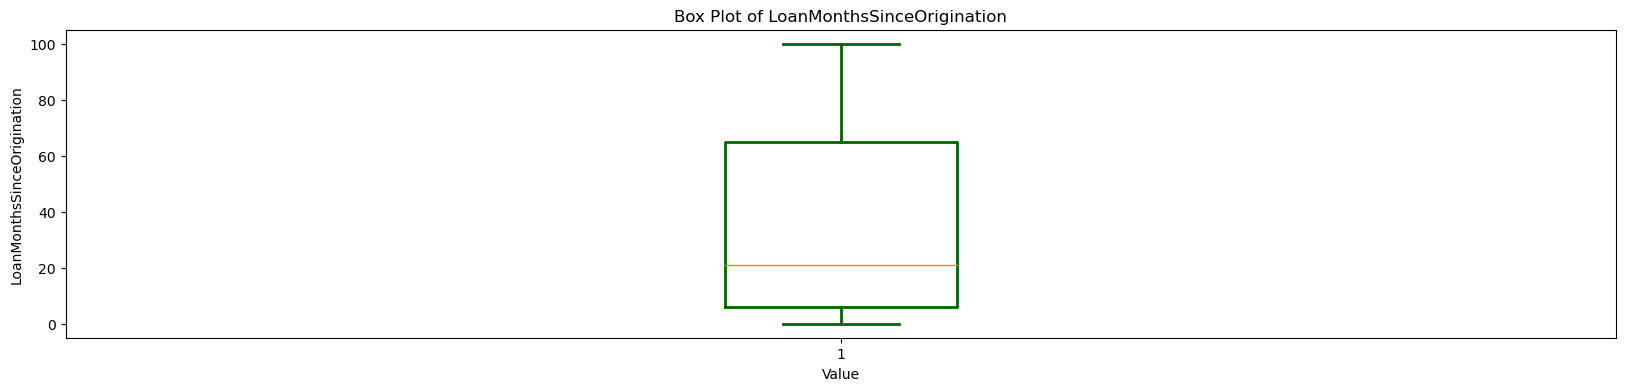

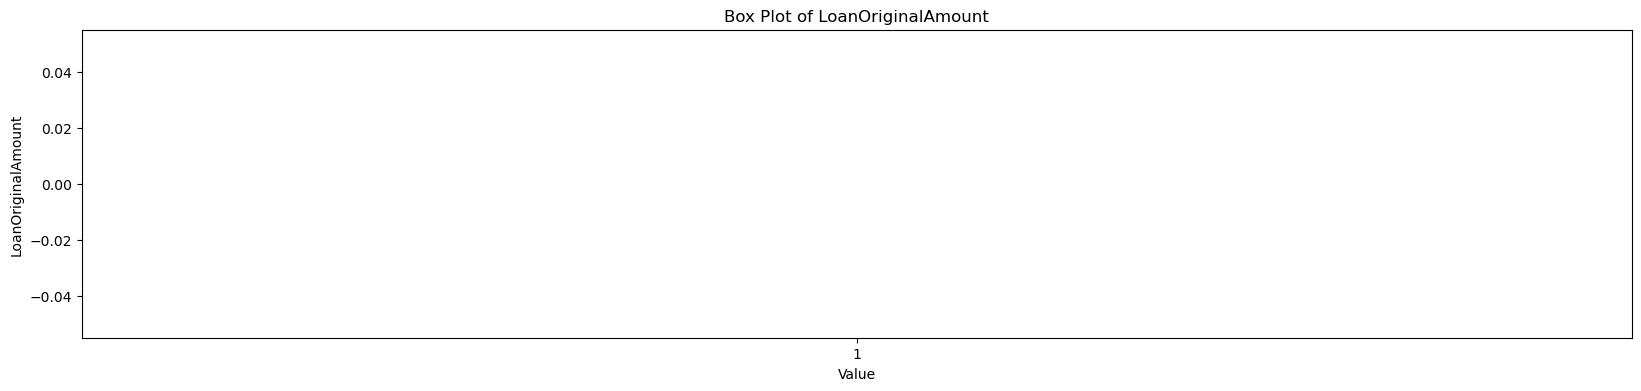

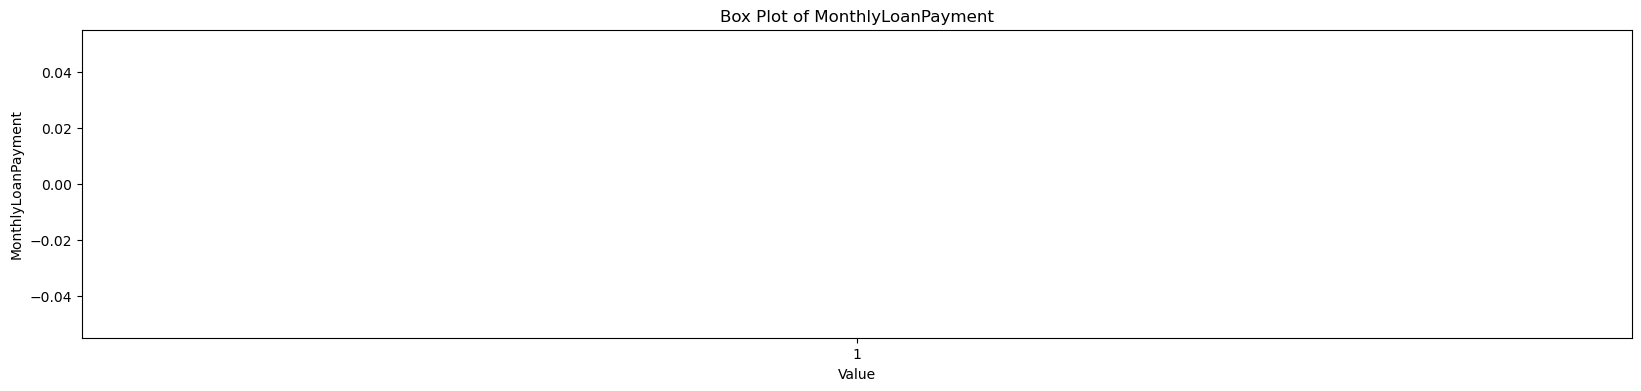

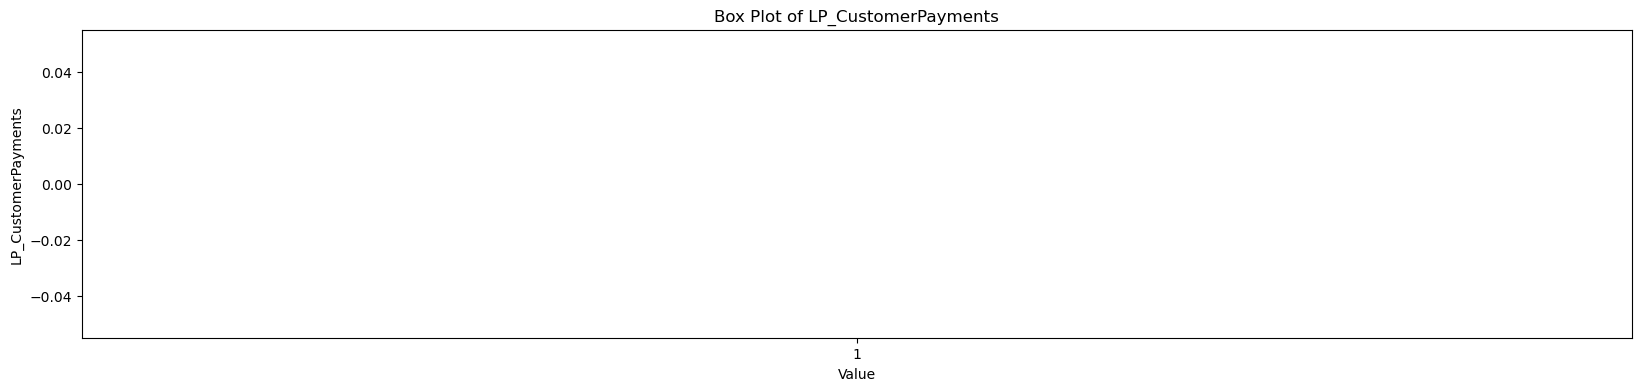

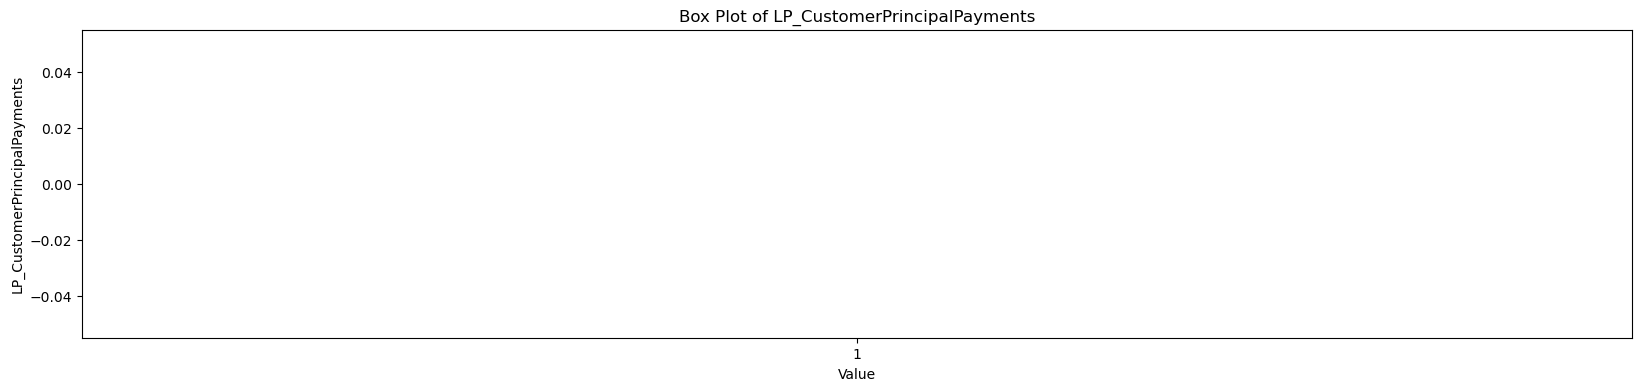

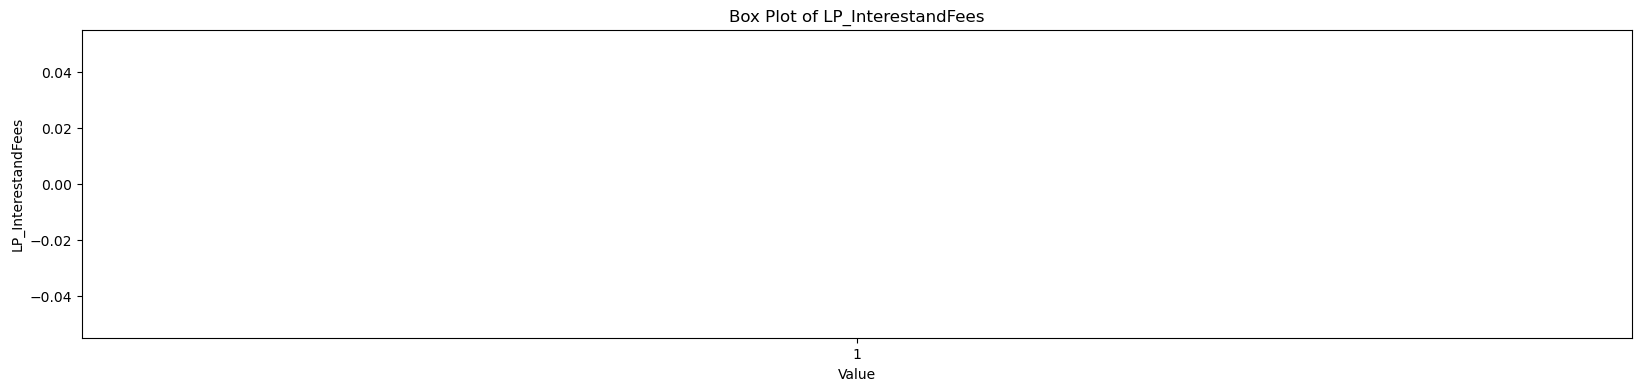

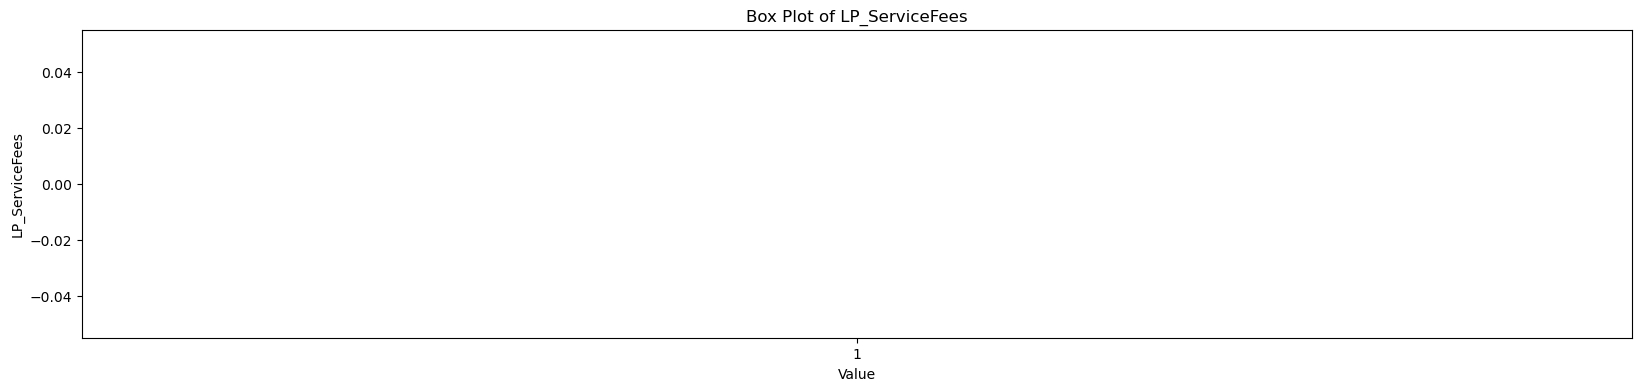

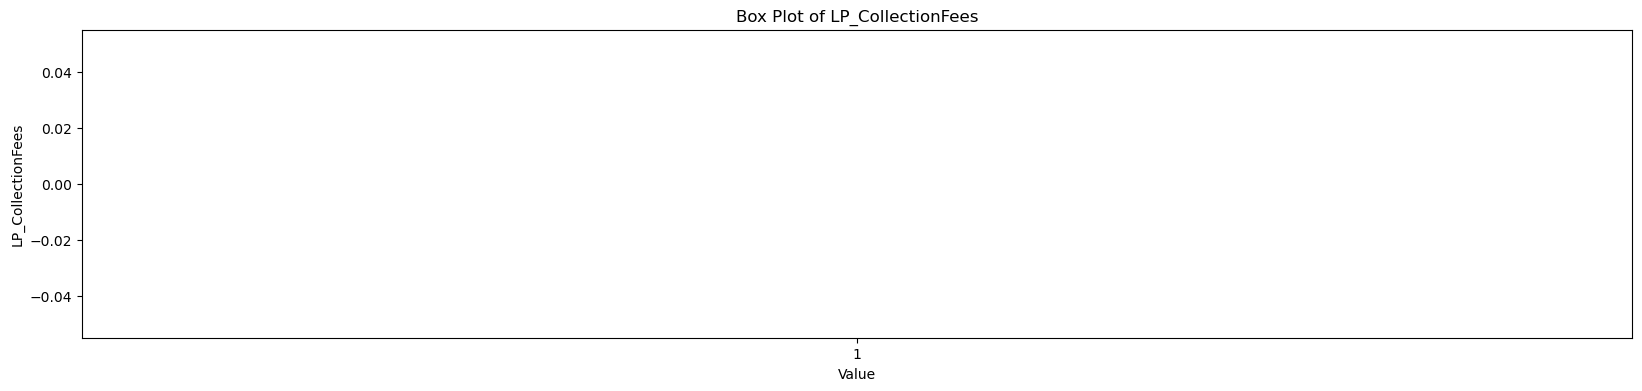

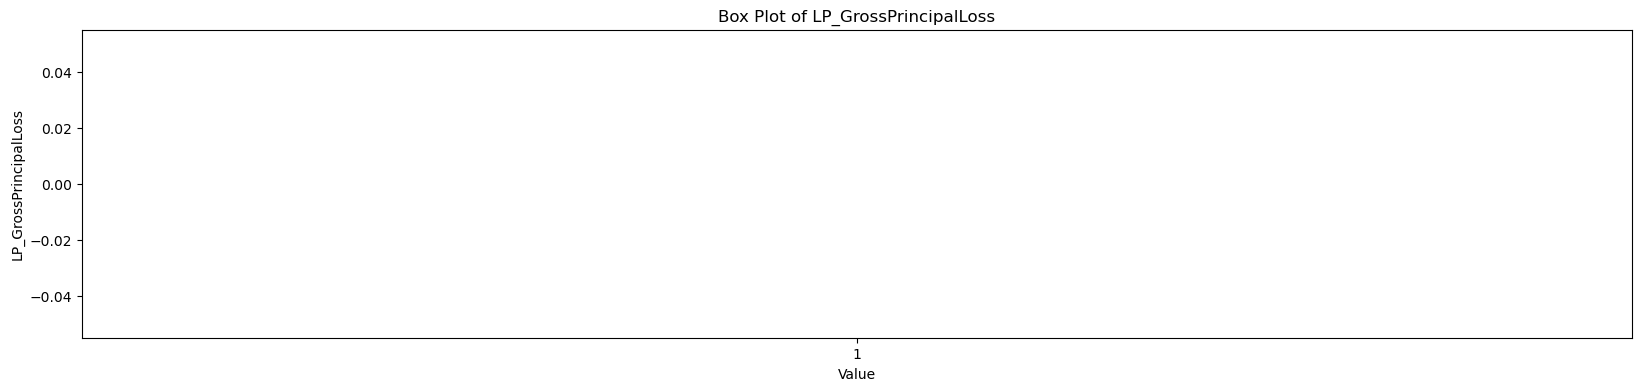

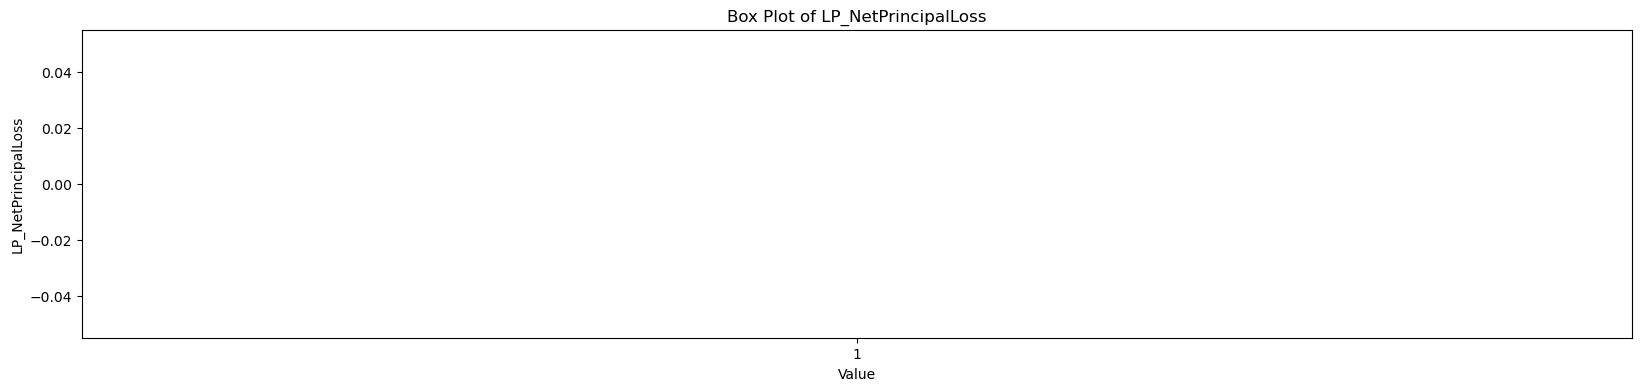

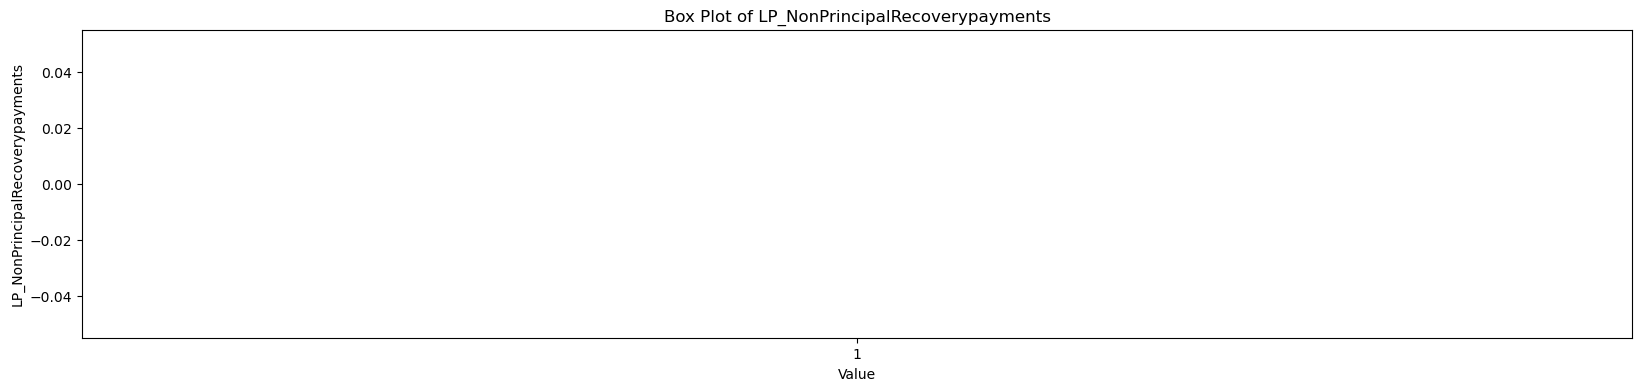

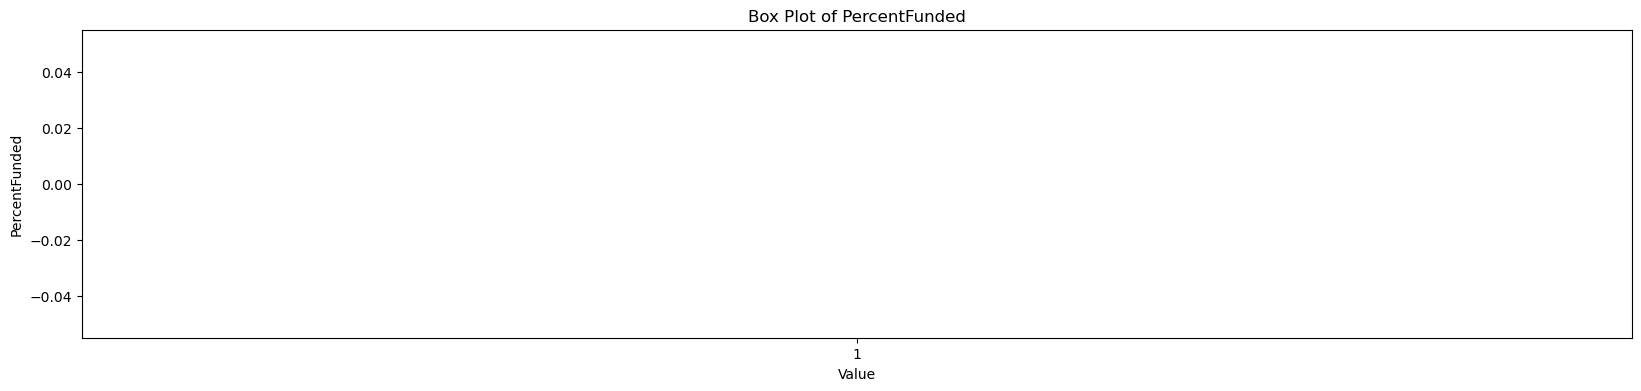

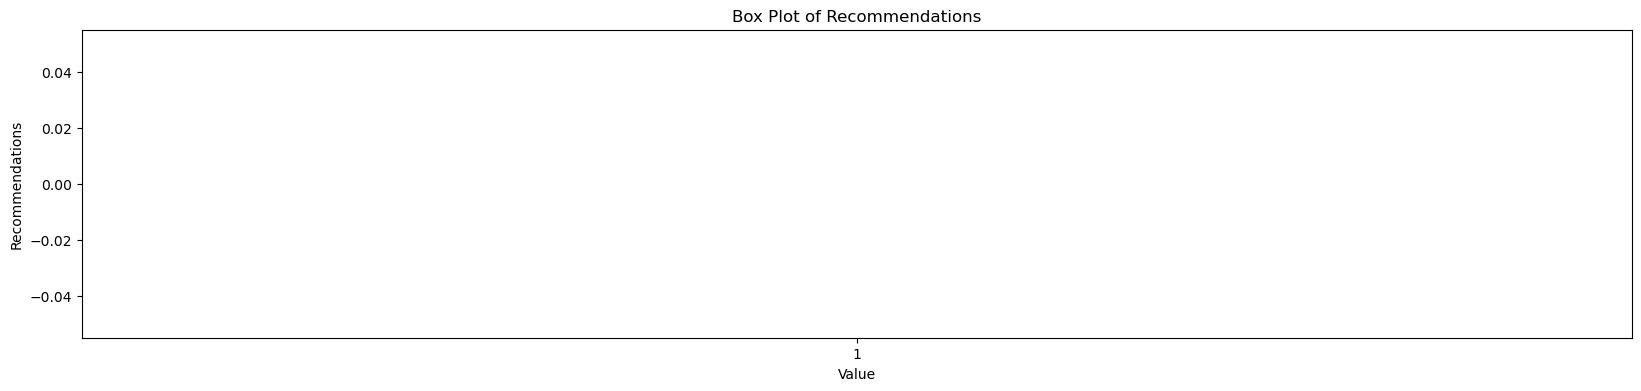

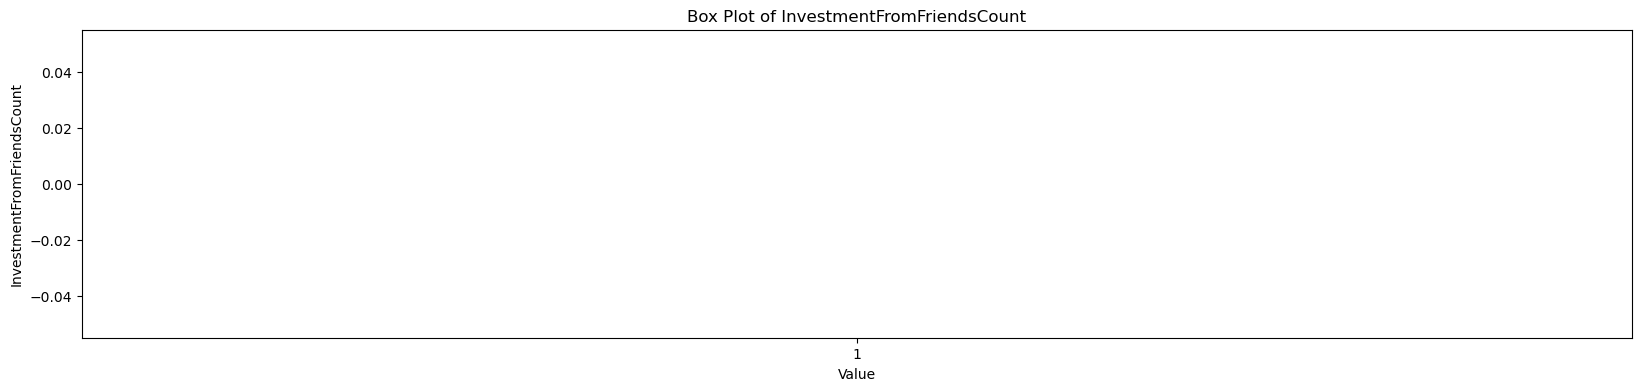

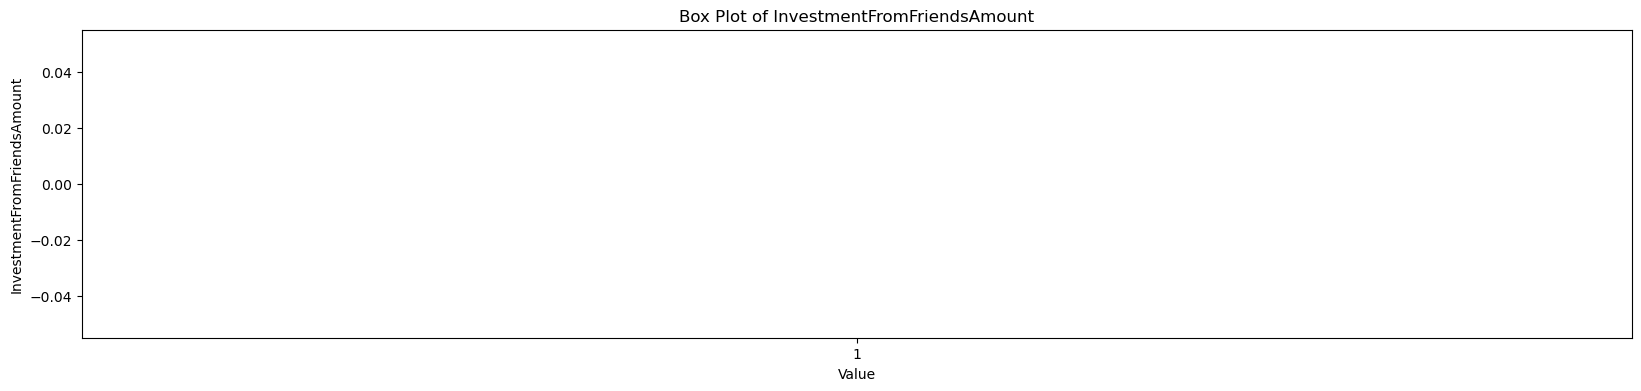

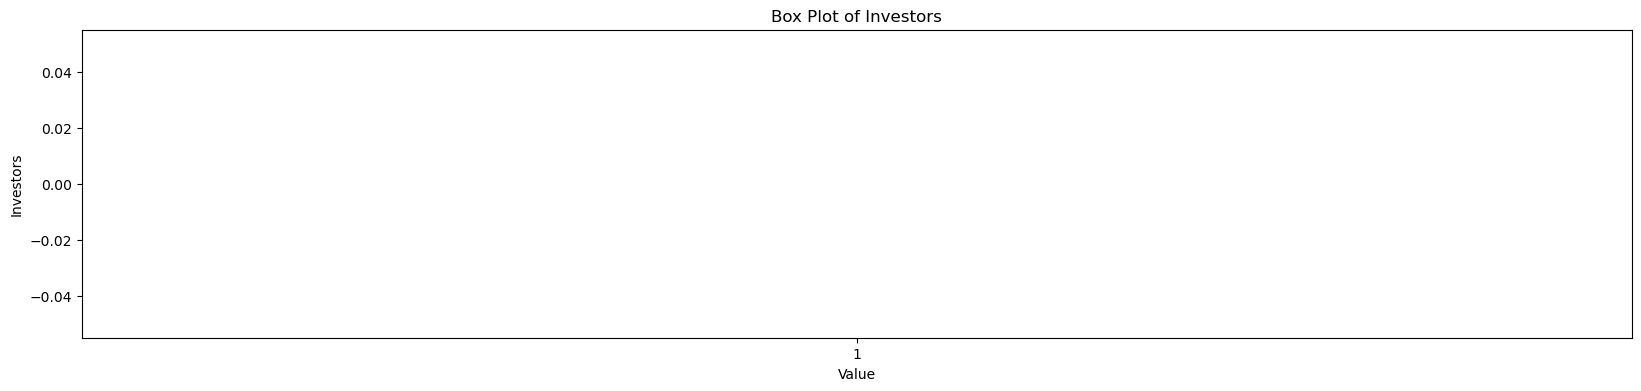

In [25]:
# Again creating the custom design for boxplots 
boxprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen' )
whiskerprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen')
capprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen')
flierprops = dict(marker = 'o', markersize = 5, markerfacecolor = 'darkgreen', markeredgecolor = 'darkblue')

# Creating boxplots for all oultliers cleaned columns
for column in cleaned_cols:
    fig, ax = plt.subplots(figsize = (20, 4))
    ax.boxplot(cleaned_cols[column], boxprops = boxprops, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel(column)
    plt.show()

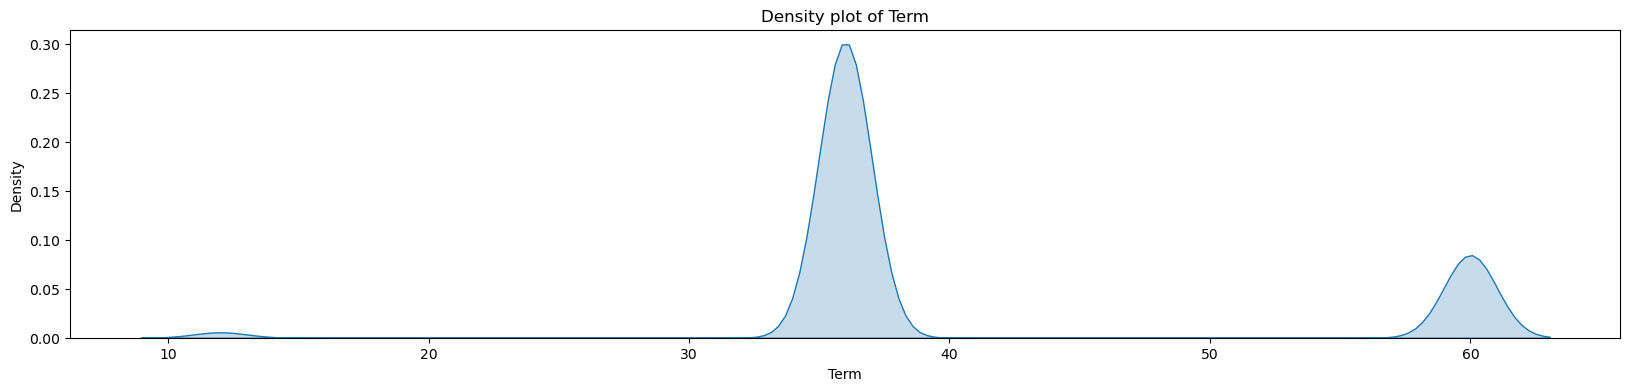

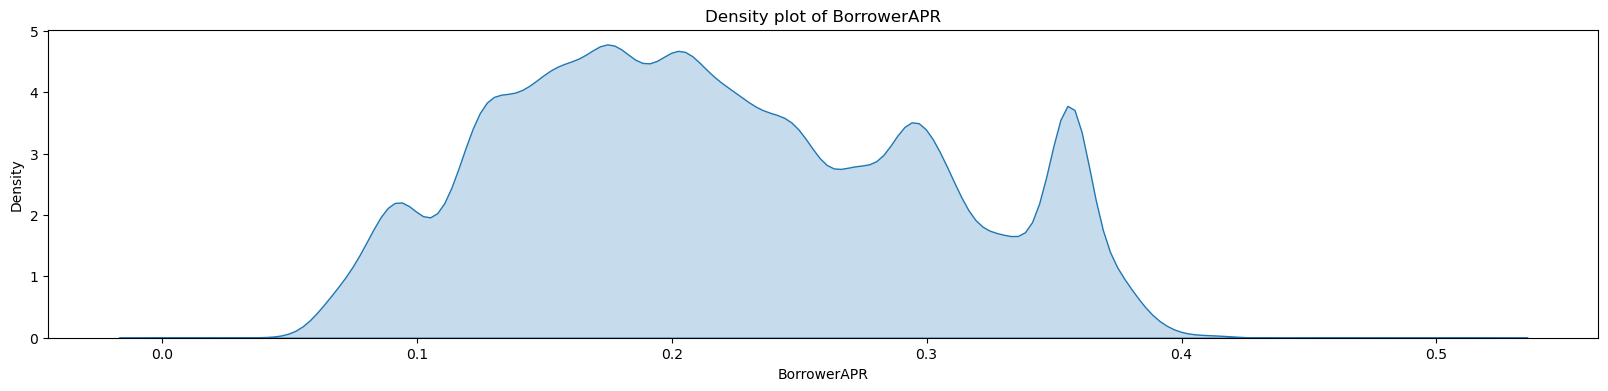

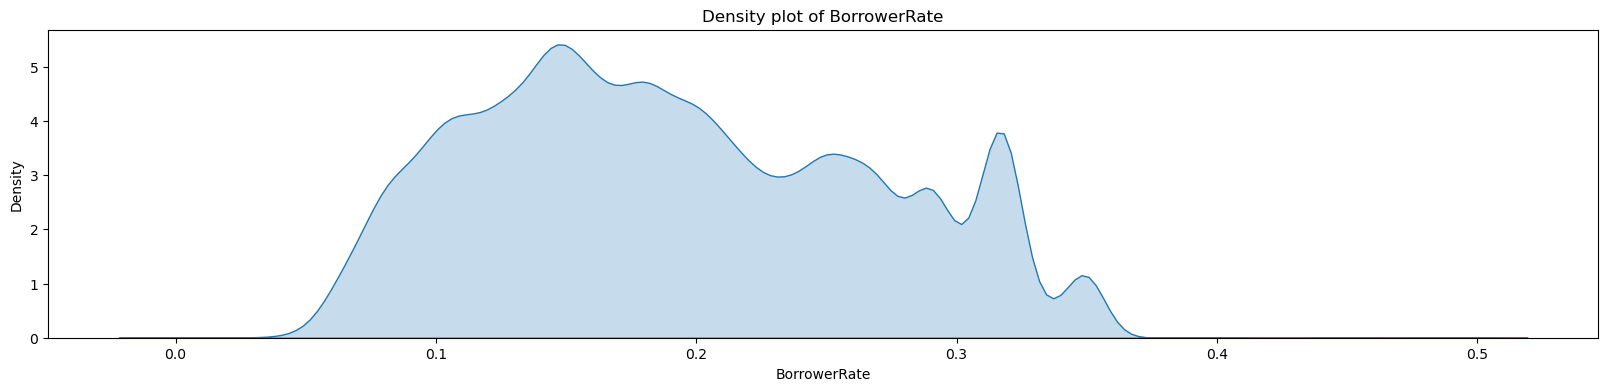

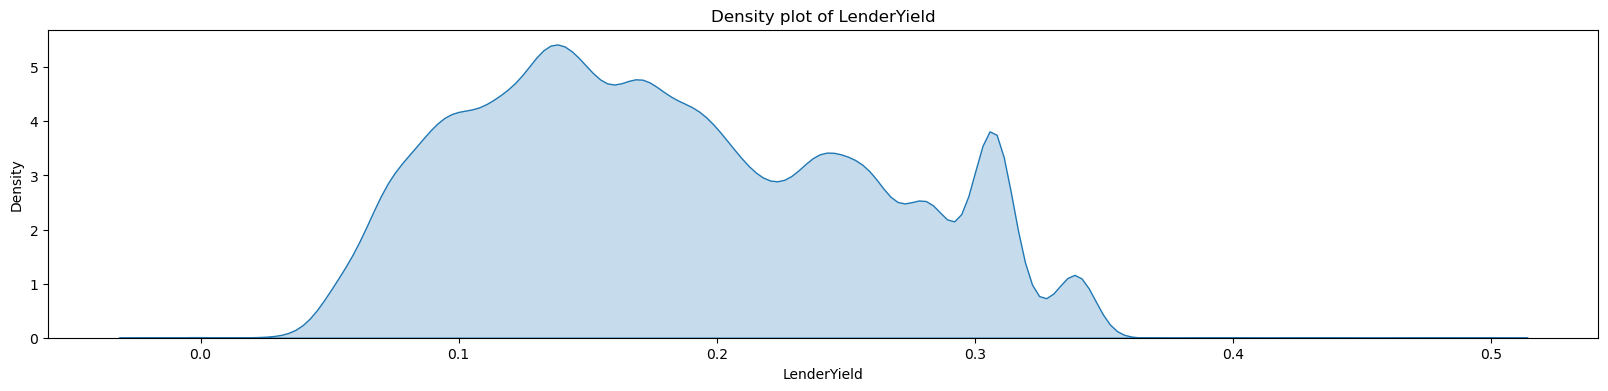

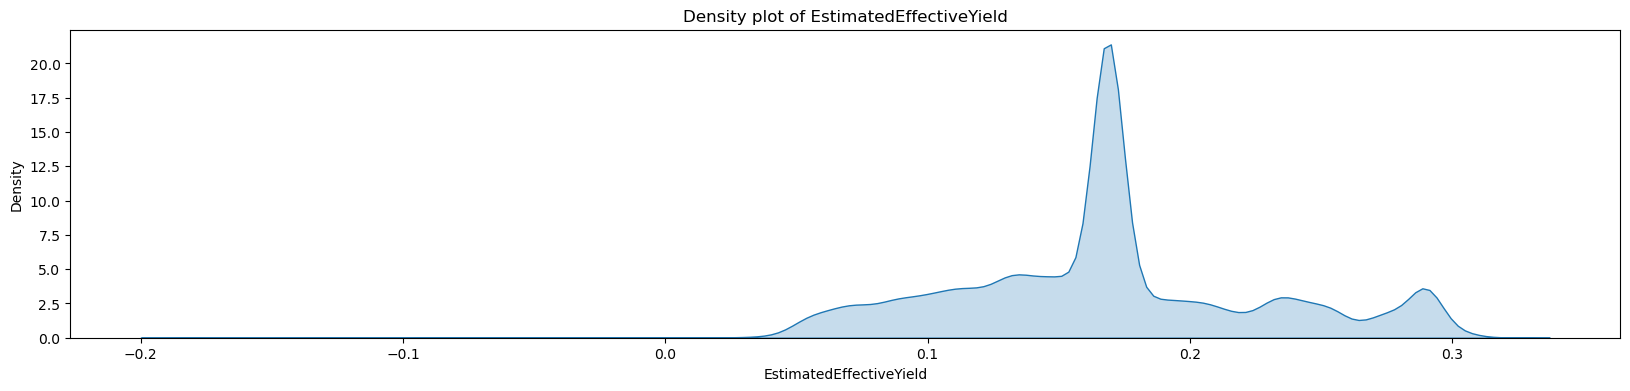

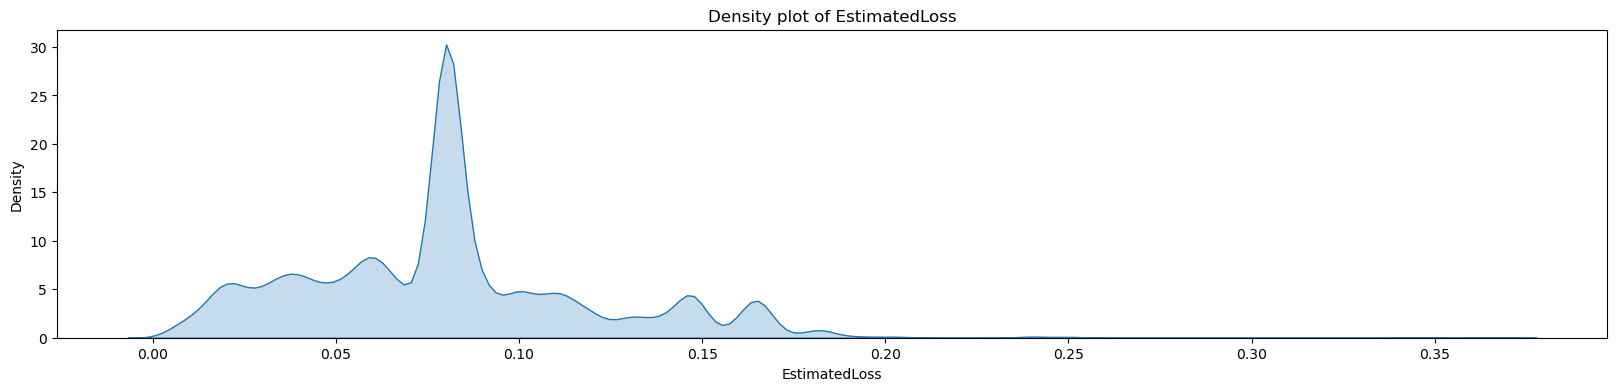

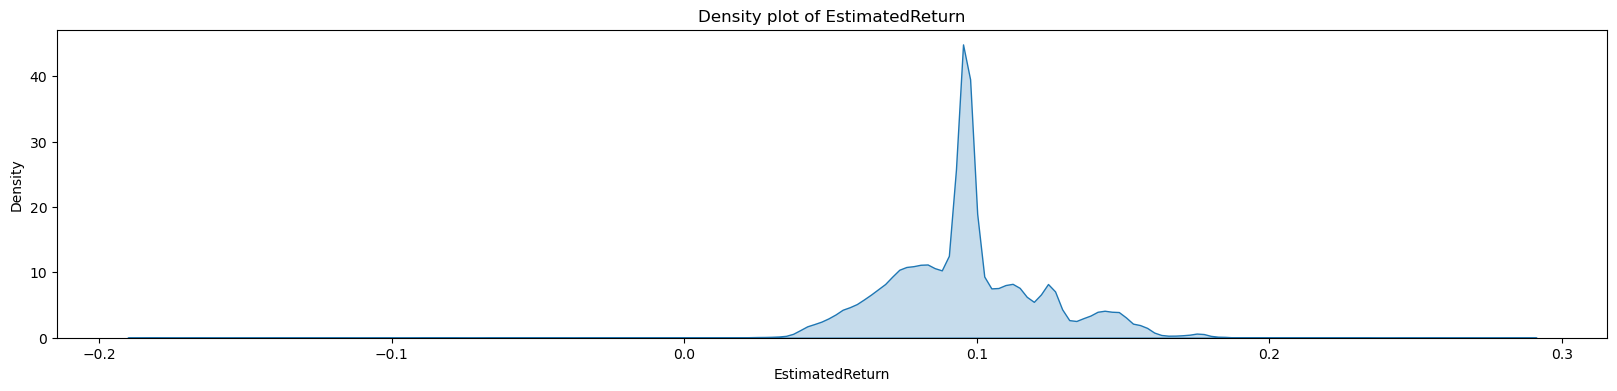

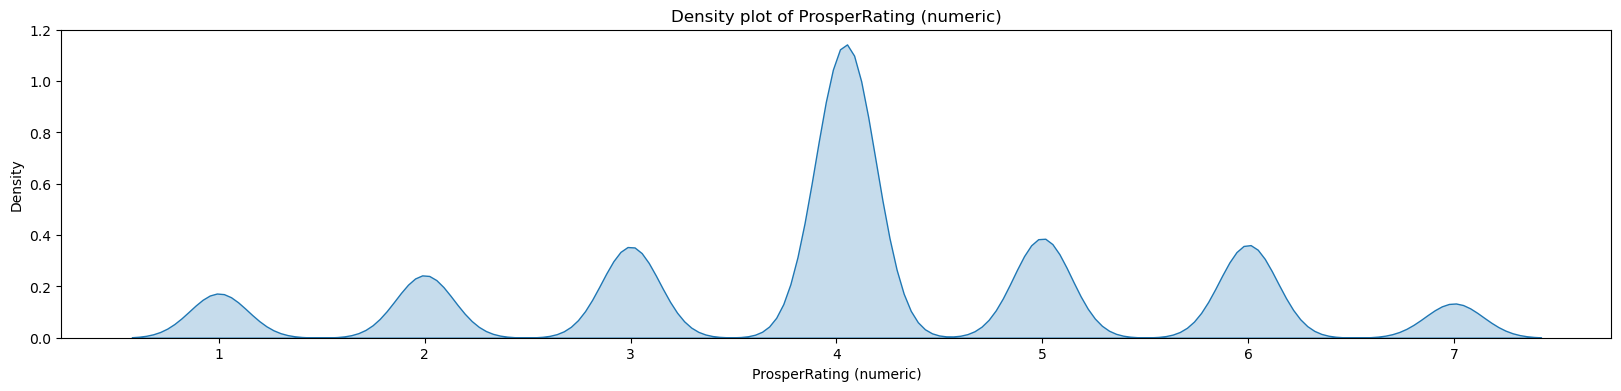

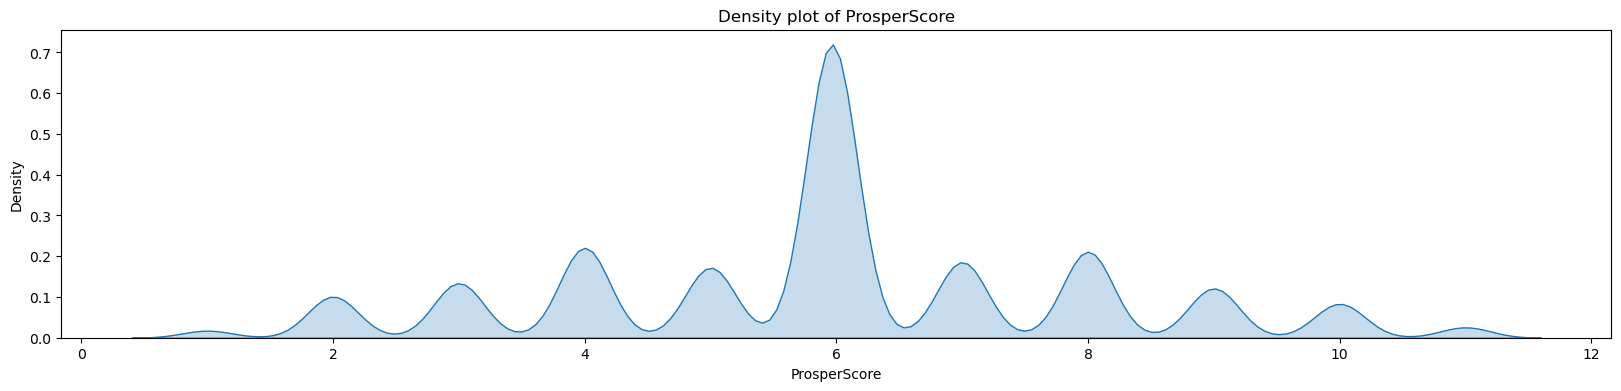

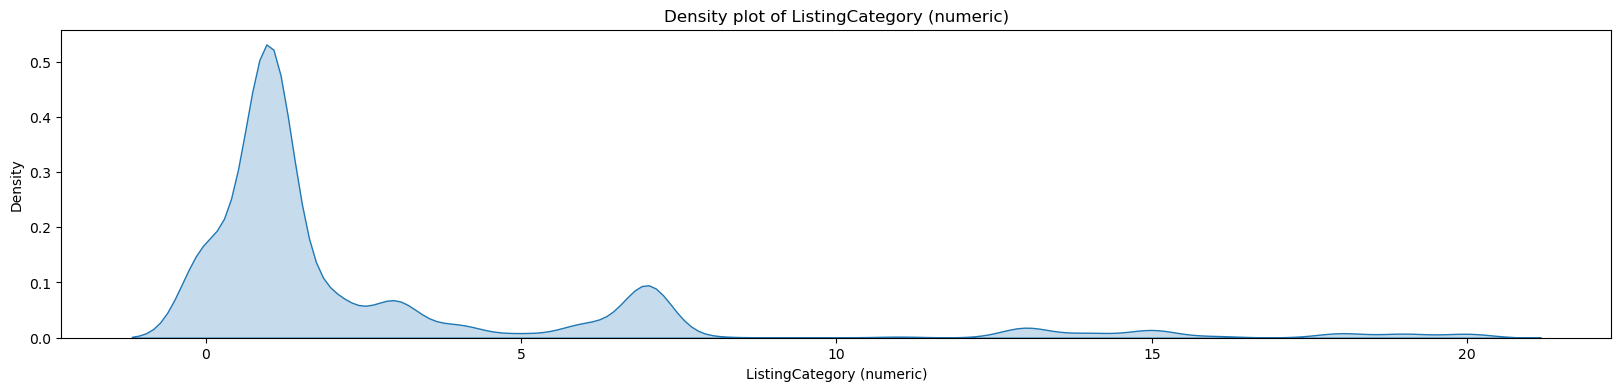

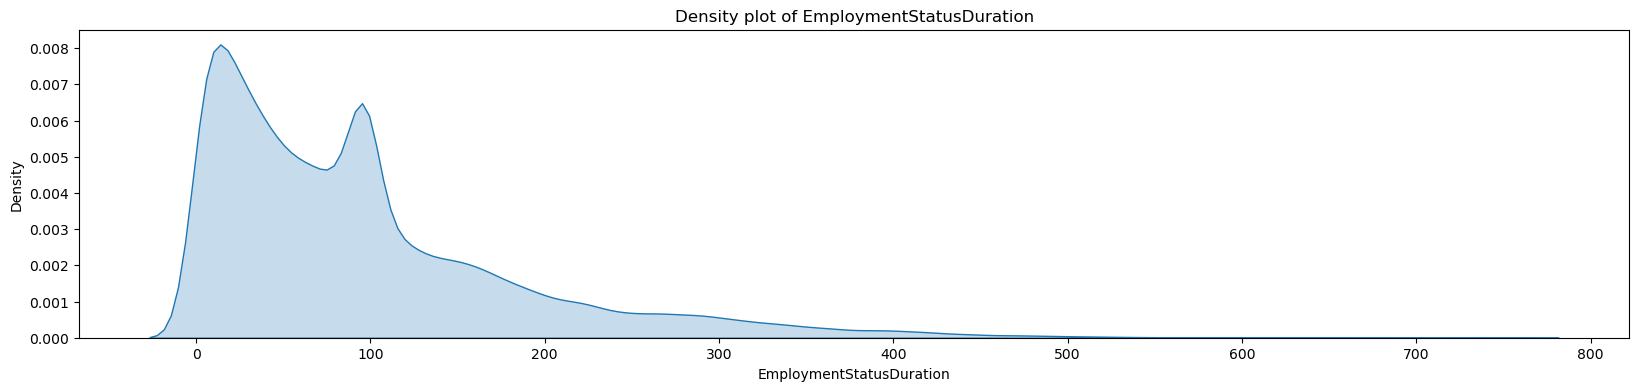

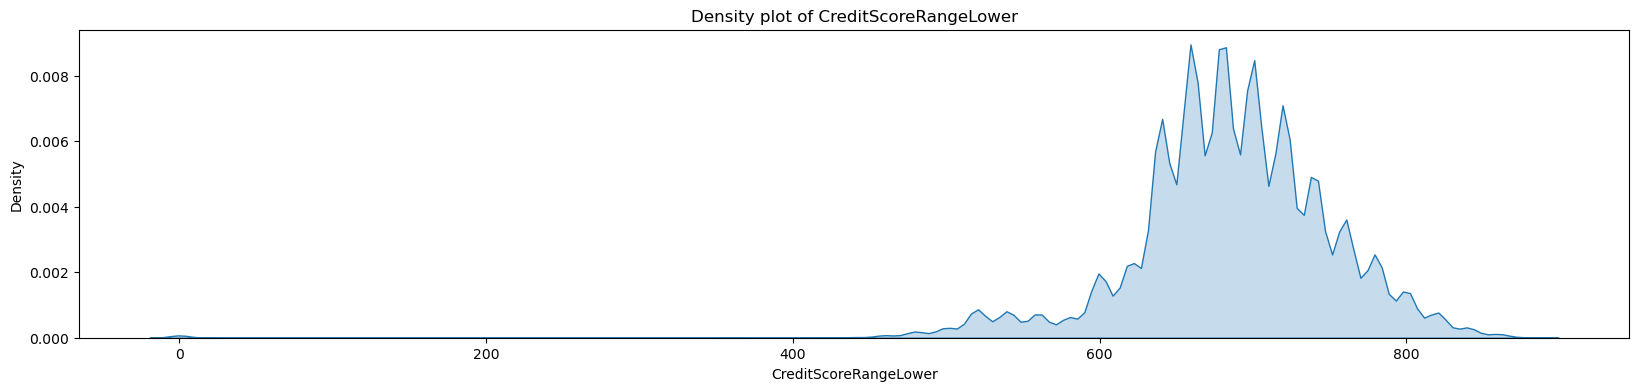

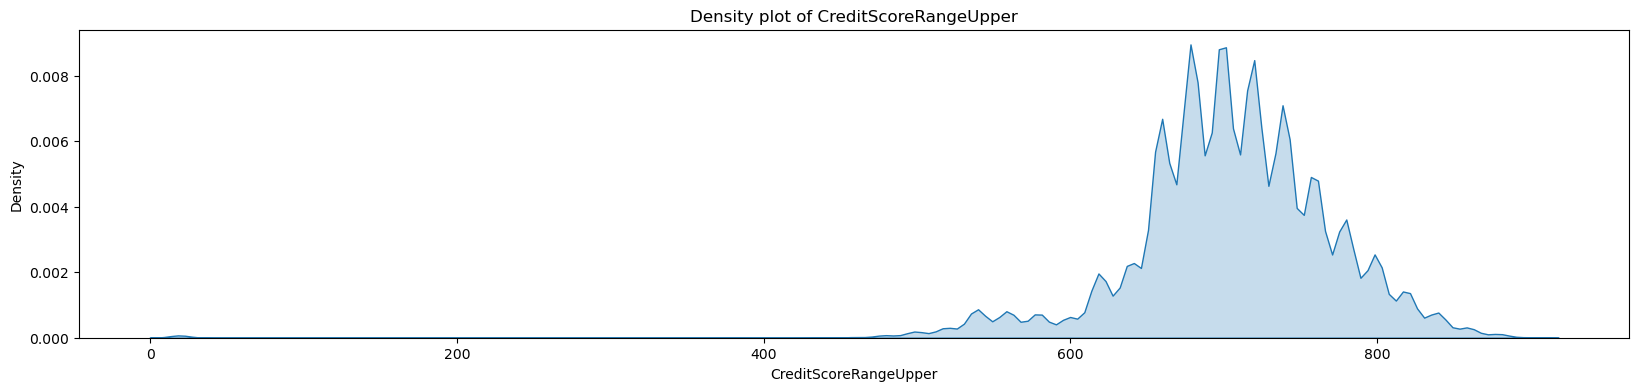

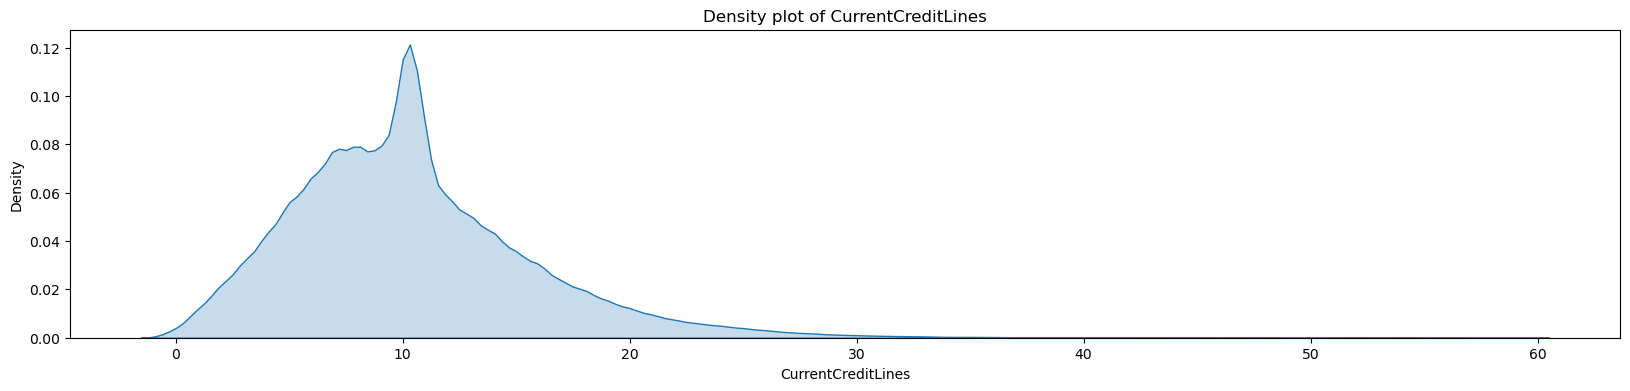

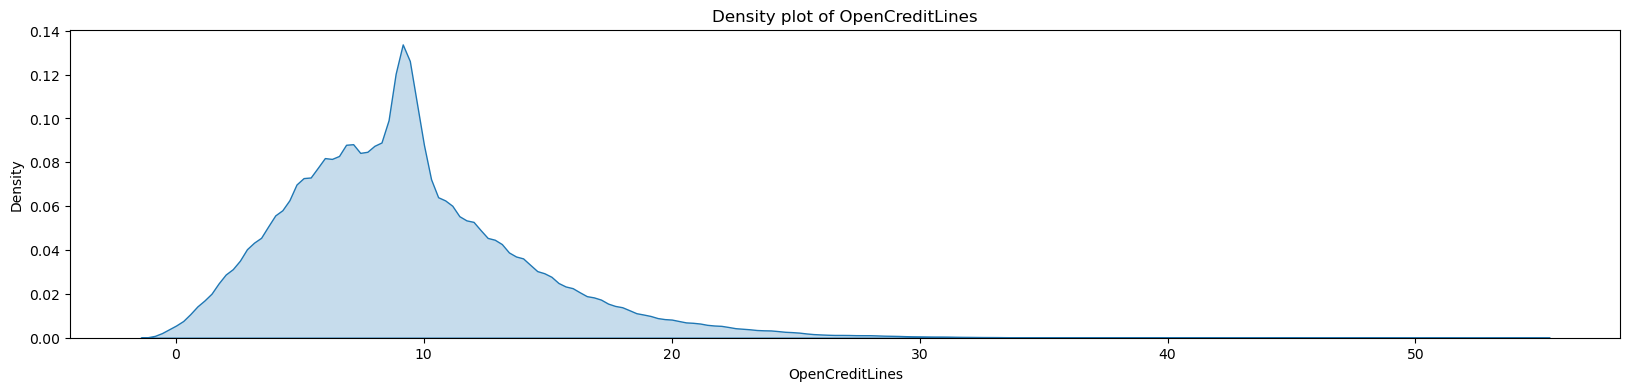

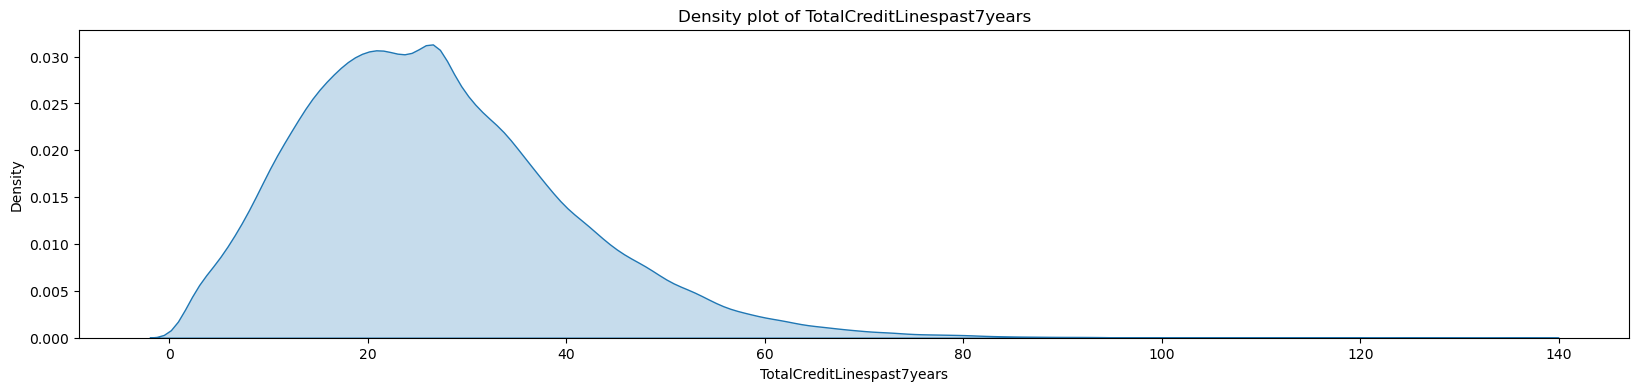

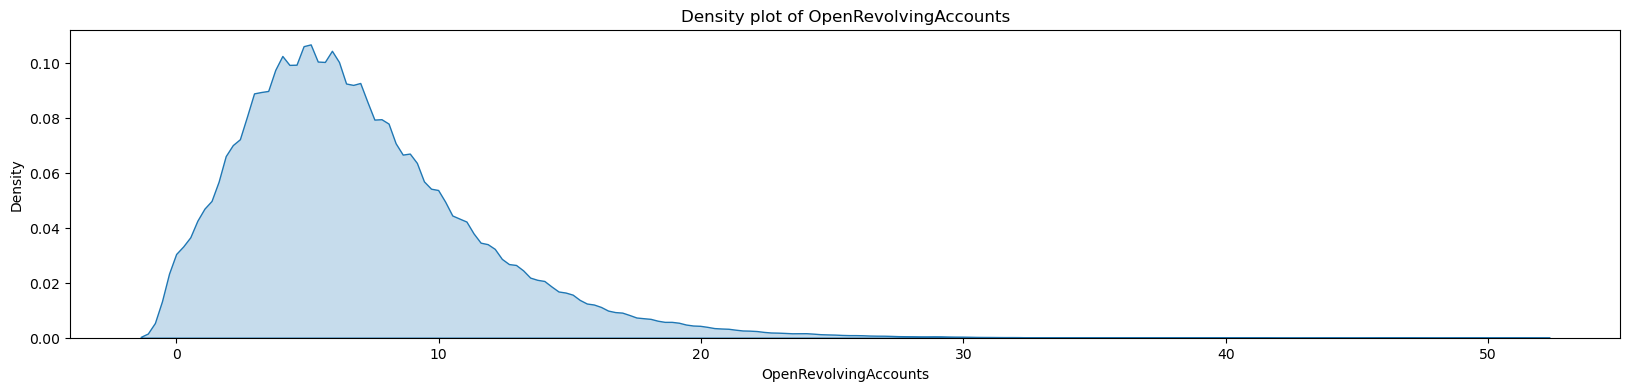

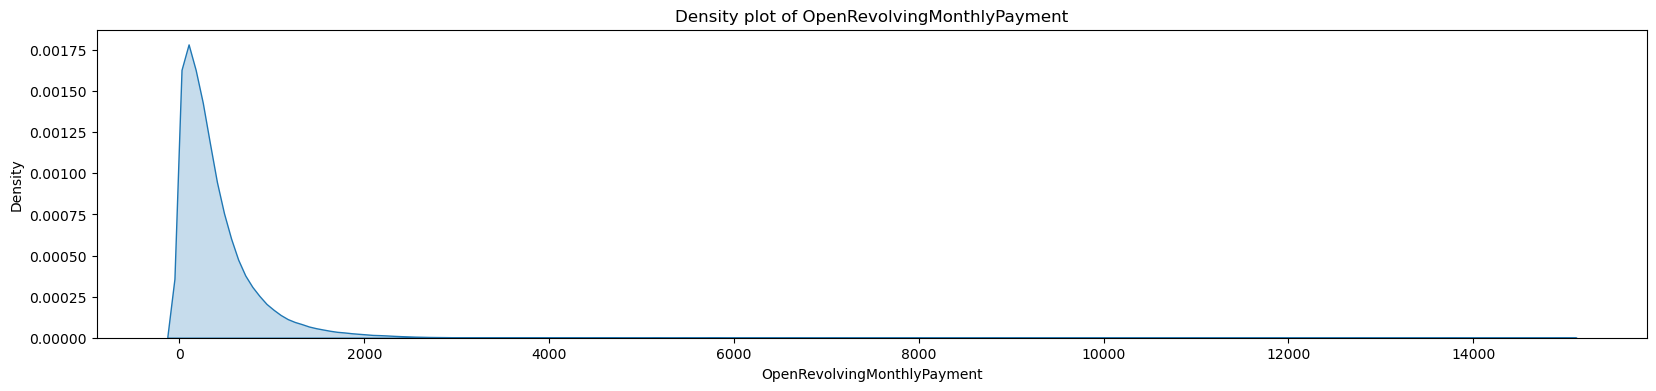

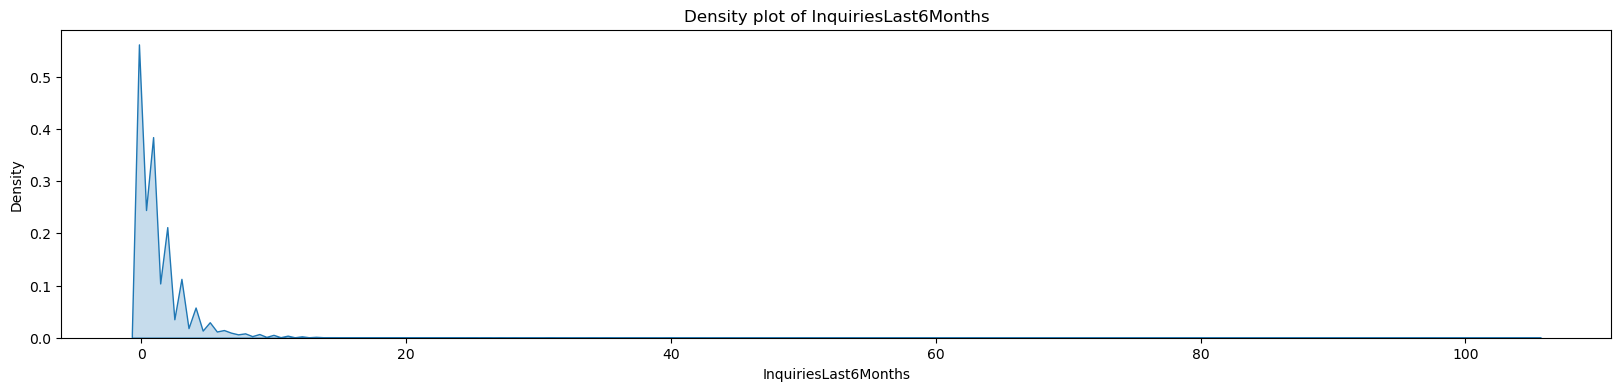

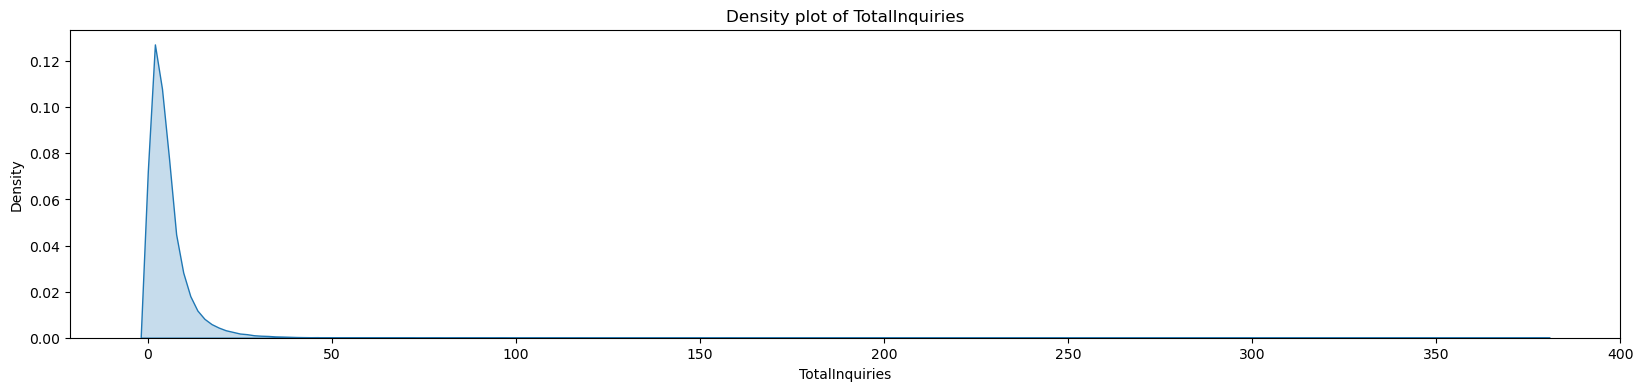

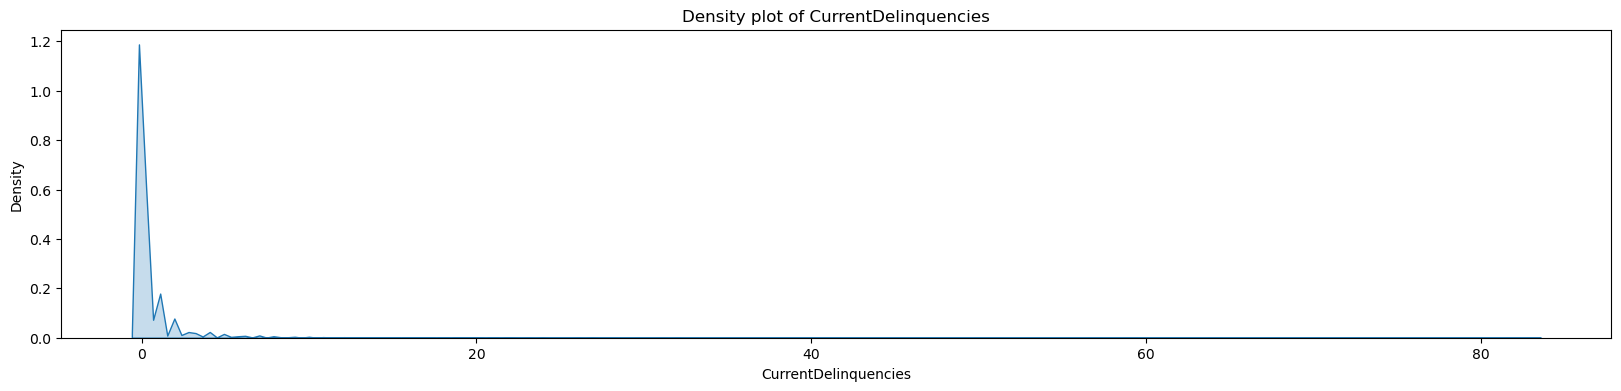

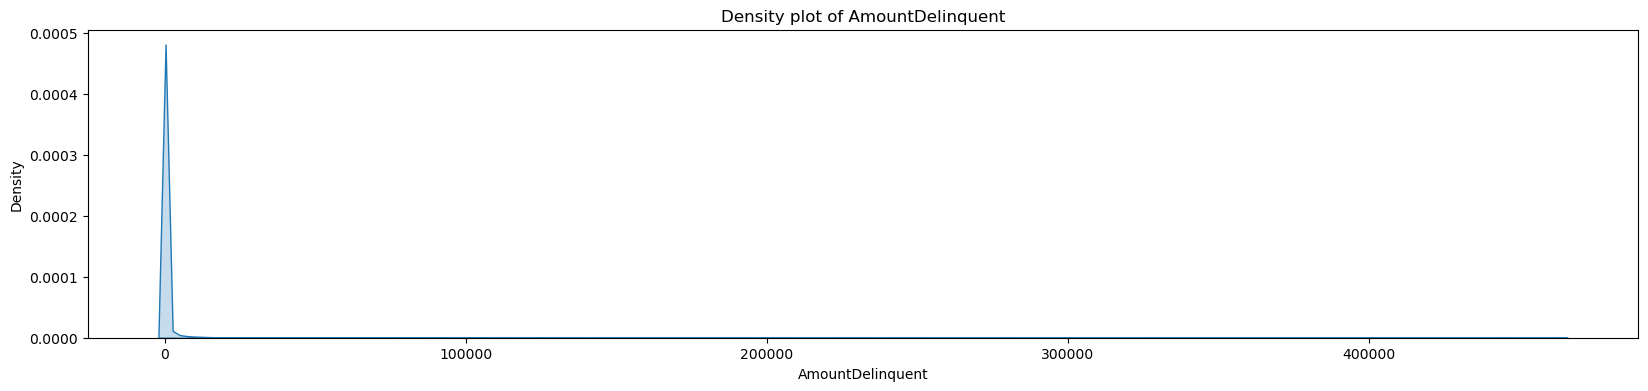

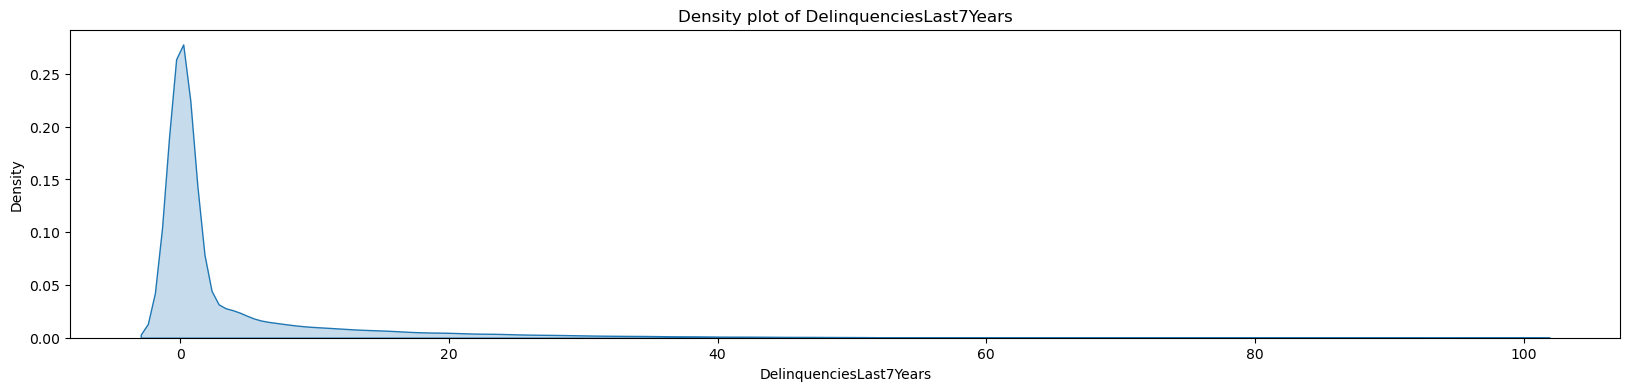

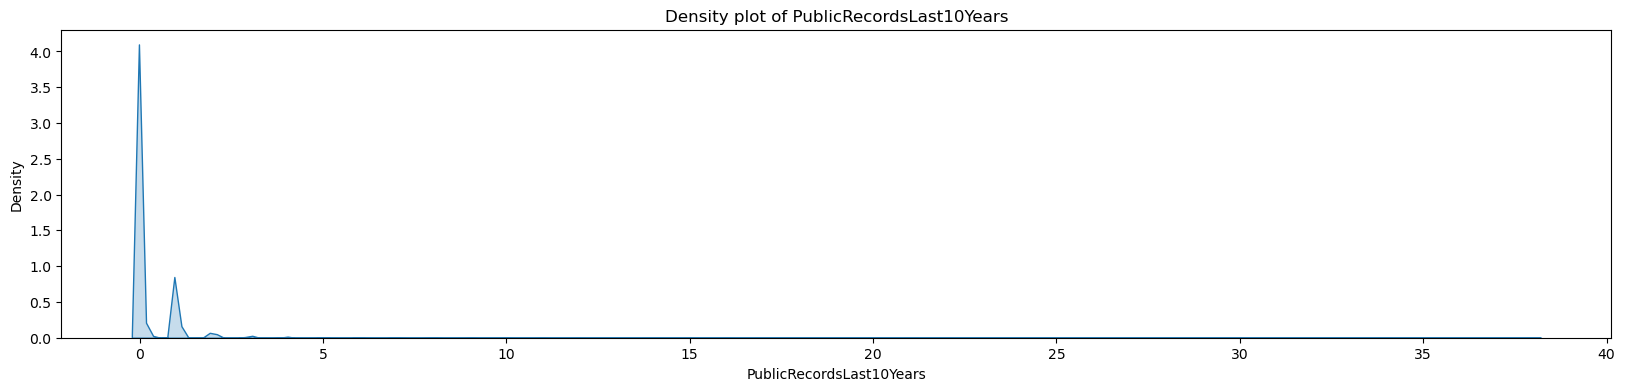

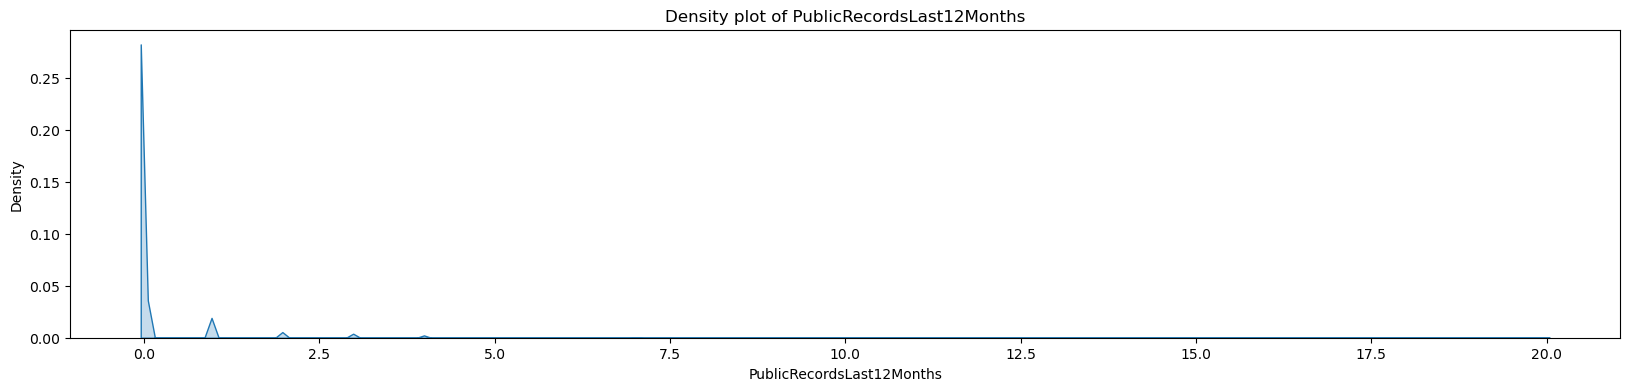

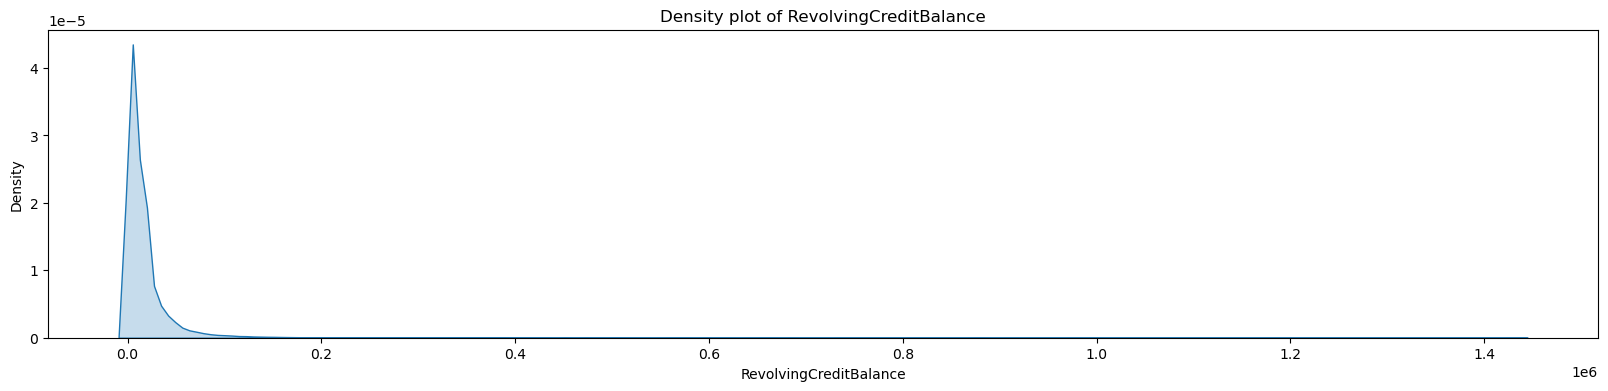

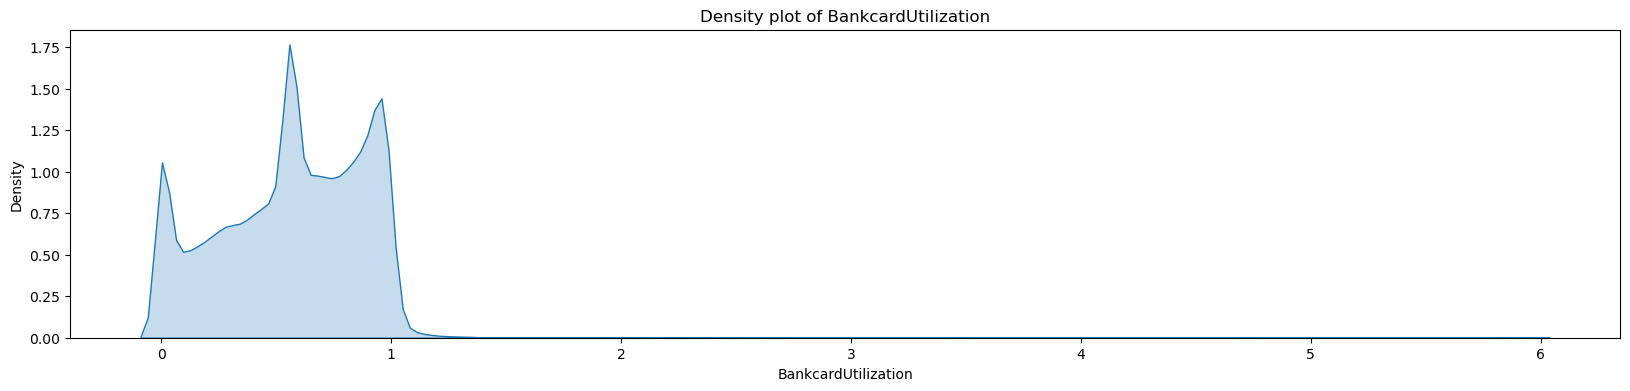

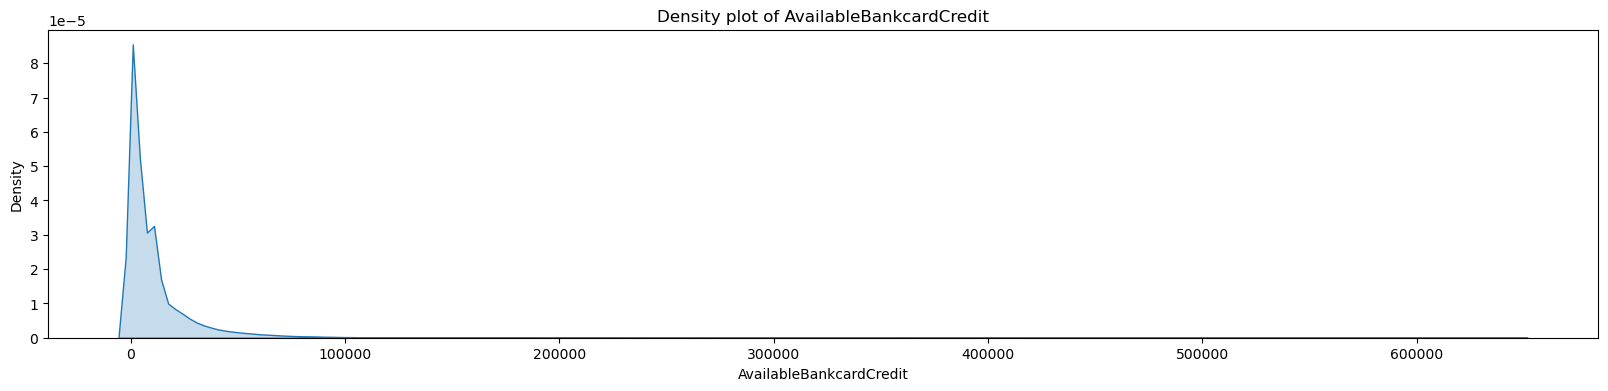

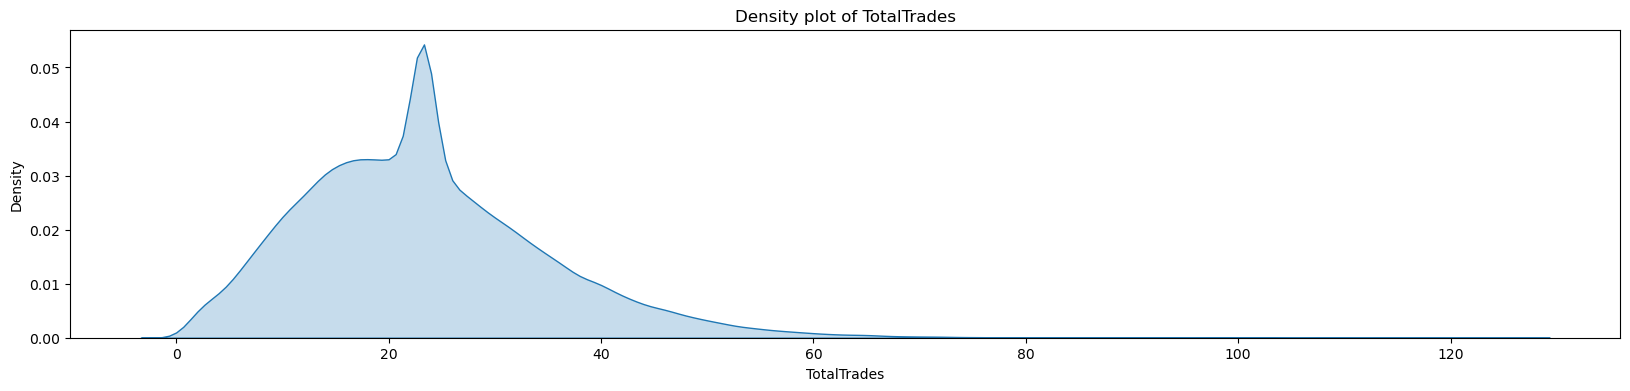

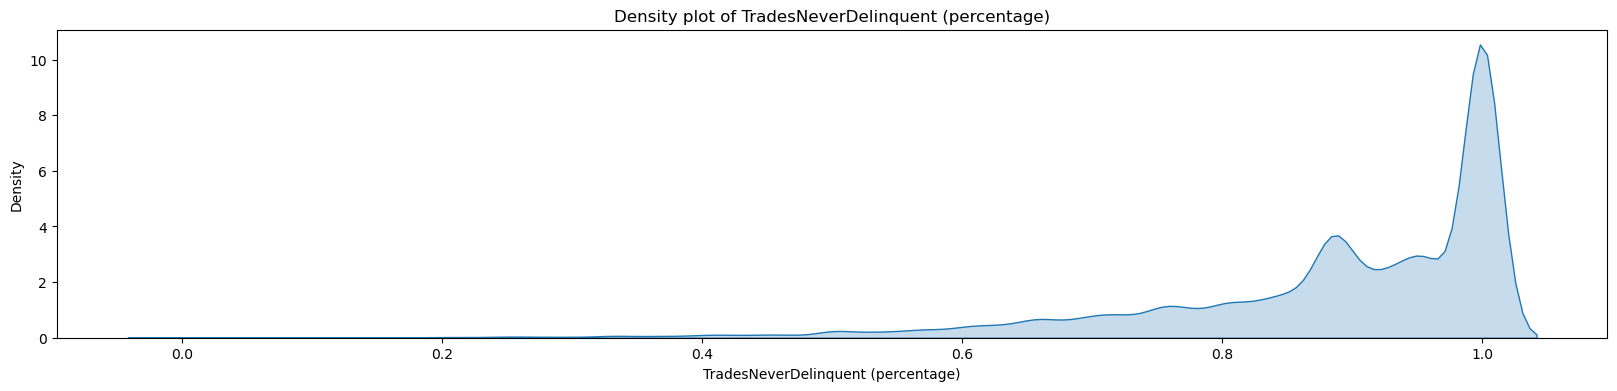

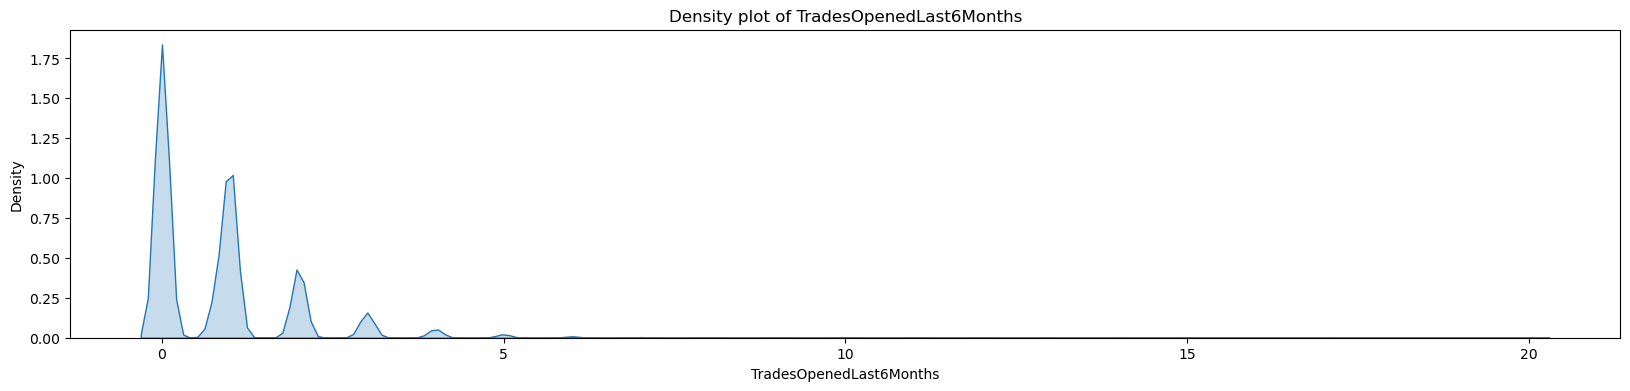

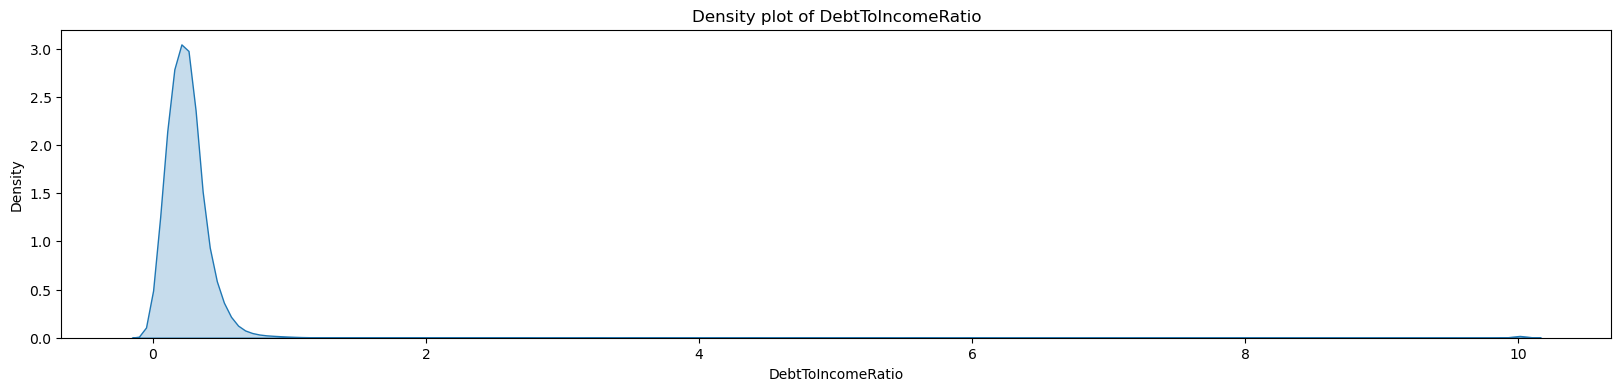

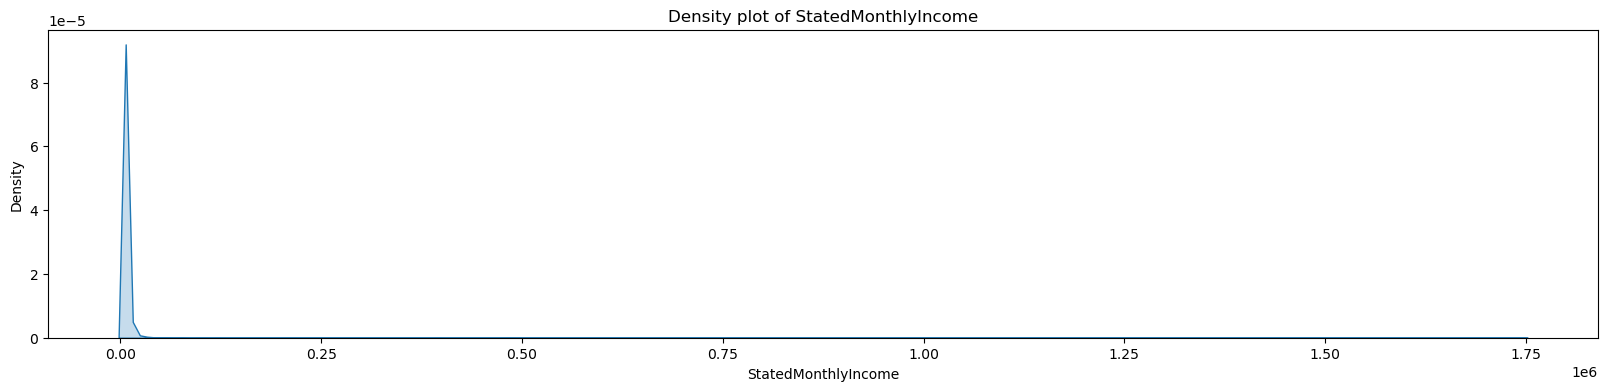

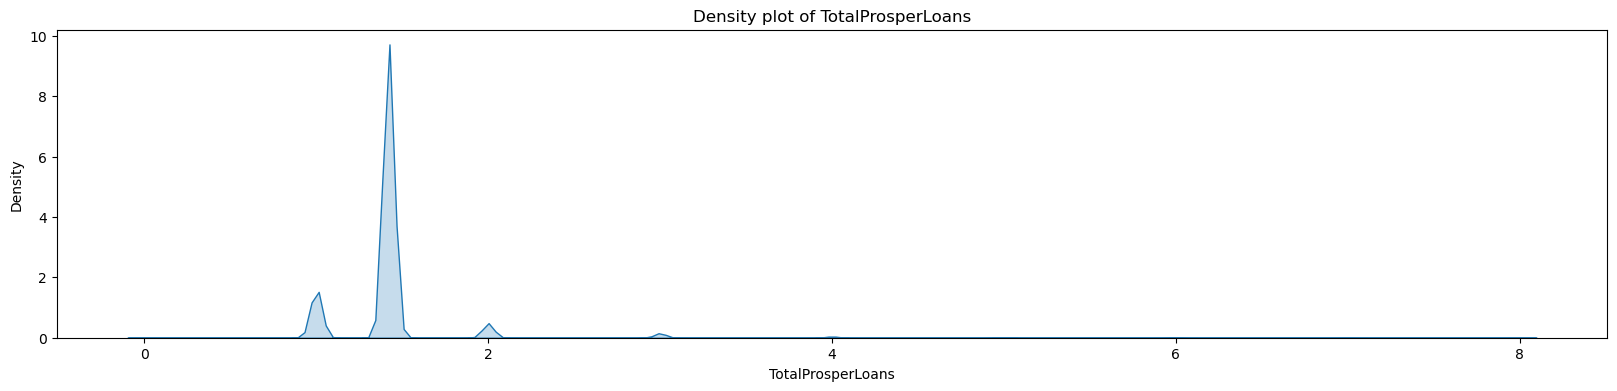

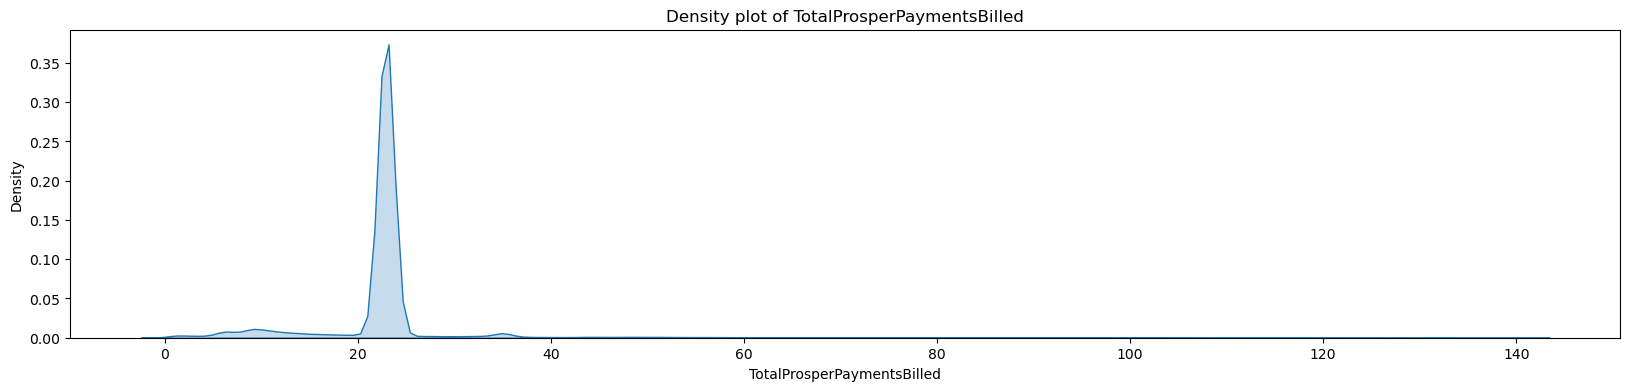

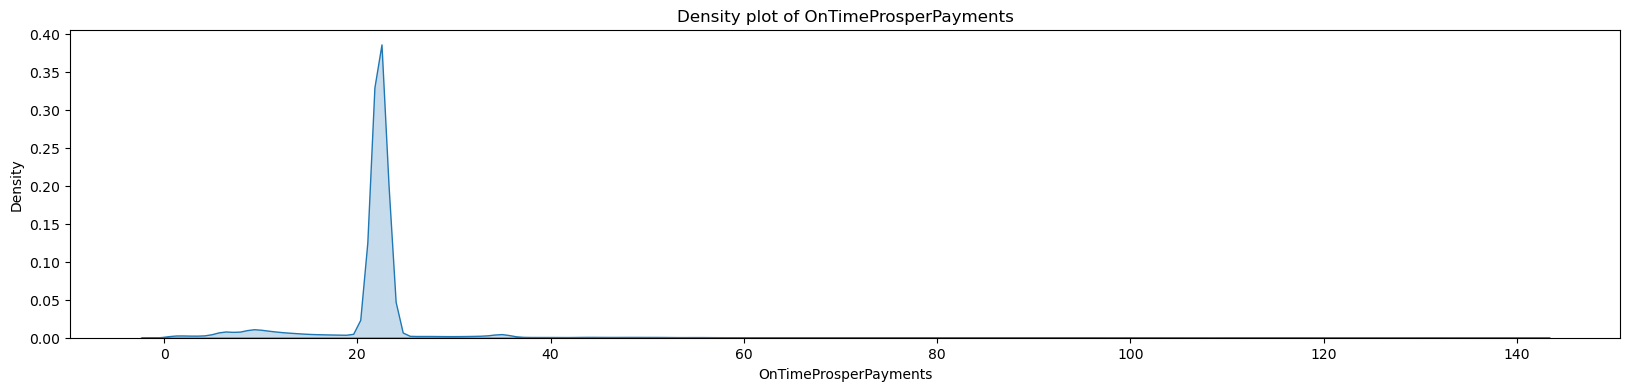

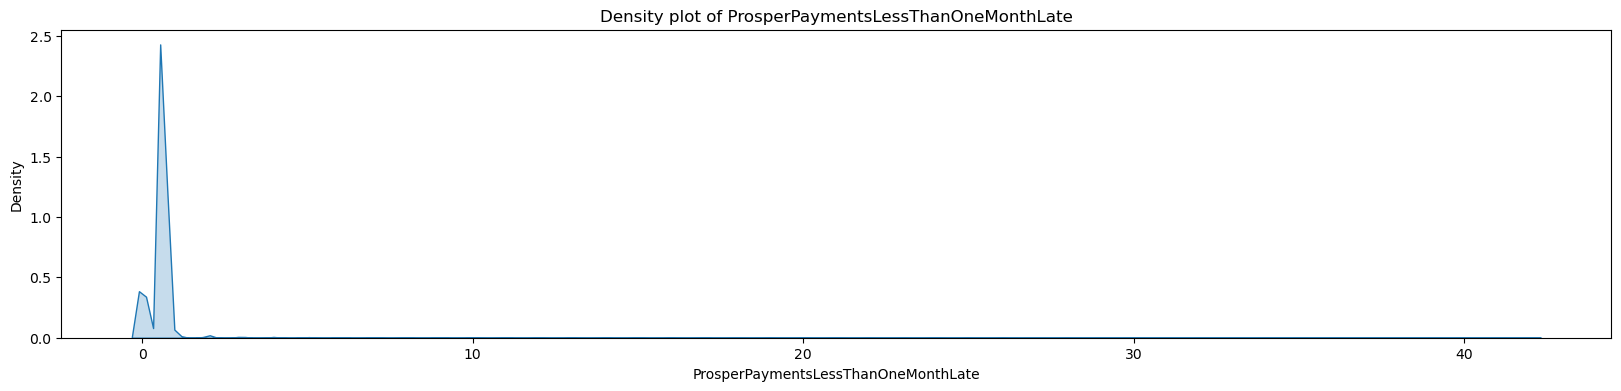

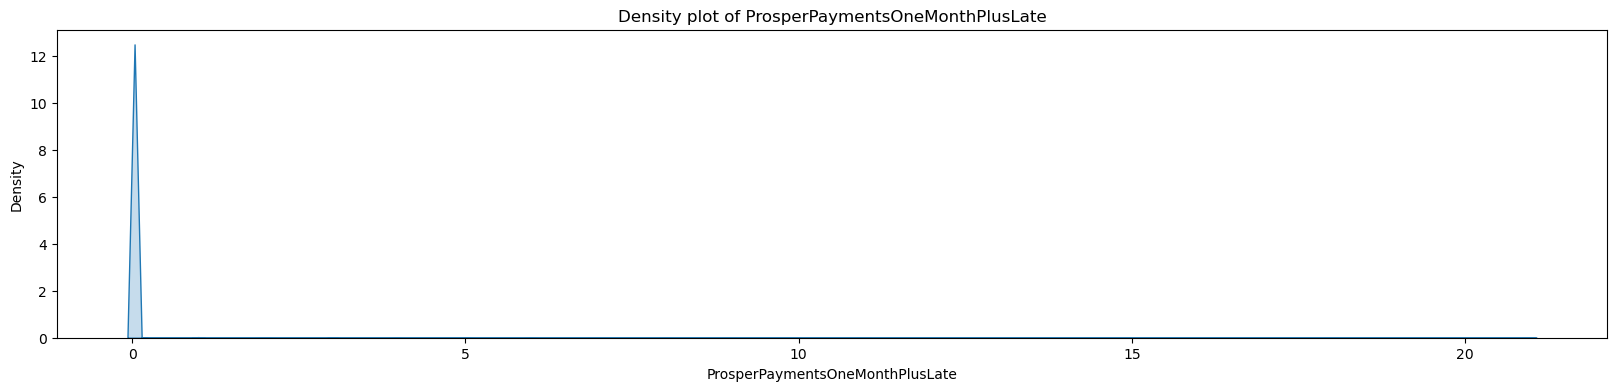

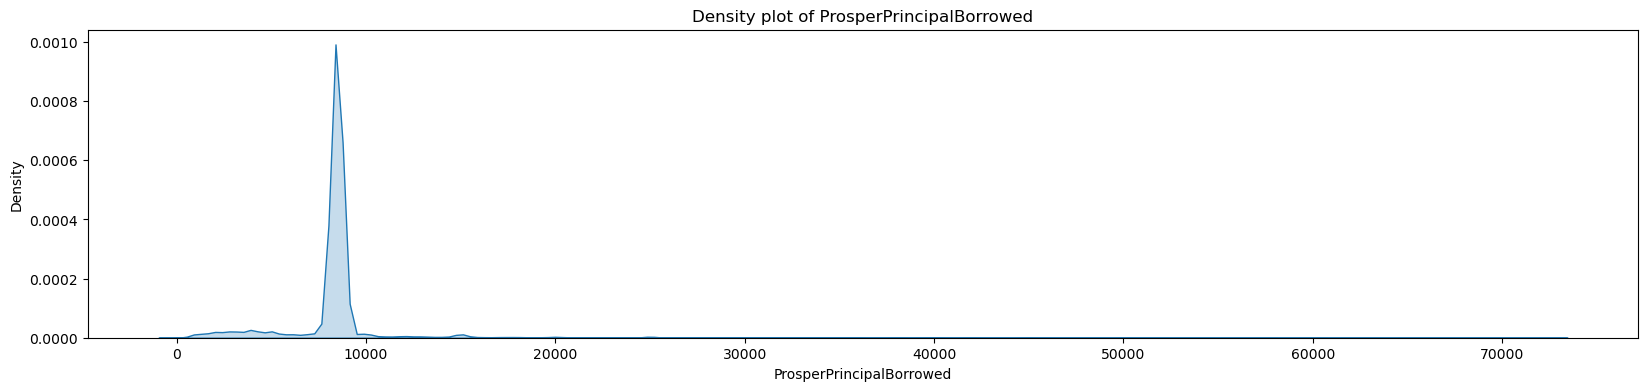

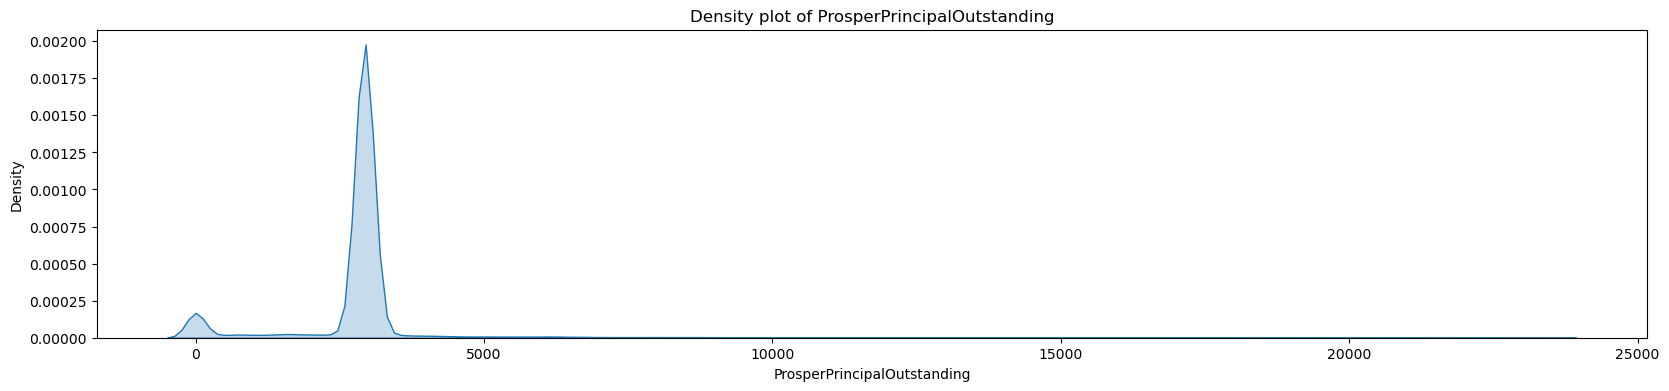

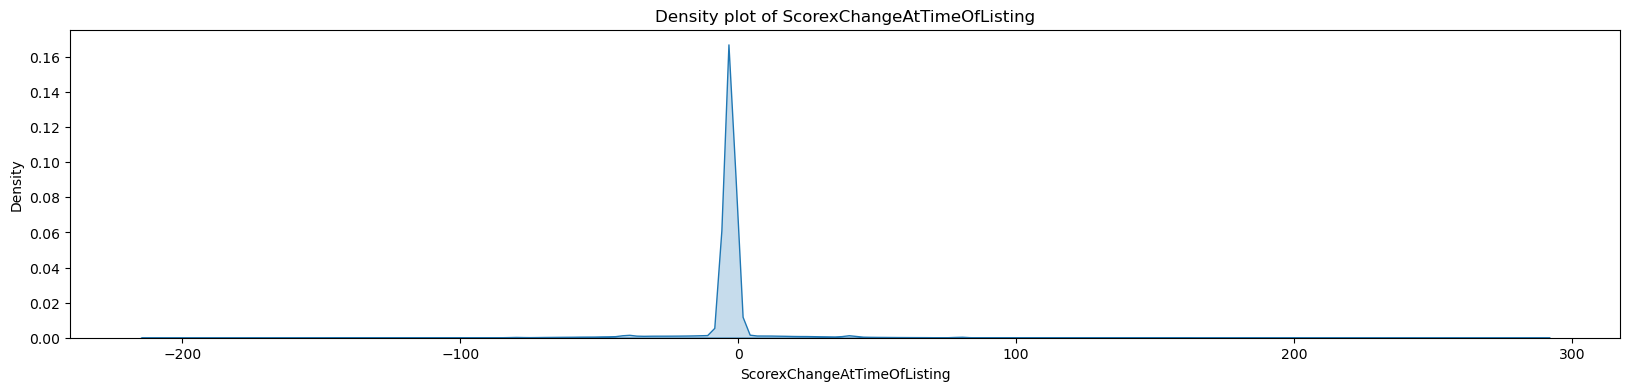

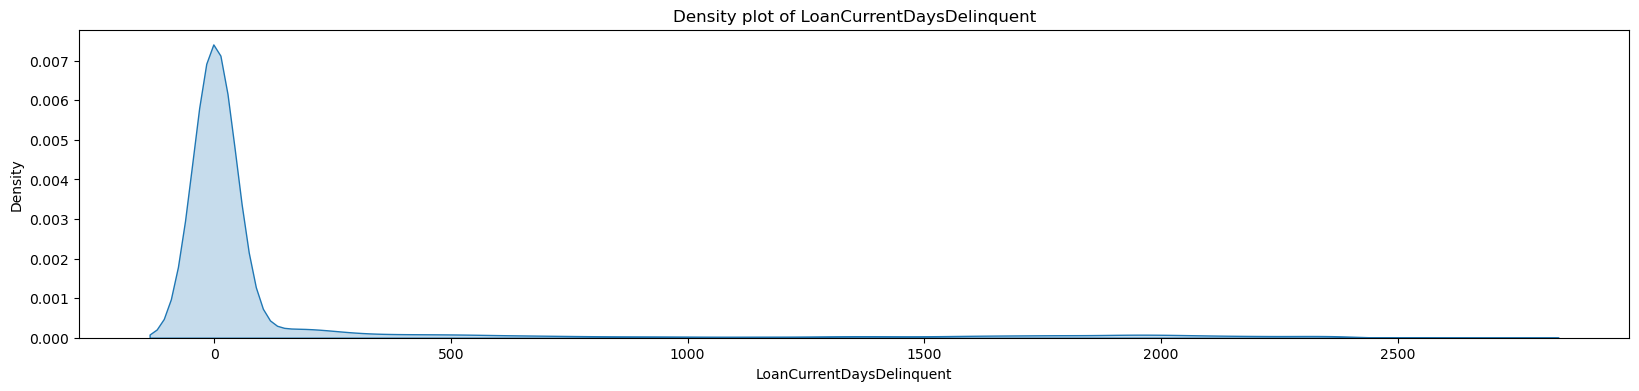

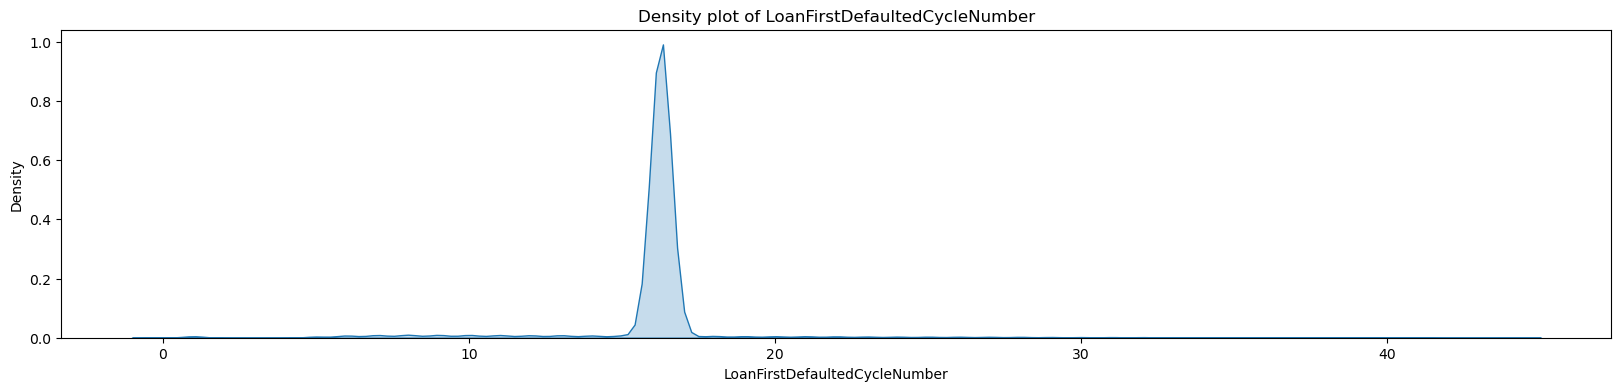

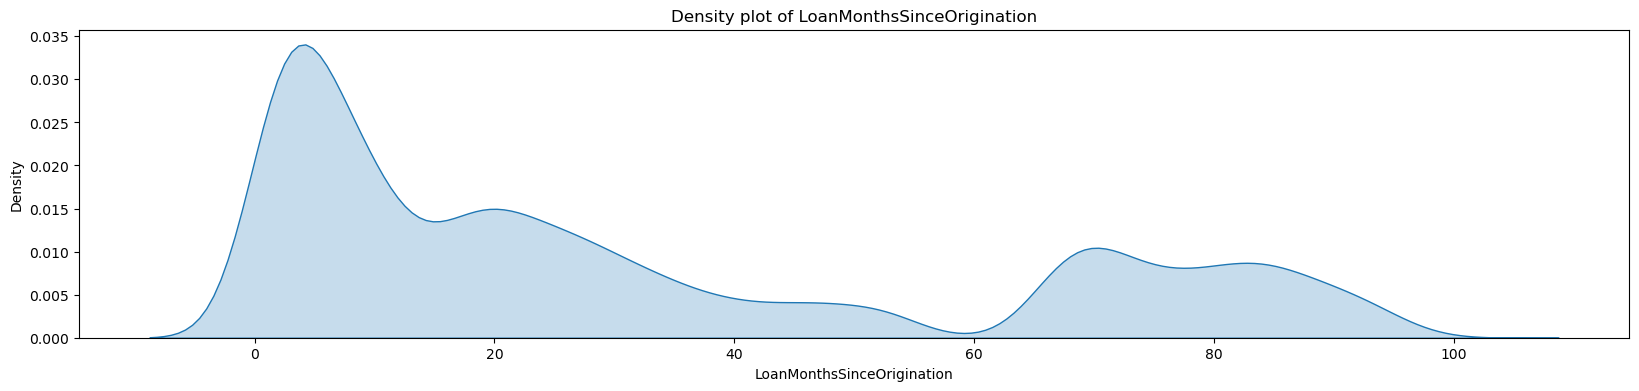

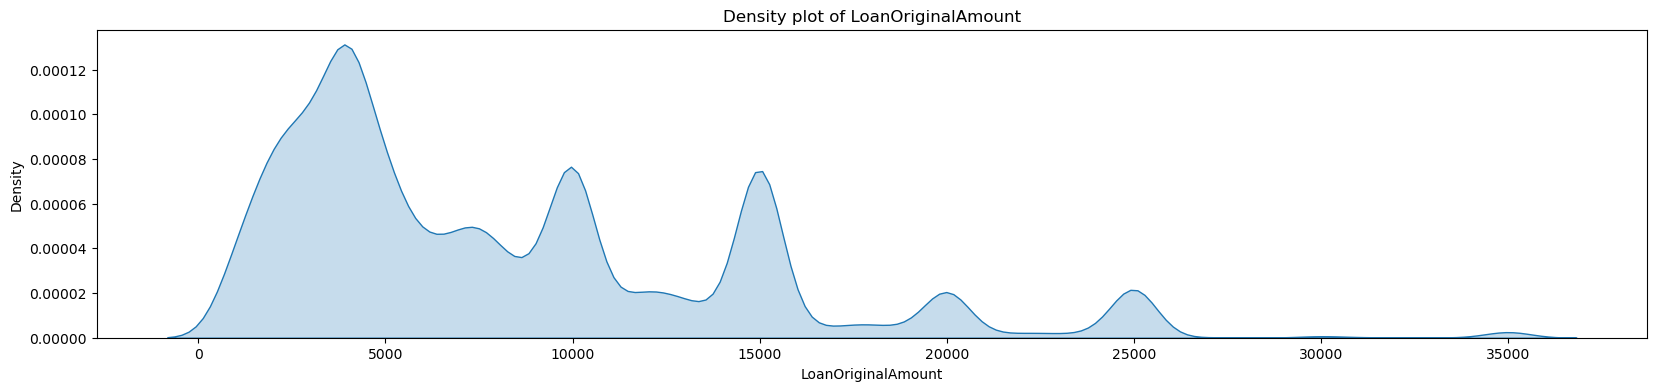

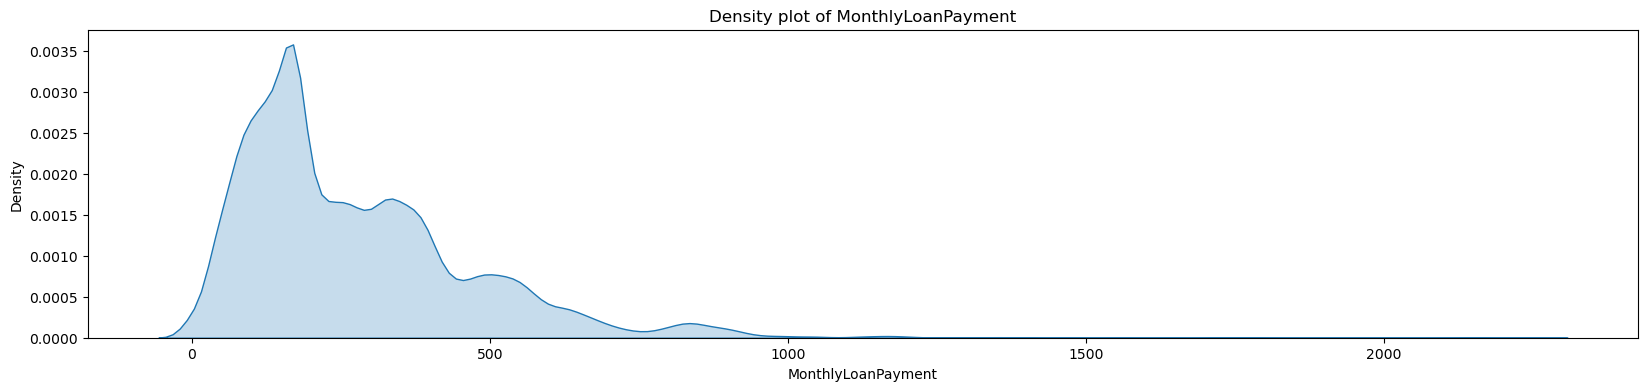

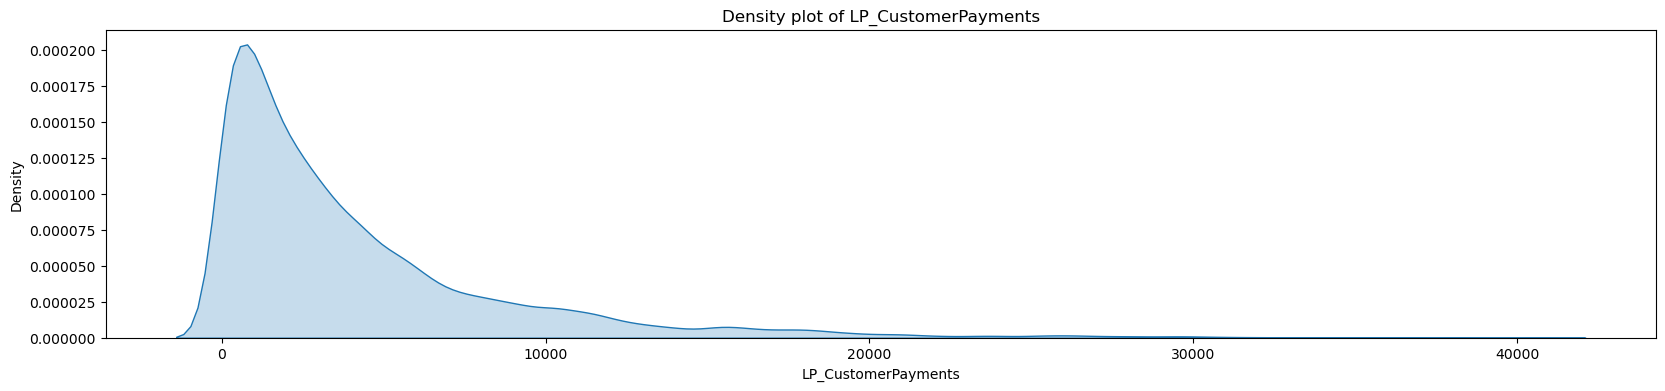

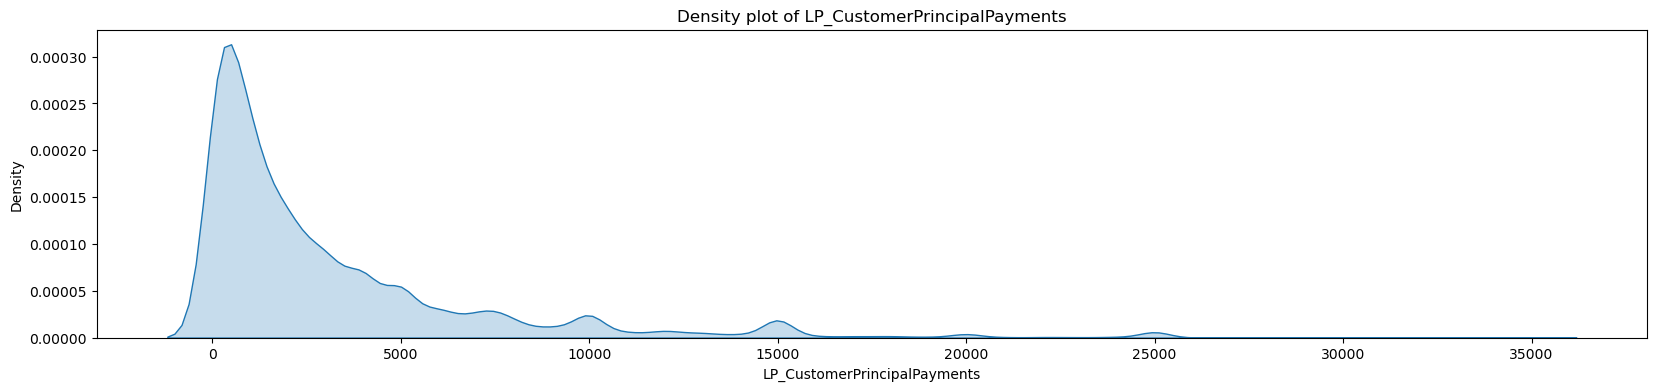

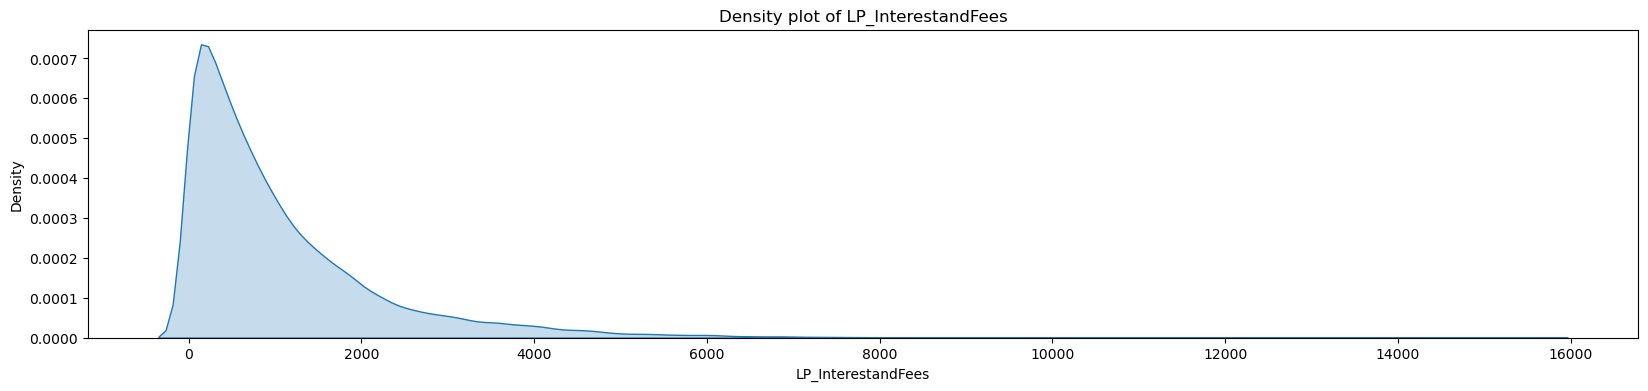

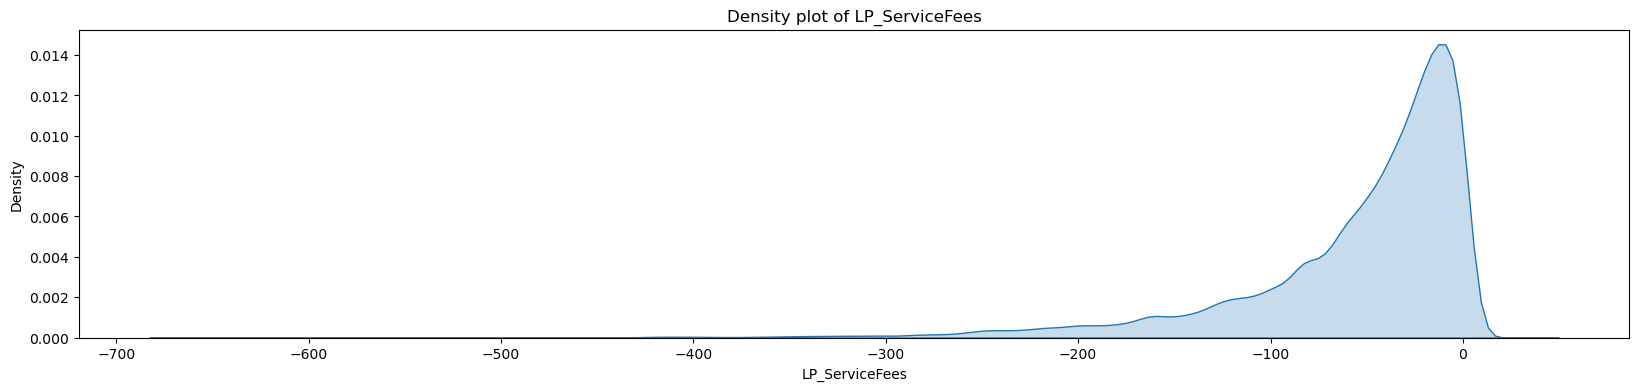

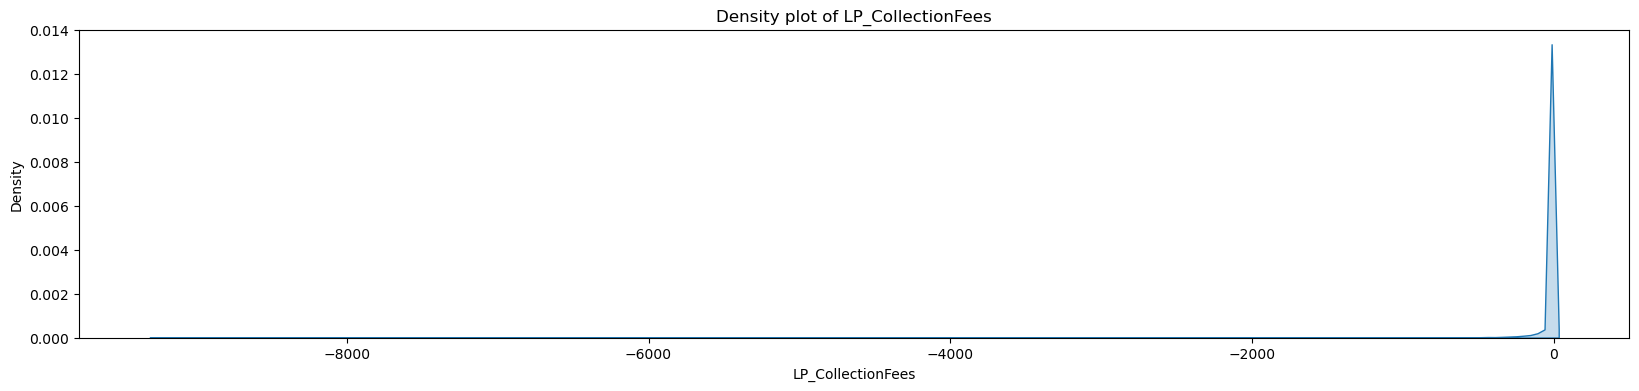

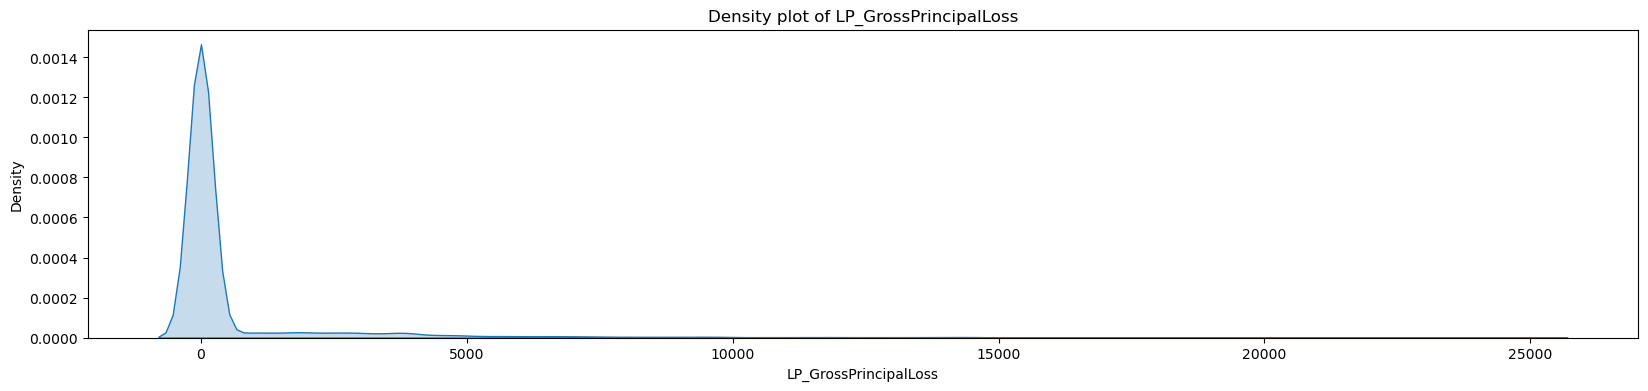

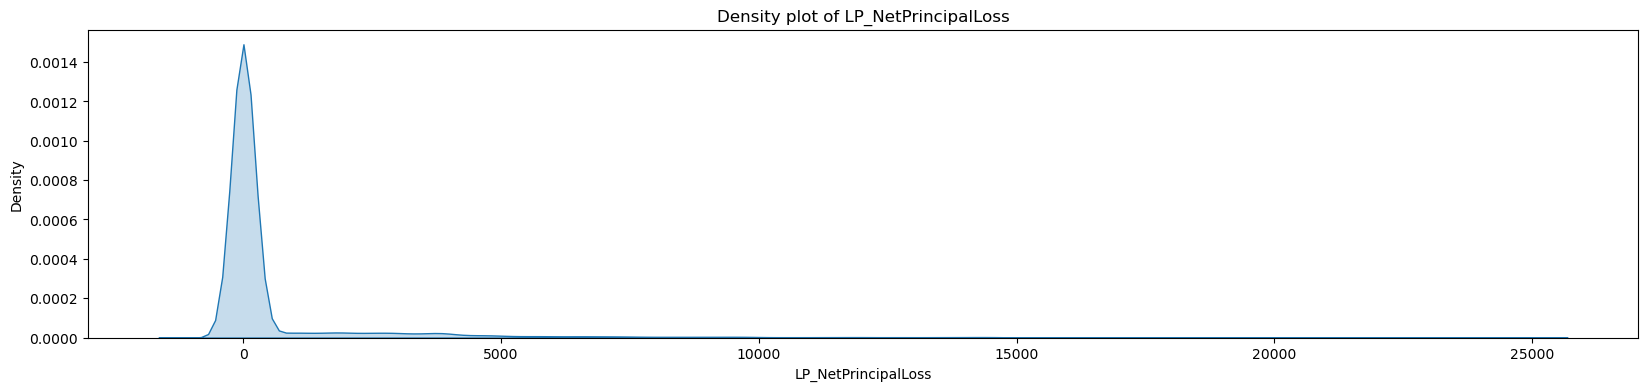

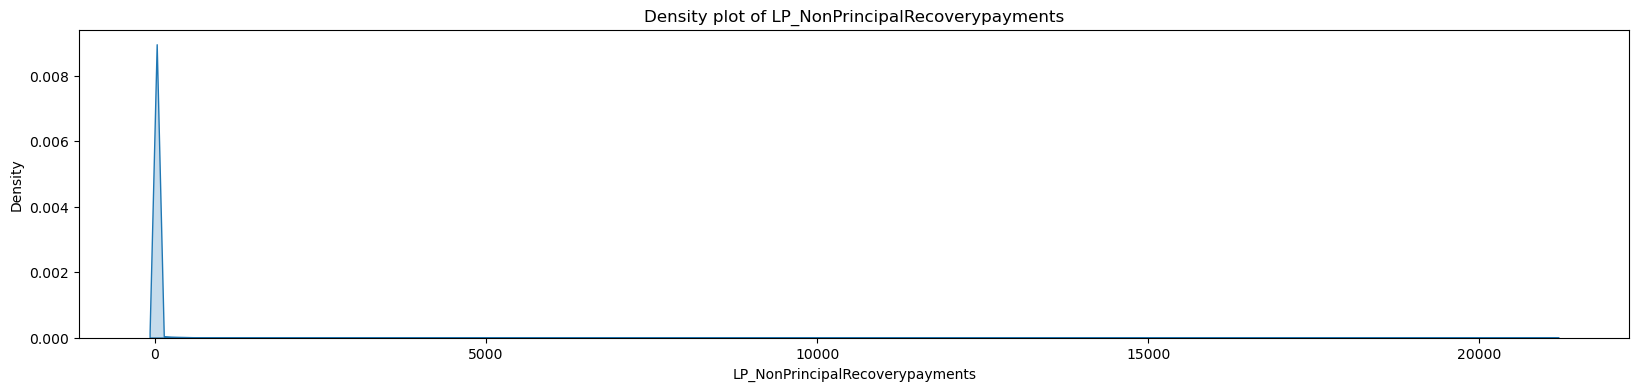

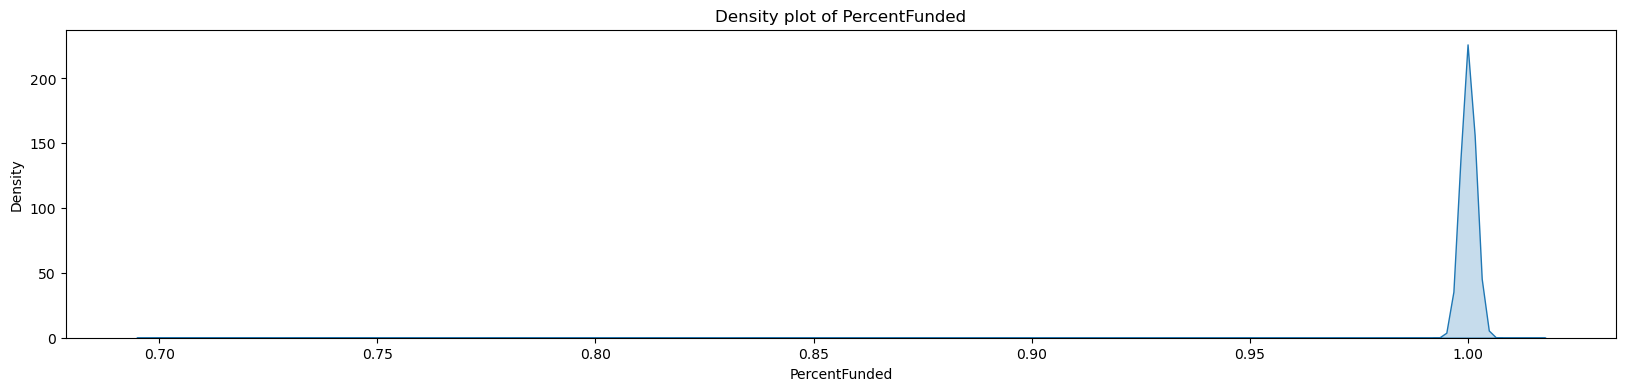

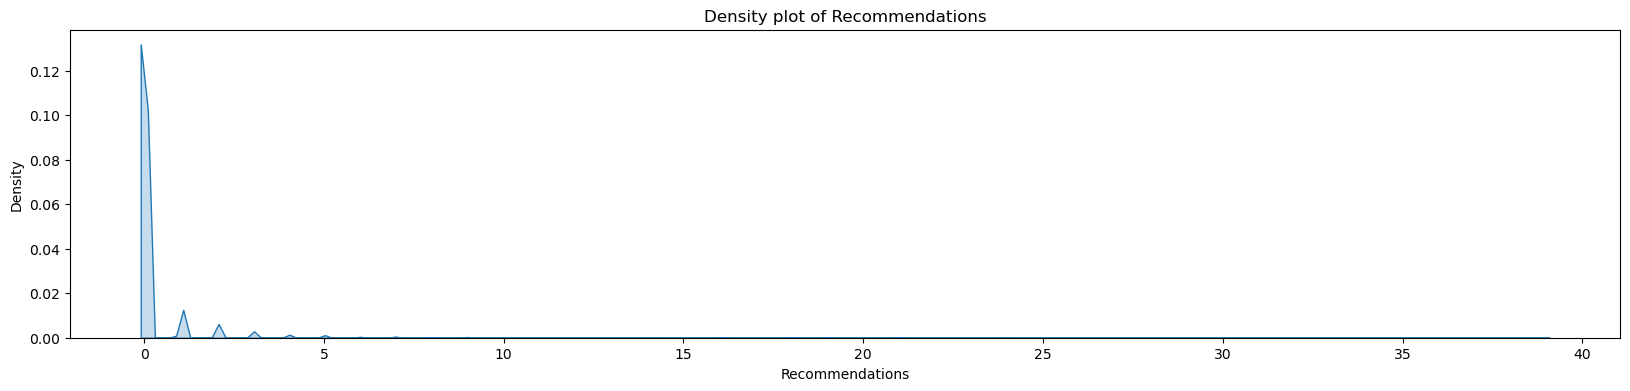

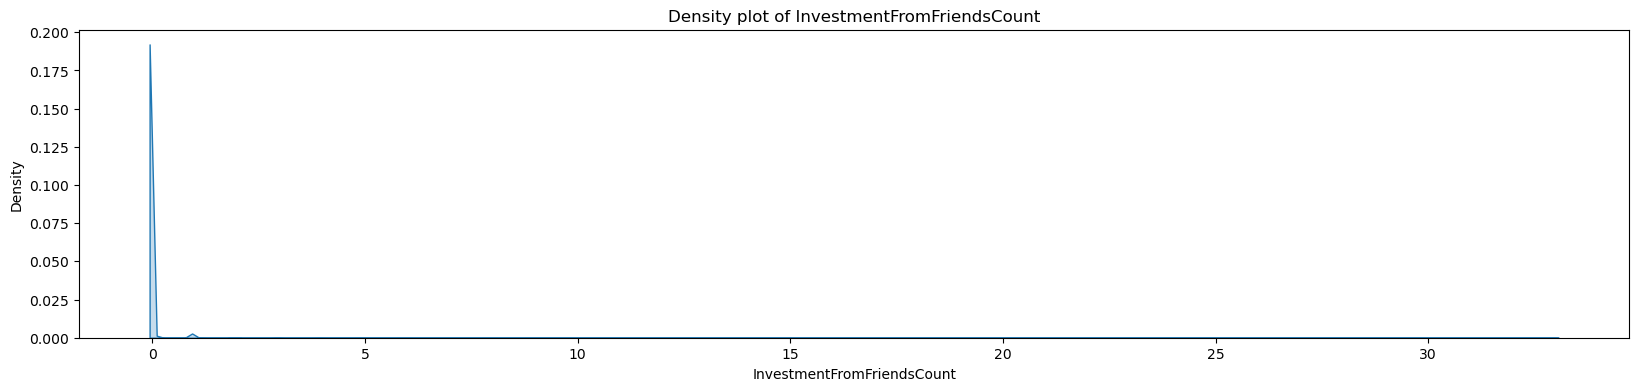

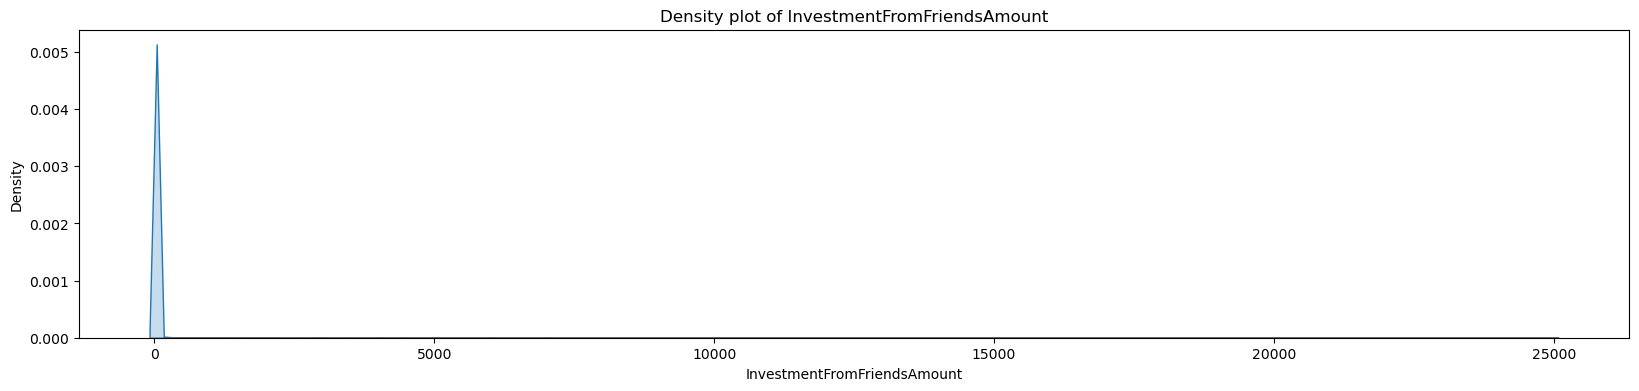

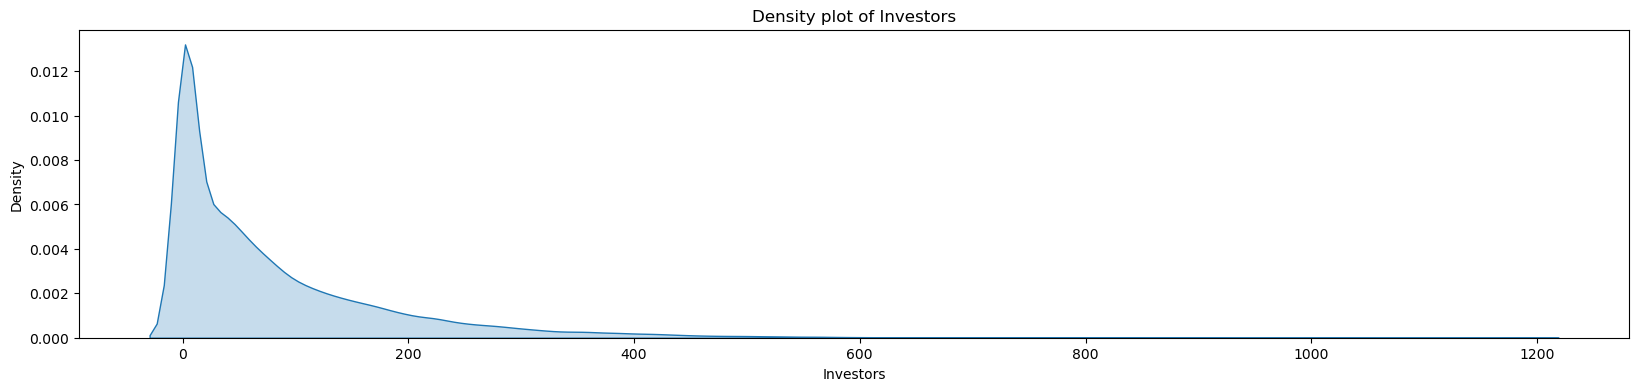

In [26]:
# Plotting denisty plots for better visualization
for col in cleaned_cols.columns:
    if df[col].dtype != 'object': # check if the column is numeric
        fig, ax = plt.subplots(figsize = (20, 4))
        sns.kdeplot(df[col], shade=True)
        plt.title('Density plot of {}'.format(col))
        plt.show()

## Categorical Columns Visualization

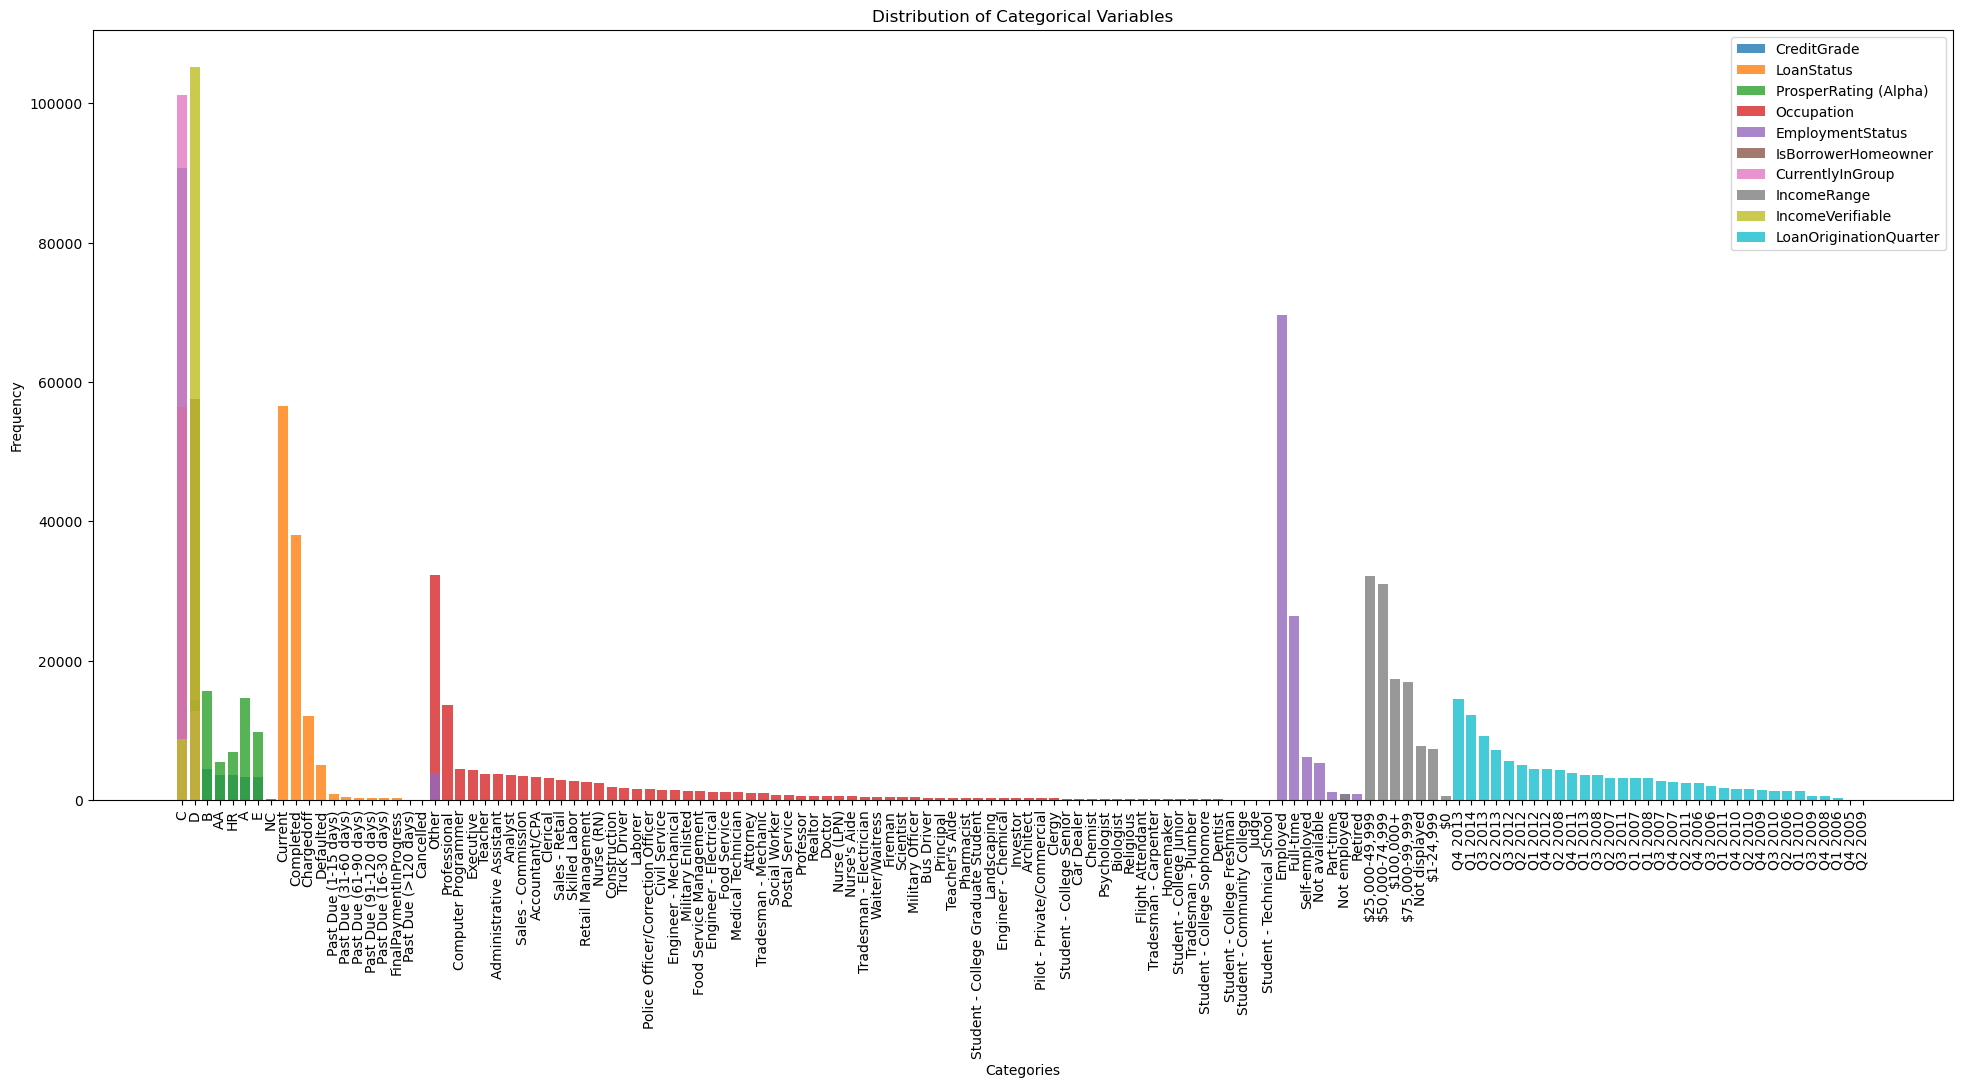

In [27]:
fig, ax = plt.subplots(figsize=(24, 10))

for col in categorical_cols.columns:
    # Calculate the frequency of each category in the column
    counts = df[col].value_counts()
    # Create a stacked bar plot with the data
    plt.bar(counts.index, counts.values, label=col, alpha=0.8)
    # Add a legend to the plot
    plt.legend()

# Set the title and axis labels of the plot
plt.title('Distribution of Categorical Variables')
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
# Show the plot
plt.show()

### Generating new column from CrediGrade Column

In [28]:
mapping = {
    'AA': 'The highest credit grade',
    'A': 'A strong credit grade',
    'B': 'A medium credit grade',
    'C': 'A lower credit grade',
    'D': 'A very low credit grade',
    'E': 'A grade indicating default',
    'HR': 'High risk',
    'NC': 'No credit history'
}

# Create a new column 'description' based on the mapping
df['description'] = df['CreditGrade'].map(mapping)

# Print the resulting DataFrame
df

ListingCreationDate CreditGrade  Term              LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)               Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup    DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  TotalProsperLoans  \
0      2023-03-24 09:29:18           C    36               Completed 2009-08-14      0.16516        0.1580       0.1380                 0.168661       0.080306         0.096068                 4.072243                     C      5.950067                          0                    Other    Self-employed                  2.000000                 True              True 2013-04-11 14:12:00                  640.0                  659.0              2001-11-10            5.000000         4.000000                        12.0                      1                           24                   3.0             3.0                   2.0        472.000000                      4.0                       0.0                   0.000000                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17  $25,000-49,999              True          3083.333333             1.4211   
1      2023-03-24 02:03:30           C    36                 Current 2014-04-03      0.12016        0.0920       0.0820                 0.079600       0.024900         0.054700                 6.000000                     A      7.000000                          2             Professional         Employed                 44.000000                False             False 2014-02-27 08:28:00                  680.0                  699.0              1996-03-18           14.000000        14.000000                        29.0                     13                          389                   3.0             5.0                   0.0          0.000000                      0.0                       1.0                   0.000000             3989.000000             0.210000             10266.000000    29.000000                            1.000000                 2.000000               0.18  $50,000-74,999              True          6125.000000             1.4211   
2      2023-03-24 00:47:06          HR    36               Completed 2009-12-17      0.28269        0.2750       0.2400                 0.168661       0.080306         0.096068                 4.072243                     C      5.950067                          0                    Other    Not available                 96.071582                False              True 2023-03-24 09:10:06                  480.0                  499.0              2002-07-27           10.317192         9.260164                         3.0                      0                            0                   0.0             1.0                   1.0        984.507059                      0.0                       0.0                   0.015094            17598.706751             0.561309             11210.225447    23.230034                            0.885897                 0.802327               0.06   Not displayed              True          2083.333333             1.4211   
3      2023-03-24 02:35:00           C    36                 Current 2014-04-03      0.12528        0.0974 

## Deriving the Target variable through LoanStatus Column

In [29]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [30]:
LoanStatus_tvalues = df['LoanStatus'].value_counts()
LoanStatus_tvalues

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [31]:
# Deriving the target variable through 'LoanStatus' Column
df['DefaultStatus'] = df['LoanStatus'].replace(['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 
       'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
        'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Past Due (>120 days)' , 'Cancelled'],\
                                               ['Non-Defaulted','Non-Defaulted','Defaulted','Defaulted',\
                                                'Non-Defaulted','Non-Defaulted','Non-Defaulted', 'Non-Defaulted',\
                                                'Defaulted', 'Non-Defaulted', 'Defaulted',
                                               'Non-Defaulted',])

In [32]:
# Checking the values 
print(df[['DefaultStatus', 'LoanStatus']])

        DefaultStatus              LoanStatus
0       Non-Defaulted               Completed
1       Non-Defaulted                 Current
2       Non-Defaulted               Completed
3       Non-Defaulted                 Current
4       Non-Defaulted                 Current
...               ...                     ...
113932  Non-Defaulted                 Current
113933  Non-Defaulted  FinalPaymentInProgress
113934  Non-Defaulted                 Current
113935  Non-Defaulted               Completed
113936  Non-Defaulted                 Current

[113937 rows x 2 columns]


Text(0.5, 0, 'DefaultStatus')

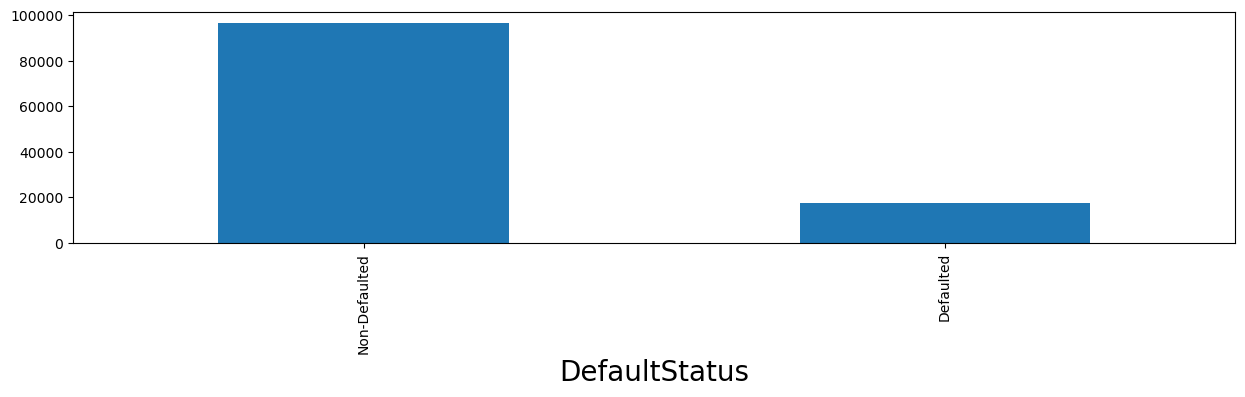

In [33]:
# Creating Bar Plot for DefaultStatus / Taret Variable column
plt.figure(figsize=(15,3))
df['DefaultStatus'].value_counts().plot.bar()
plt.xlabel('DefaultStatus', fontsize=20)

In [34]:
cleaned_cols.shape

(113937, 59)

## Univariate Analysis

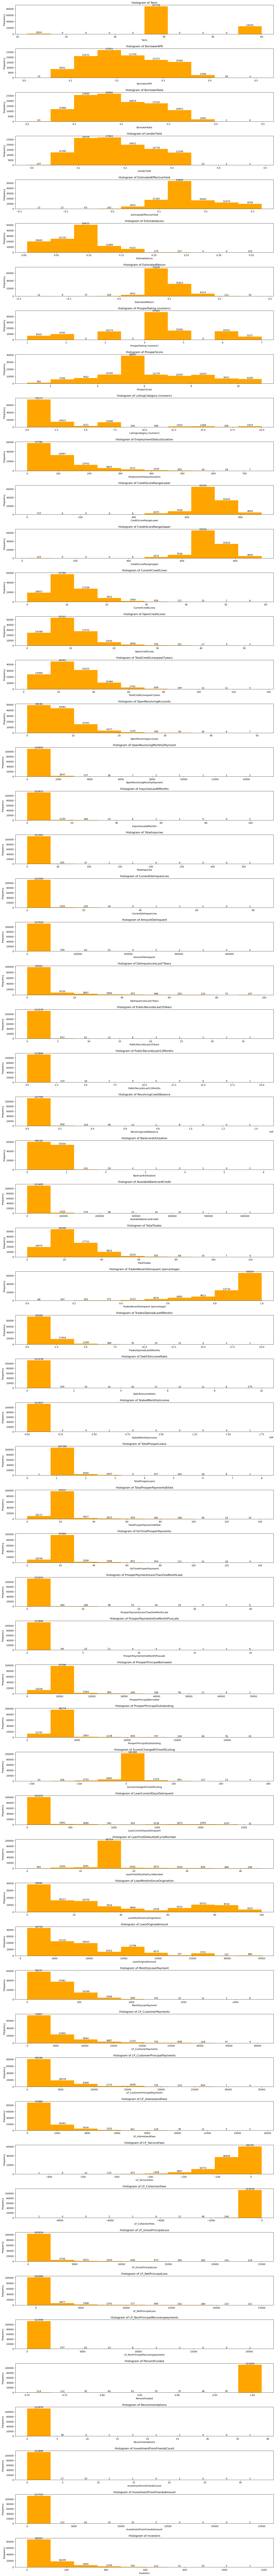

In [35]:
# Set the number of rows and columns for the plot grid
num_rows = 59
num_cols = 1

# Create the plot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 200))

# Flatten the axis array so we can loop through it
axs = axs.flatten()

# Loop through the numerical columns and plot a histogram for each one
for i, col in enumerate(cleaned_cols):
    n, bins, patches = axs[i].hist(df[col], color='orange')
    bin_counts = [int(count) for count in n]
    for j in range(len(patches)):
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 5
        axs[i].text(x, y, bin_counts[j], ha='center', va='bottom')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Histogram of {col}")

# Hide any unused plot grids
for i in range(len(cleaned_cols), num_rows*num_cols):
    axs[i].axis('off')

# Adjust the plot spacing
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()

In [36]:
categorical_cols.shape
categorical_cols.columns

Index(['CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationQuarter'], dtype='object')

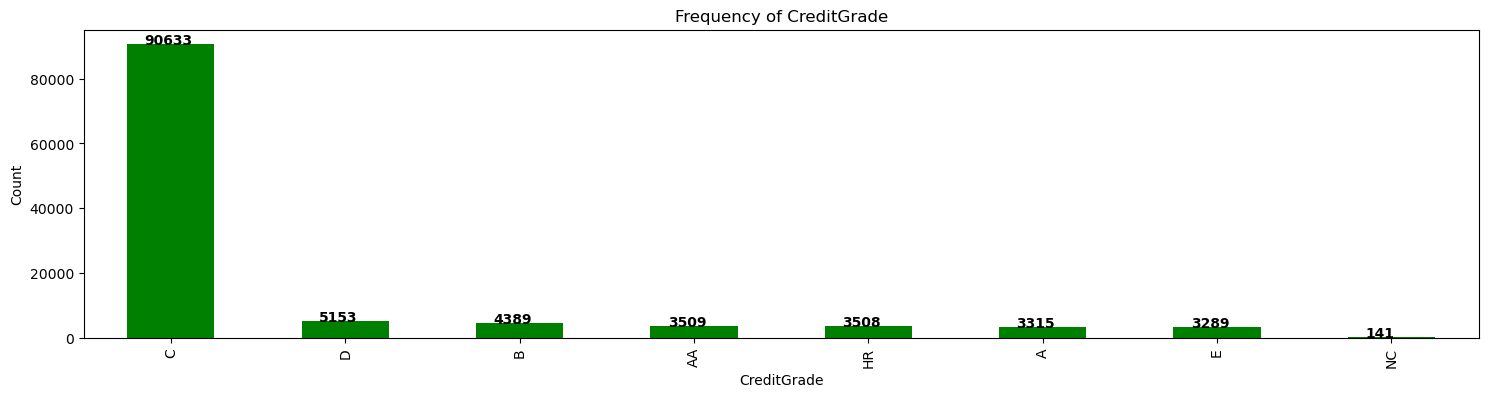

In [37]:
# Plotting the ar Graph for CreditGrade column
fig = plt.figure(figsize = (18,4))
count = df['CreditGrade'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("CreditGrade")
plt.ylabel('Count')
plt.title('Frequency of CreditGrade')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

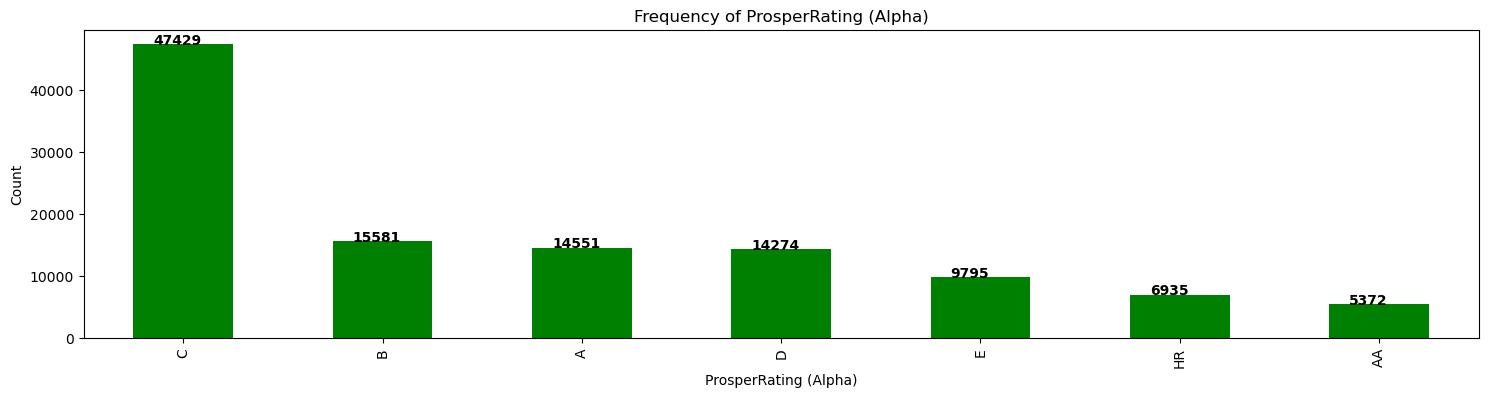

In [38]:
# Plotting the ar Graph for ProsperRating (Alpha) column
fig = plt.figure(figsize = (18,4))
count = df['ProsperRating (Alpha)'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("ProsperRating (Alpha)")
plt.ylabel('Count')
plt.title('Frequency of ProsperRating (Alpha)')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

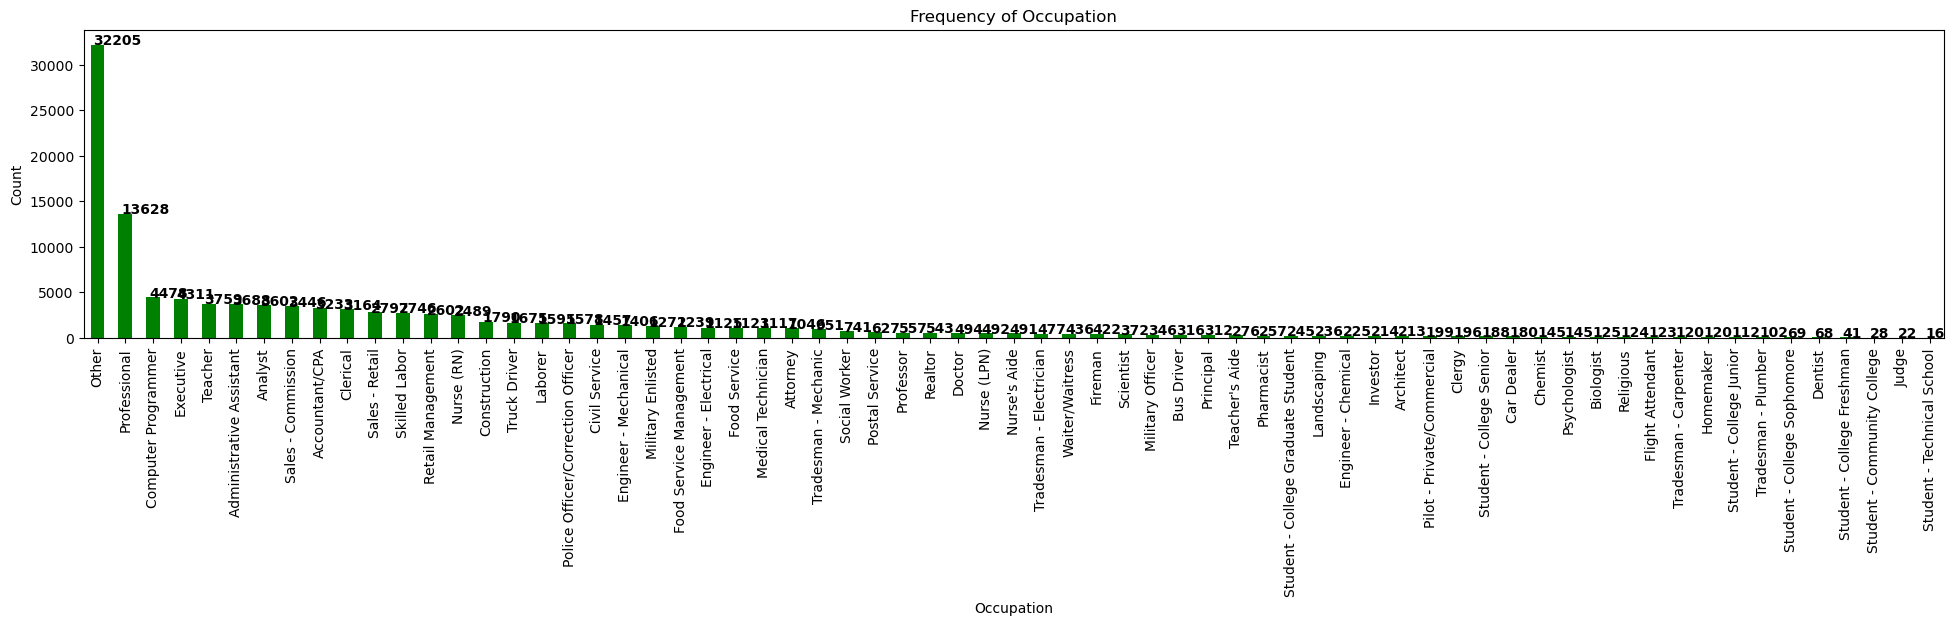

In [39]:
# Plotting the ar Graph for Occupation column
fig = plt.figure(figsize = (24,4))
count = df['Occupation'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("Occupation")
plt.ylabel('Count')
plt.title('Frequency of Occupation')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

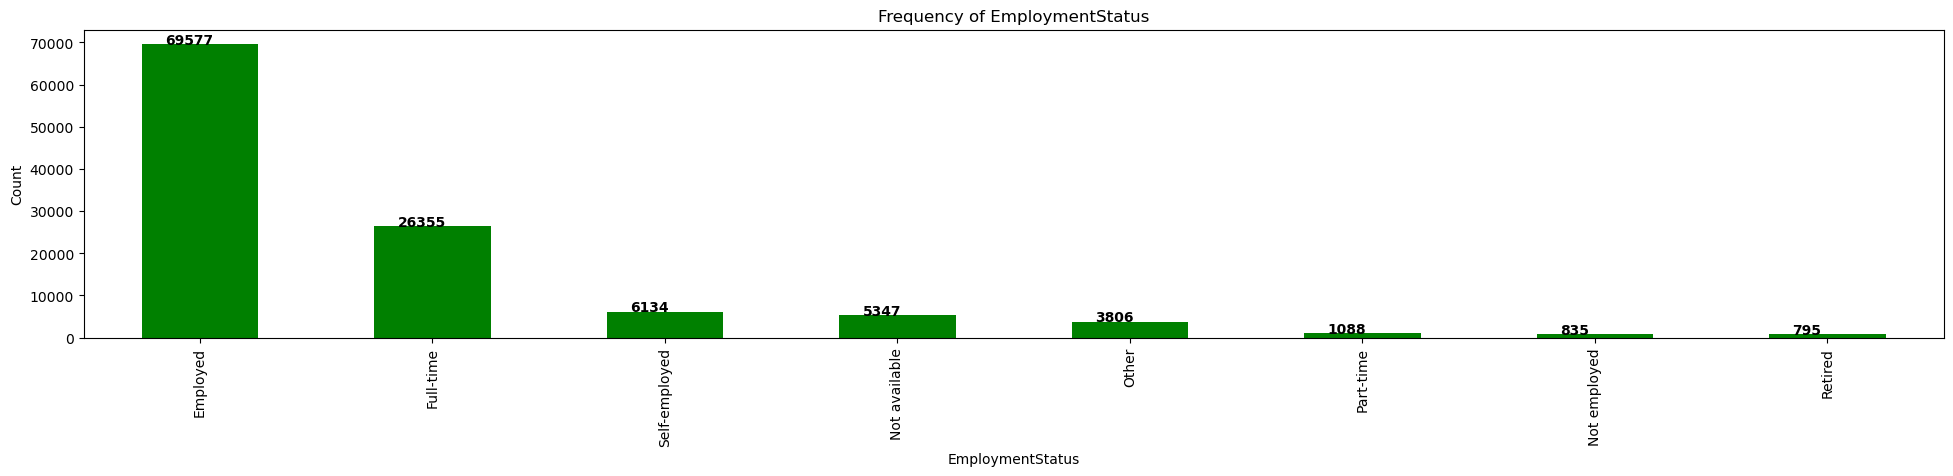

In [40]:
# Plotting the ar Graph for EmploymentStatus column
fig = plt.figure(figsize = (24,4))
count = df['EmploymentStatus'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("EmploymentStatus")
plt.ylabel('Count')
plt.title('Frequency of EmploymentStatus')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

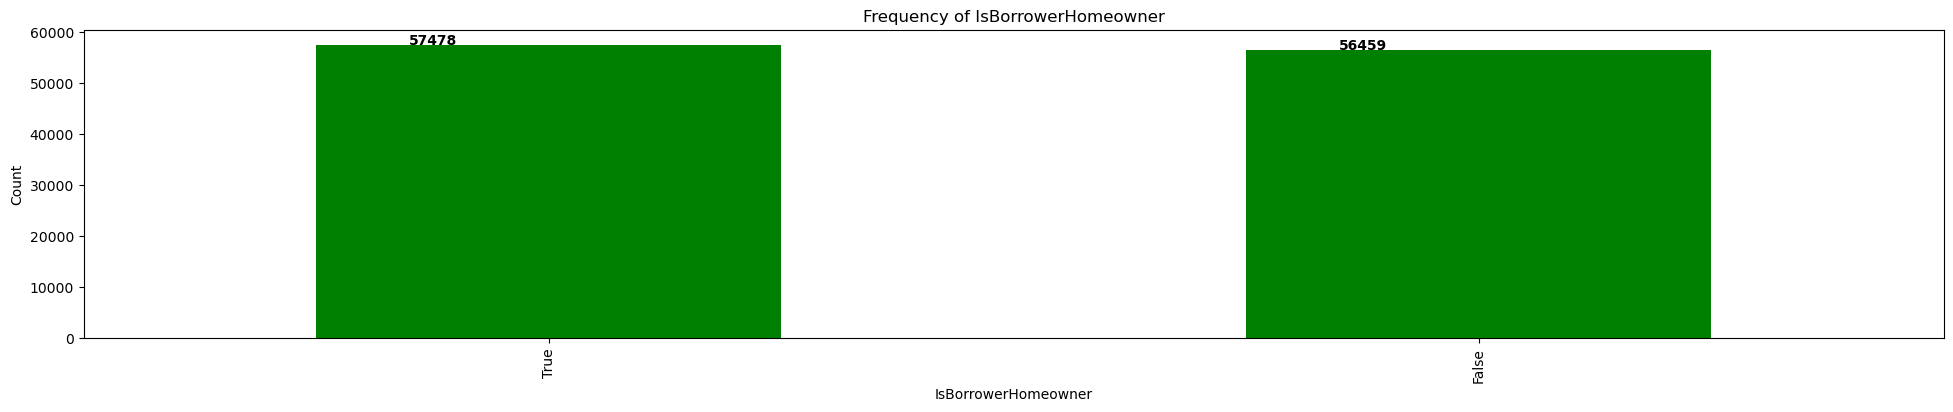

In [41]:
# Plotting the ar Graph for IsBorrowerHomeowner column
fig = plt.figure(figsize = (24,4))
count = df['IsBorrowerHomeowner'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IsBorrowerHomeowner")
plt.ylabel('Count')
plt.title('Frequency of IsBorrowerHomeowner')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

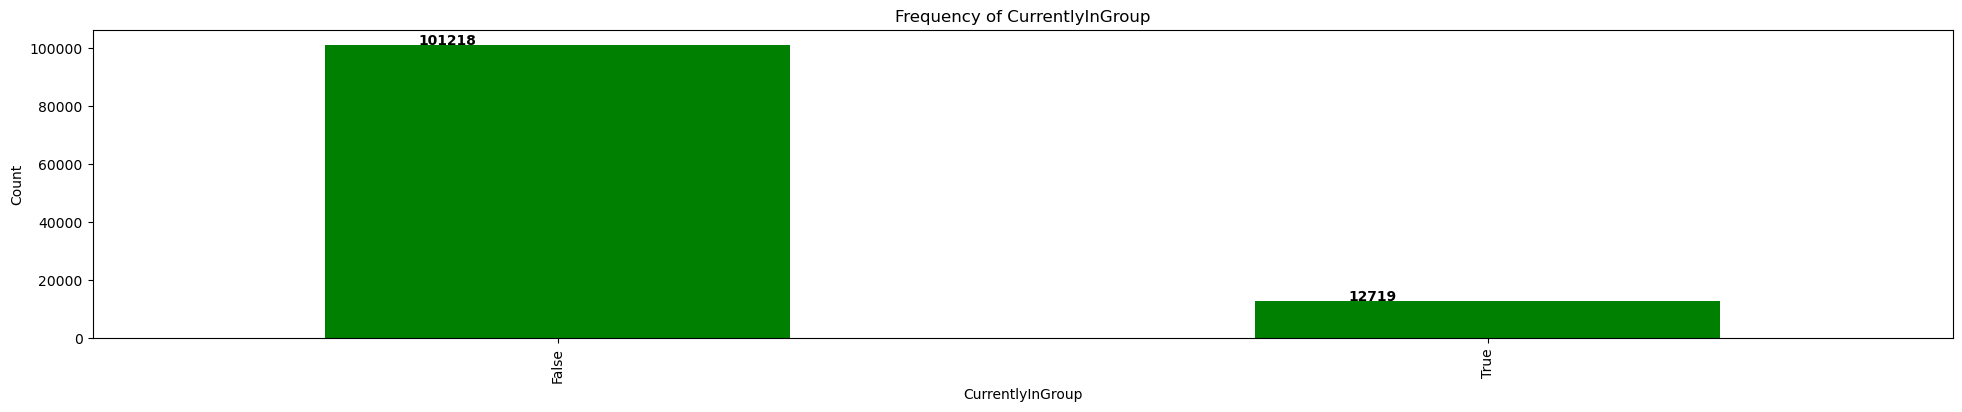

In [42]:
# Plotting the ar Graph for CurrentlyInGroup column
fig = plt.figure(figsize = (24,4))
count = df['CurrentlyInGroup'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("CurrentlyInGroup")
plt.ylabel('Count')
plt.title('Frequency of CurrentlyInGroup')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

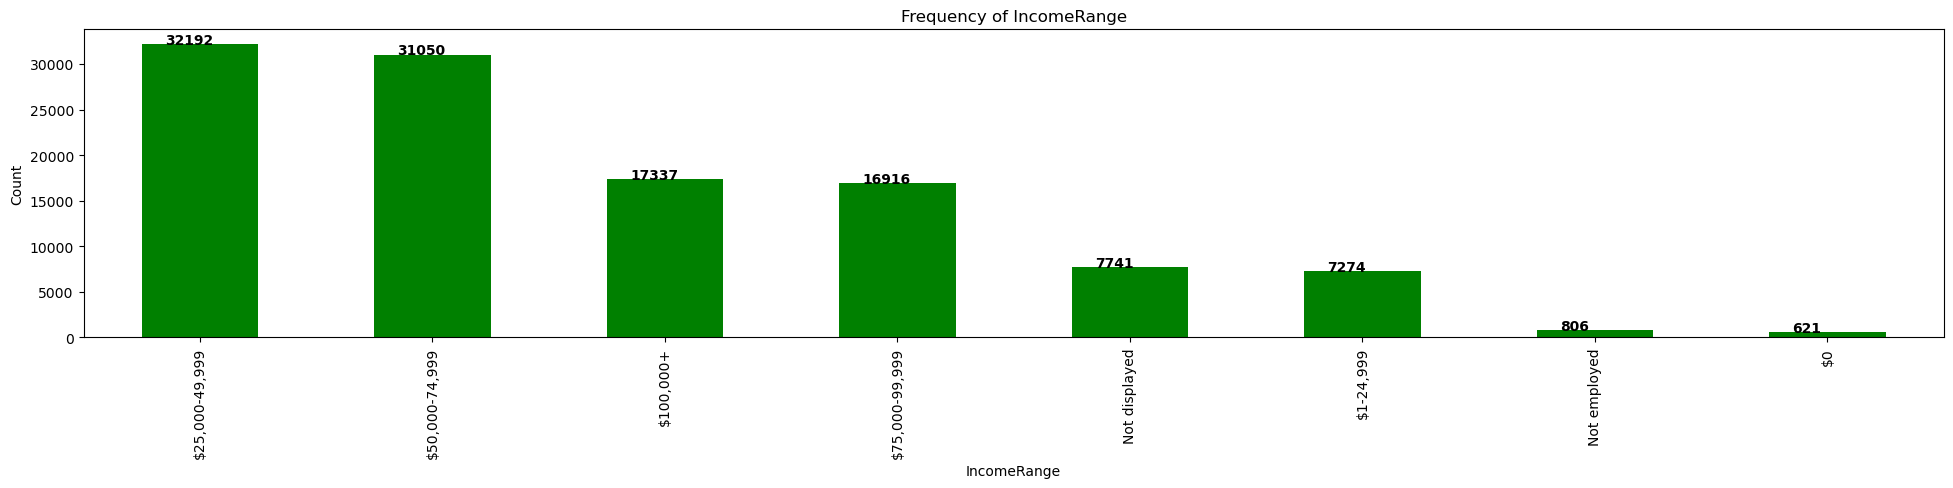

In [43]:
# Plotting the ar Graph for IncomeRange column
fig = plt.figure(figsize = (24,4))
count = df['IncomeRange'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IncomeRange")
plt.ylabel('Count')
plt.title('Frequency of IncomeRange')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

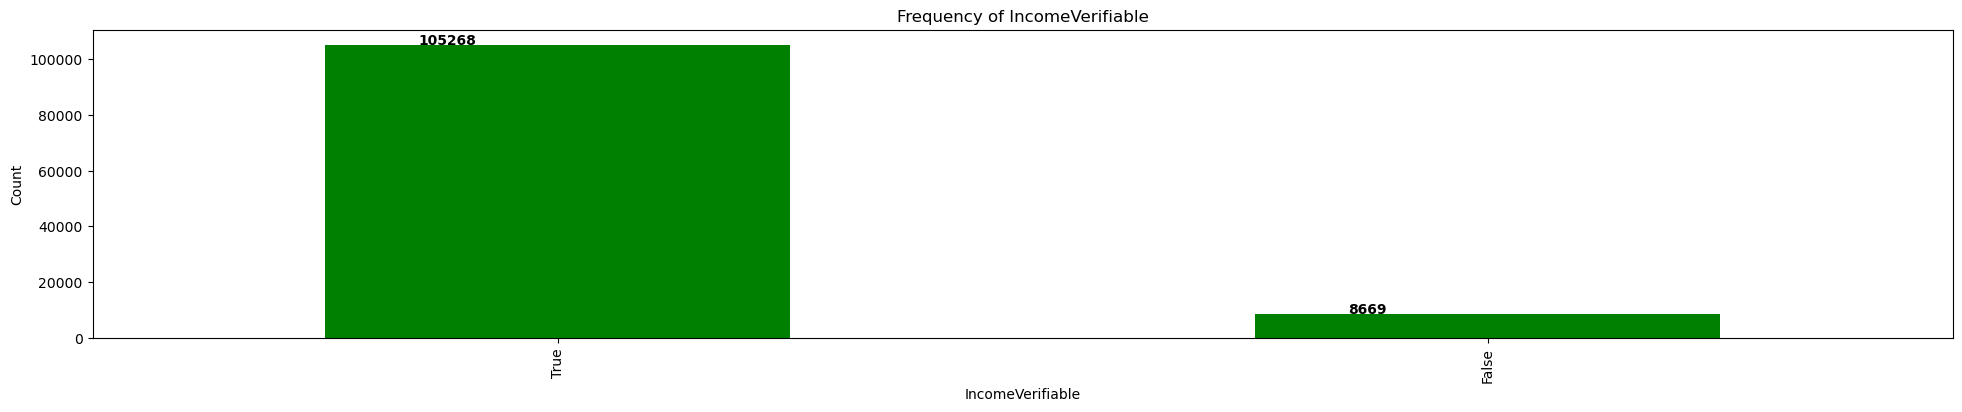

In [44]:
# Plotting the ar Graph for IncomeVerifiable column
fig = plt.figure(figsize = (24,4))
count = df['IncomeVerifiable'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IncomeVerifiable")
plt.ylabel('Count')
plt.title('Frequency of IncomeVerifiable')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

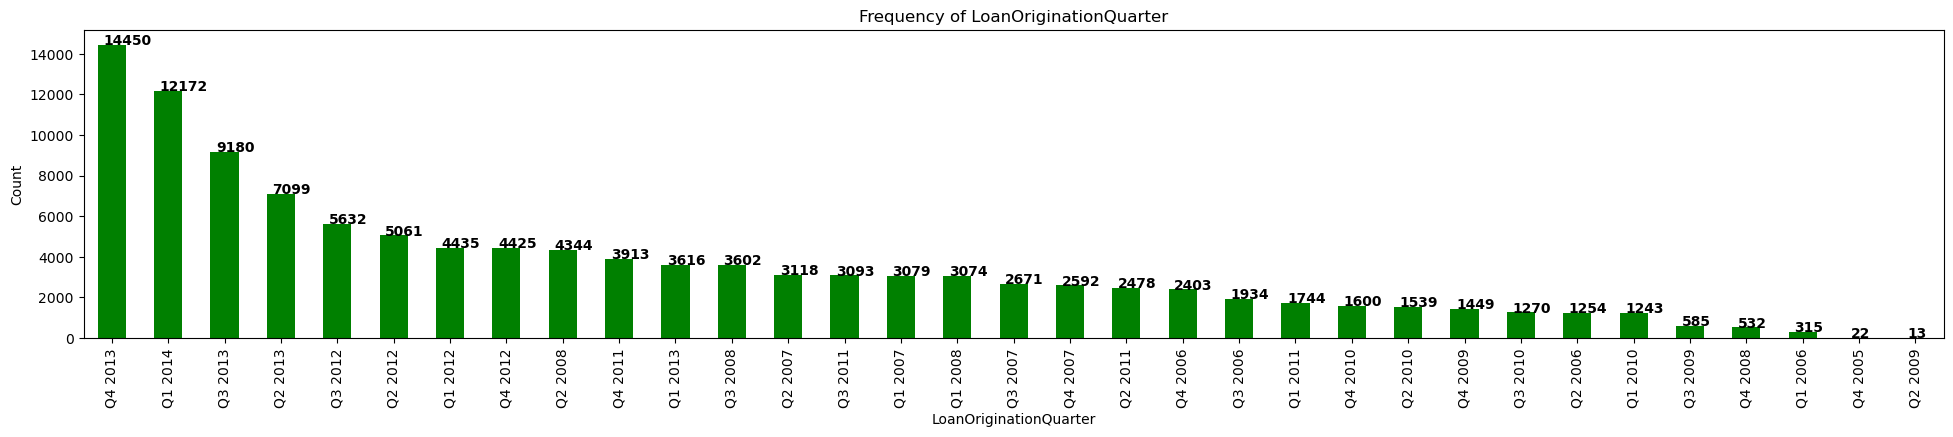

In [45]:
# Plotting the ar Graph for LoanOriginationQuarter column
fig = plt.figure(figsize = (24,4))
count = df['LoanOriginationQuarter'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("LoanOriginationQuarter")
plt.ylabel('Count')
plt.title('Frequency of LoanOriginationQuarter')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

In [46]:
cleaned_cols.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
       'ScorexChange

## Bivariate Analysis Through Scatter Plots

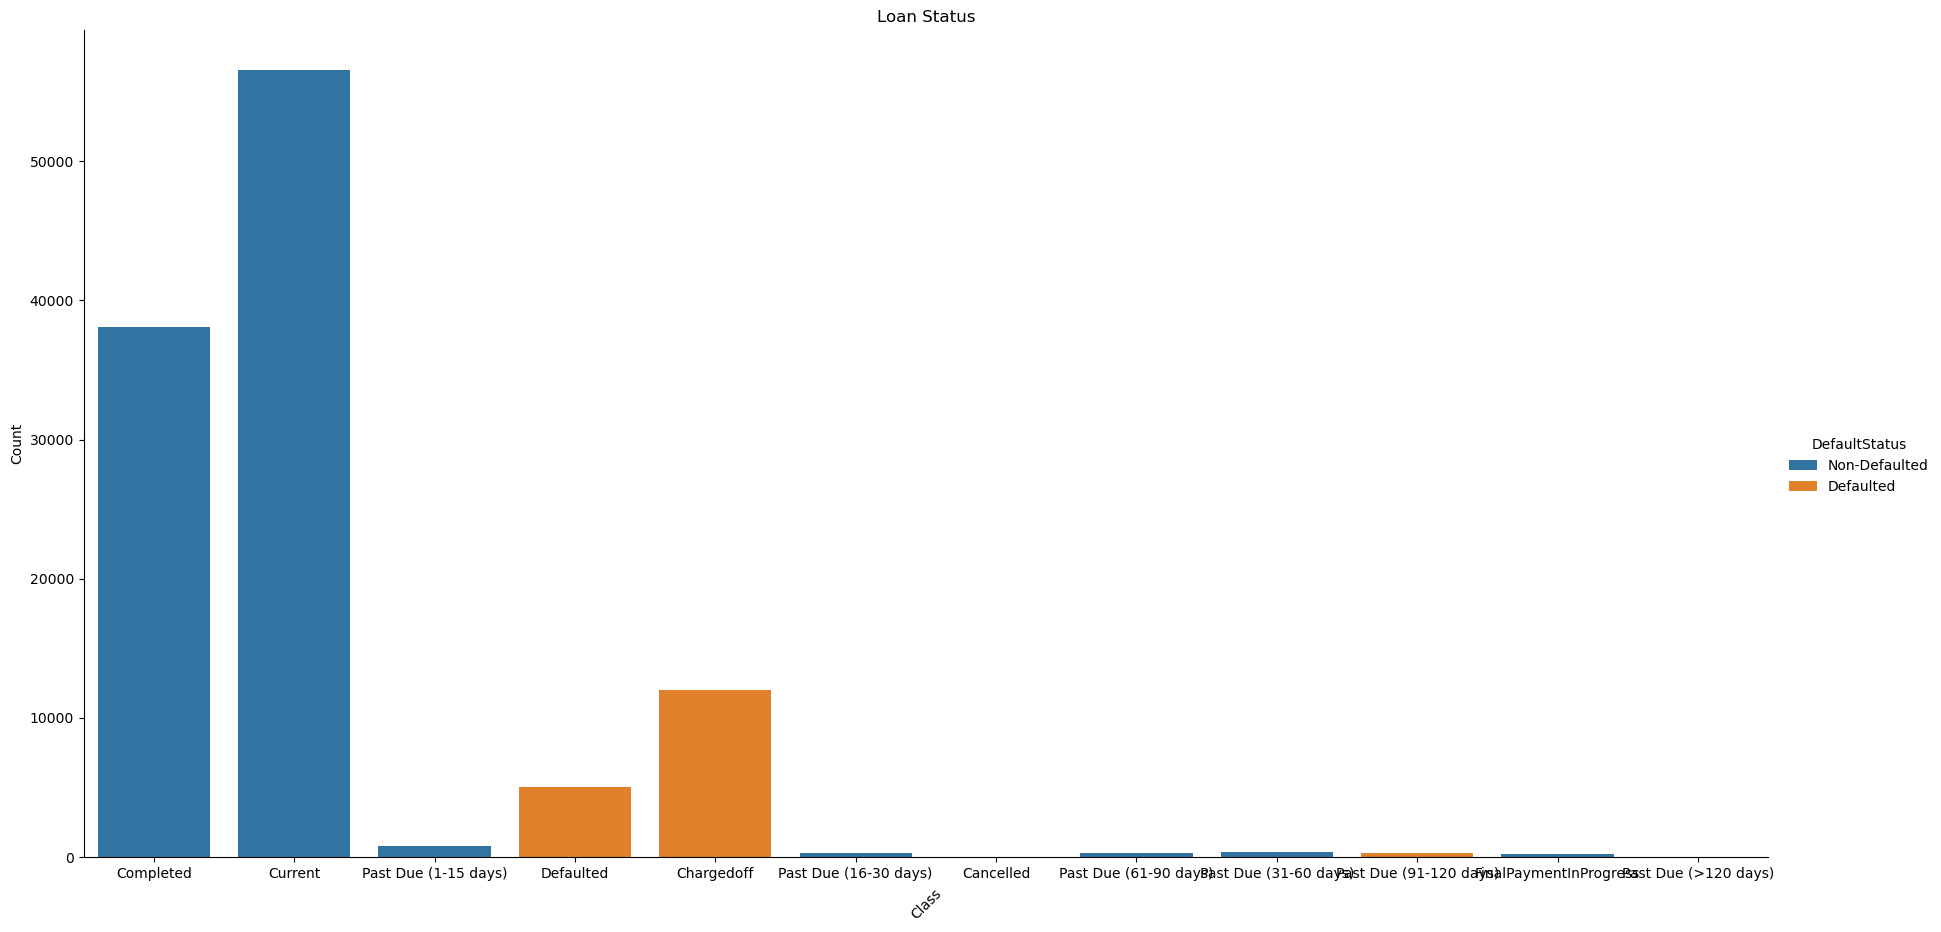

In [47]:
# Here we have the target variable on Y
# Plotting the Graph for LoanStatus and DefaultStatus columns
sns.catplot(x="LoanStatus", hue="DefaultStatus", kind="count", data=df, dodge=False, height=9, aspect=2)

# Set the x-axis and y-axis labels and rotate the x-axis label
plt.xlabel("Class", rotation=45)
plt.ylabel("Count")
plt.title("Loan Status")

# Display the plot
plt.show()

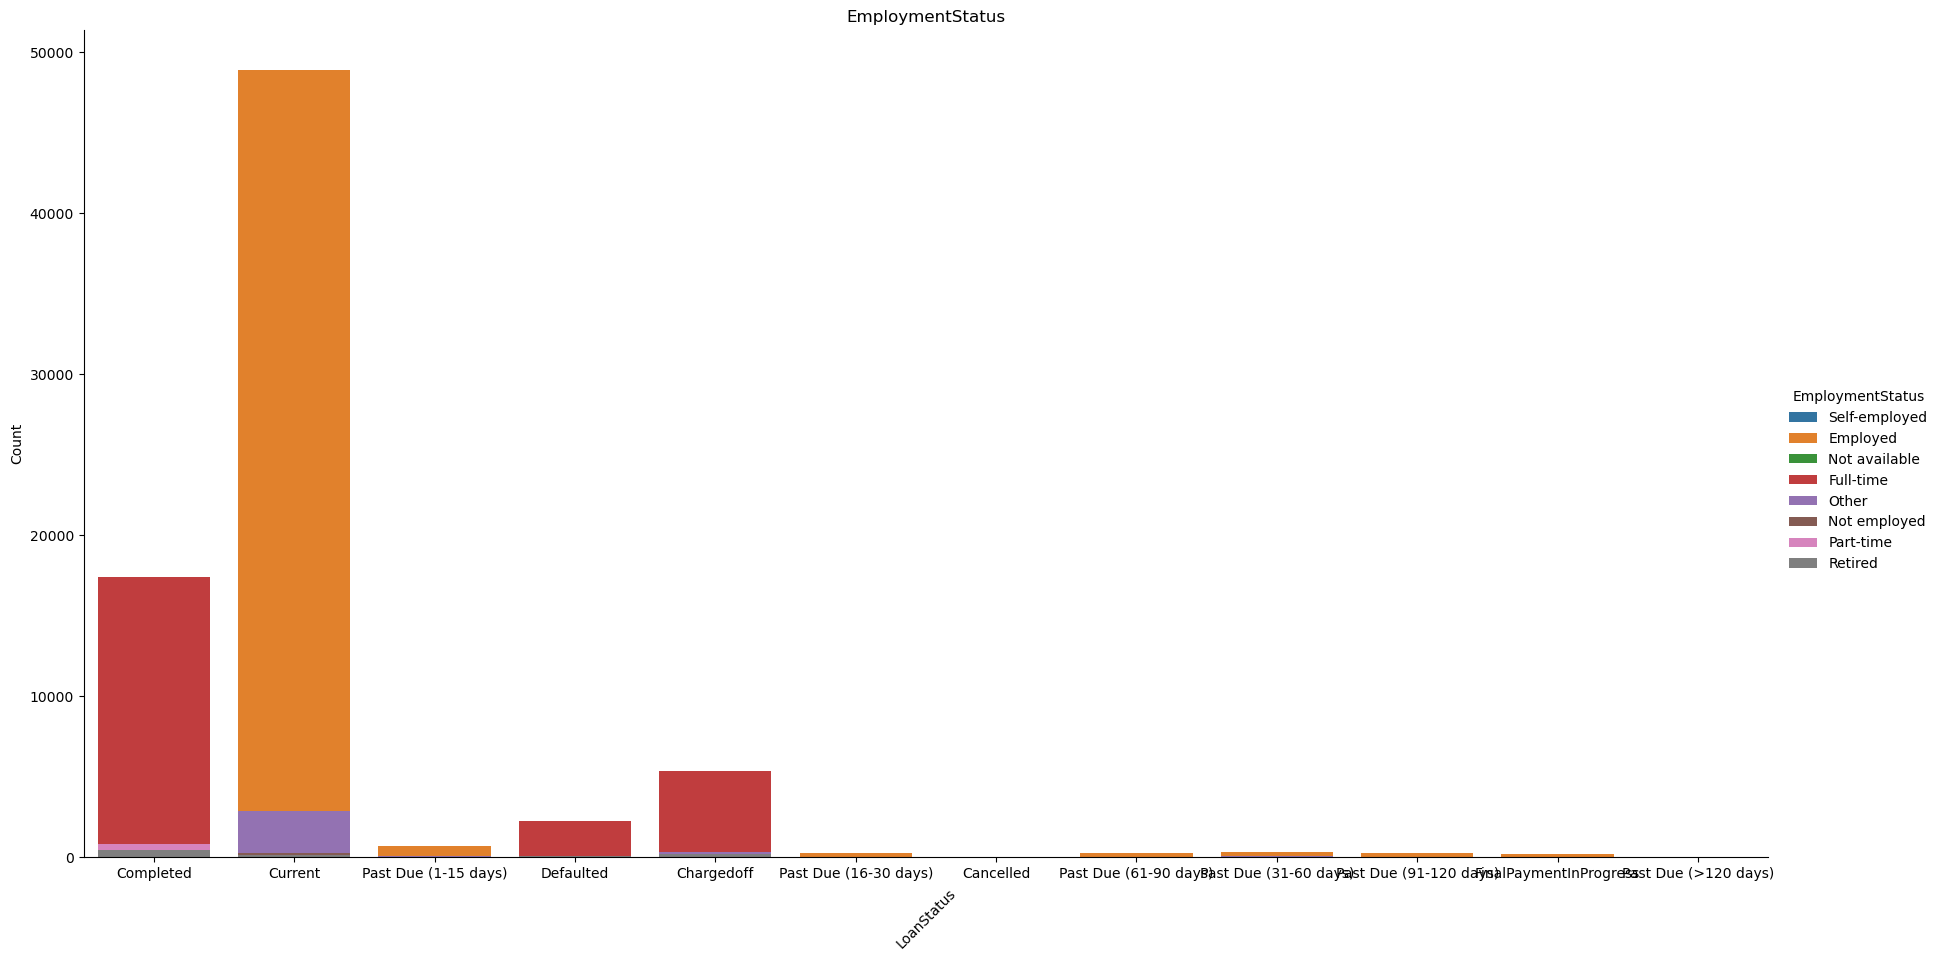

In [48]:
# Plotting the Graph for LoanStatus and EmploymentStatus columns
sns.catplot(x="LoanStatus", hue="EmploymentStatus", kind="count", data=df, dodge=False, height=9, aspect=2)

# Set the x-axis and y-axis labels and rotate the x-axis label
plt.xlabel("LoanStatus", rotation=45)
plt.ylabel("Count")
plt.title("EmploymentStatus")

# Display the plot
plt.show()

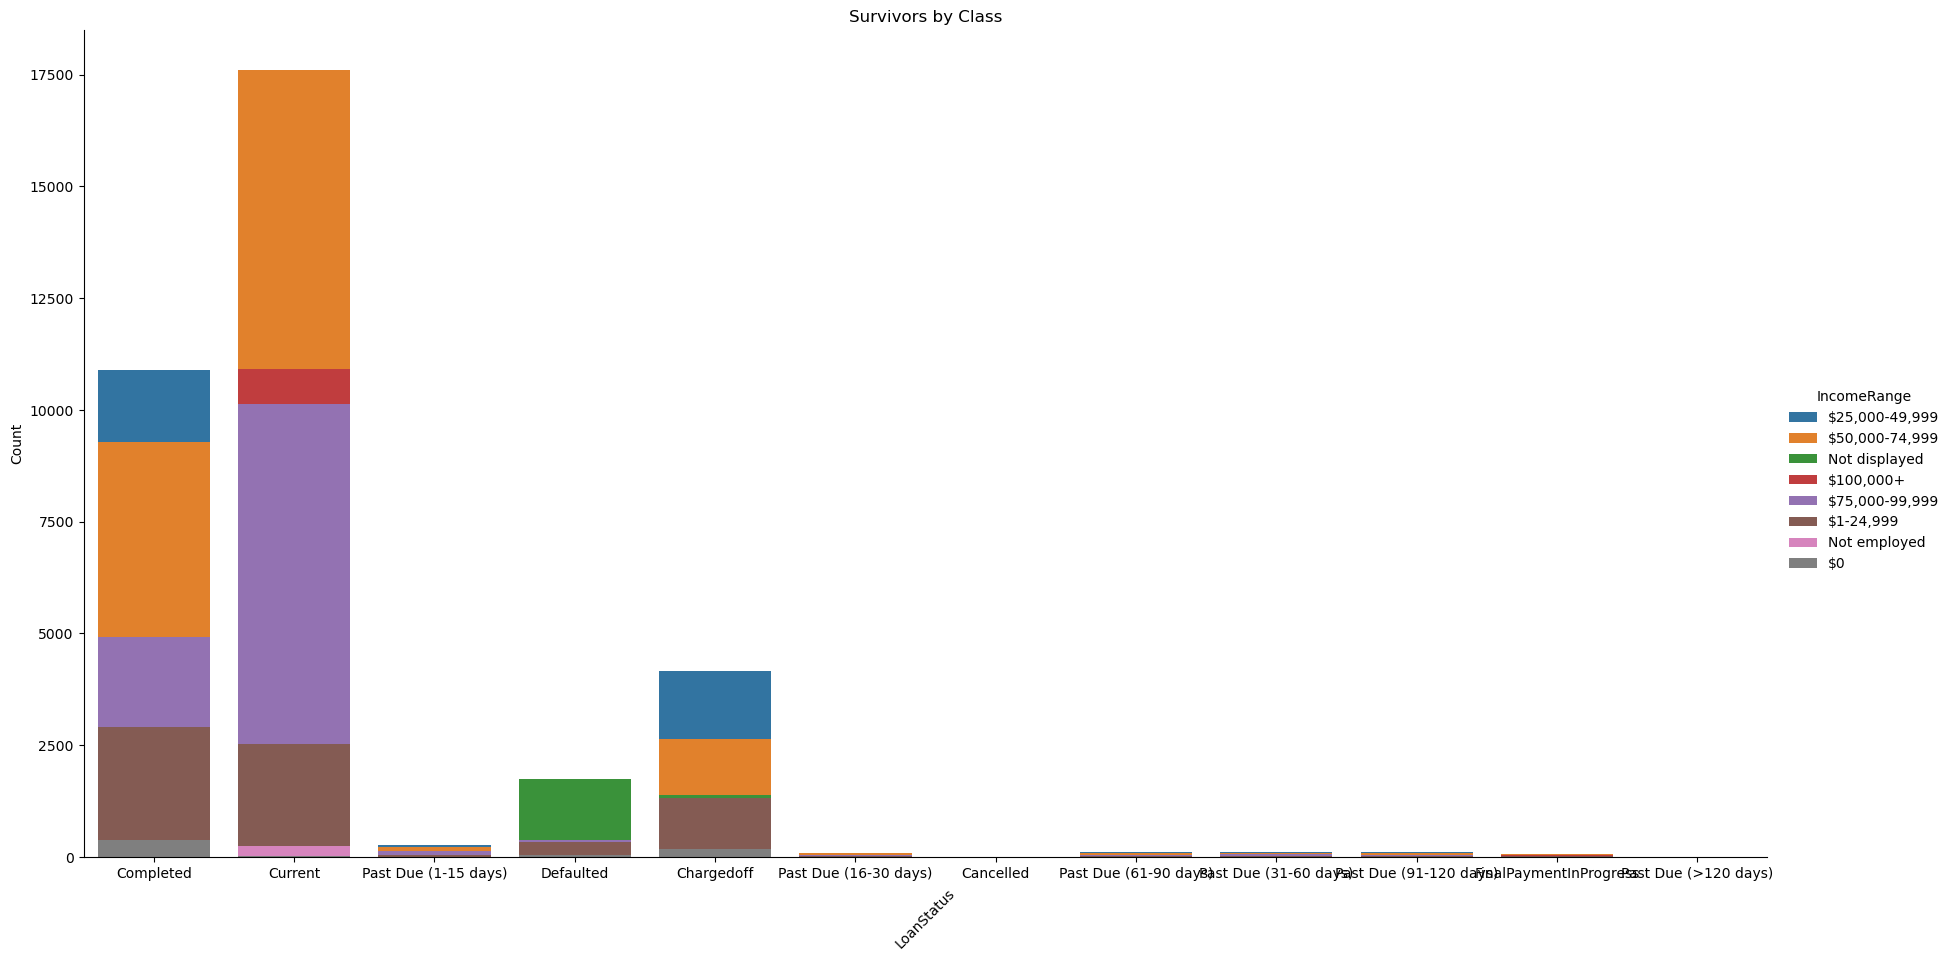

In [49]:
# Plotting the Graph for LoanStatus and IncomeRange columns
sns.catplot(x="LoanStatus", hue="IncomeRange", kind="count", data=df, dodge=False, height=9, aspect=2)

# Set the x-axis and y-axis labels and rotate the x-axis label
plt.xlabel("LoanStatus", rotation=45)
plt.ylabel("Count")
plt.title("Survivors by Class")

# Display the plot
plt.show()